In [1]:
################################################################################################################################
#
# ECONOMETRIC - ROLLING - LN - DAILY
#
################################################################################################################################

#-------------------------------------------------------------------------------------------------------------------------------
#    Price          MSE   RMSE
#------------------------------
# 0  Last     1,476,001  1,215
# 1  Mean 3,357,125,693 57,941
# 2  MA       1,482,532  1,218
# 3  AR       1,483,149  1,218
# 4  ARMA     1,481,847  1,217
# 5  ARIMA            0      0
# 6  ARIMAR   1,482,795  1,218
# 7  SARIMAR  1,482,795  1,218
#-------------------------------------------------------------------------------------------------------------------------------

#===============================================================================================================================
# ENVIRONMENT: LIBRARIES
#===============================================================================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pmdarima as pmd

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
################################################################################################################################
# DATA
################################################################################################################################

#===============================================================================================================================
# DATA INPUT: PRICES
#===============================================================================================================================
seriesId='IBOV'
df = pd.read_csv(seriesId+'.csv')
df.drop(['Open','Low','High', 'Qt'], axis='columns', inplace=True )
PERIOD=249
df

,Date,Close
0,03/01/2000,16930.42
1,04/01/2000,15851.00
2,05/01/2000,16245.14
3,06/01/2000,16106.89
4,07/01/2000,16309.15
...,...,...
5938,21/12/2023,132182.01
5939,22/12/2023,132752.93
5940,26/12/2023,133532.92
5941,27/12/2023,134193.72


In [3]:
#===============================================================================================================================
# DATA INPUT: PRICES - DATETIME
#===============================================================================================================================
df['Date'] =pd.to_datetime(df['Date'], dayfirst=True)
df

,Date,Close
0,2000-01-03,16930.42
1,2000-01-04,15851.00
2,2000-01-05,16245.14
3,2000-01-06,16106.89
4,2000-01-07,16309.15
...,...,...
5938,2023-12-21,132182.01
5939,2023-12-22,132752.93
5940,2023-12-26,133532.92
5941,2023-12-27,134193.72


In [4]:
#===============================================================================================================================
# DATA INPUT: PRICES - SET INDEX
#===============================================================================================================================
df2 = df.set_index('Date')
df2

,Close
Date,
2000-01-03,16930.42
2000-01-04,15851.00
2000-01-05,16245.14
2000-01-06,16106.89
2000-01-07,16309.15
...,...
2023-12-21,132182.01
2023-12-22,132752.93
2023-12-26,133532.92


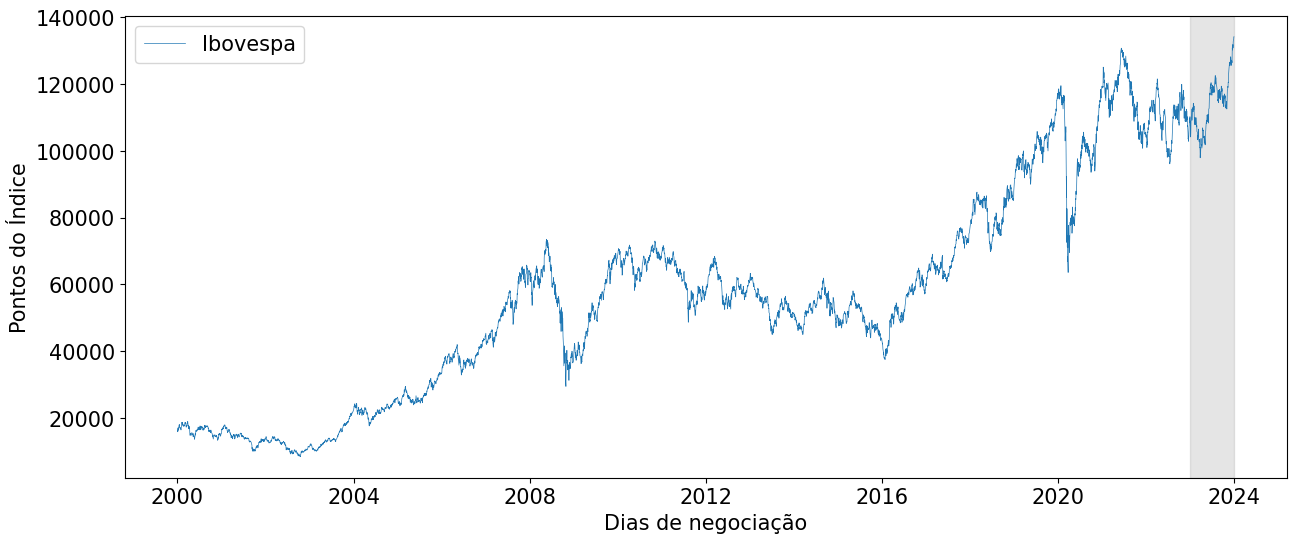

In [5]:
#===============================================================================================================================
# DATA INPUT: PRICES - PLOT
#===============================================================================================================================
plt.figure(figsize=(15,6))
plt.plot(df['Date'], df['Close'], label = 'Ibovespa', linewidth=0.5)
#plt.title('IBOVESPA Diário', fontsize=16)
plt.xlabel('Dias de negociação', fontsize=15)
plt.ylabel('Pontos do Índice', fontsize=15)
plt.tick_params(axis='both', labelsize=15)
plt.axvspan('2023', '2024', color='#808080', alpha=0.2)
plt.legend(loc=2, prop={'size': 15}, bbox_to_anchor=(0,1))
plt.show()


In [6]:
#===============================================================================================================================
# DATA PREP: LOG
#===============================================================================================================================
dfln = df.copy()
dfln['CloseLn']= np.log(dfln['Close'])
dfln

,Date,Close,CloseLn
0,2000-01-03,16930.42,9.736867
1,2000-01-04,15851.00,9.670988
2,2000-01-05,16245.14,9.695549
3,2000-01-06,16106.89,9.687002
4,2000-01-07,16309.15,9.699482
...,...,...,...
5938,2023-12-21,132182.01,11.791935
5939,2023-12-22,132752.93,11.796245
5940,2023-12-26,133532.92,11.802103
5941,2023-12-27,134193.72,11.807040


In [7]:
#===============================================================================================================================
# DATA PREP: LOG - SET INDEX
#===============================================================================================================================
dfln2 = dfln.set_index('Date')
dfln2

,Close,CloseLn
Date,,
2000-01-03,16930.42,9.736867
2000-01-04,15851.00,9.670988
2000-01-05,16245.14,9.695549
2000-01-06,16106.89,9.687002
2000-01-07,16309.15,9.699482
...,...,...
2023-12-21,132182.01,11.791935
2023-12-22,132752.93,11.796245
2023-12-26,133532.92,11.802103


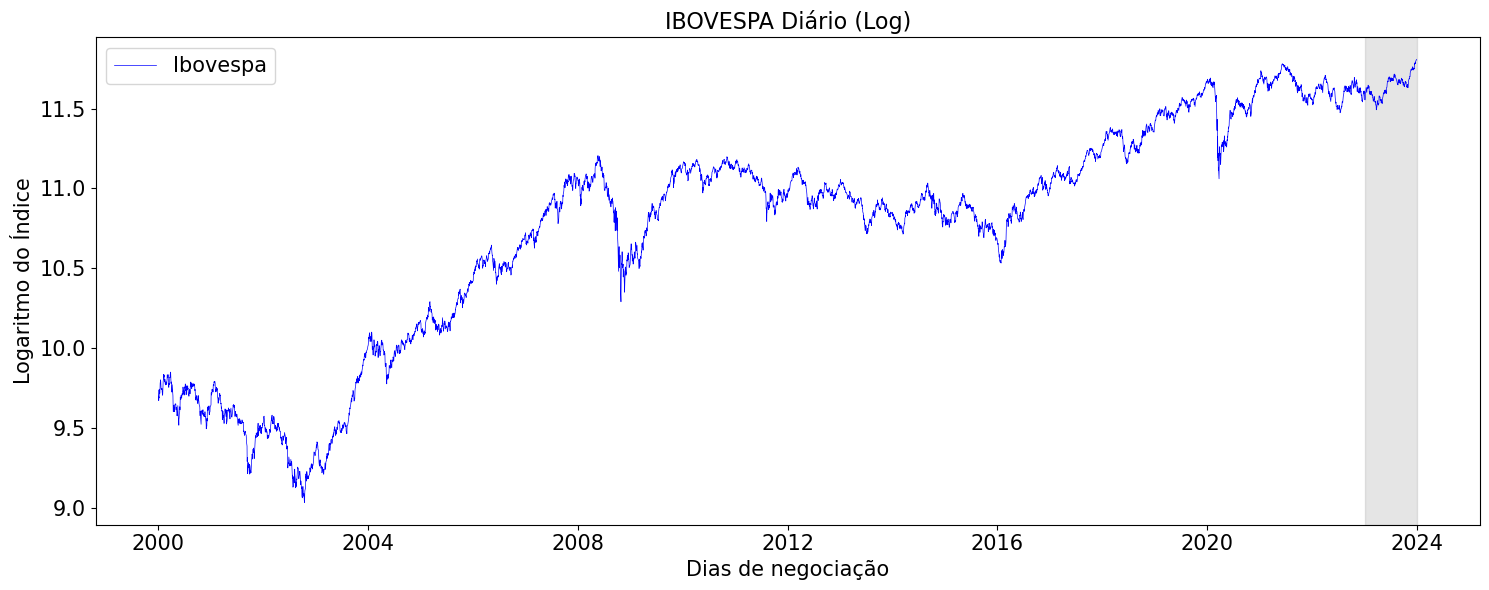

In [8]:
#===============================================================================================================================
# DATA PREP: LOG - PLOT
#===============================================================================================================================
plt.figure(figsize=(15,6))
plt.plot(dfln['Date'], dfln['CloseLn'], 'b-', label = "Ibovespa", linewidth=0.5)
plt.title('IBOVESPA Diário (Log)', fontsize=16)
plt.xlabel('Dias de negociação', fontsize=15)
plt.ylabel('Logaritmo do Índice', fontsize=15)
plt.tick_params(axis='both', labelsize=15)
plt.axvspan('2023', '2024', color='#808080', alpha=0.2)
plt.legend(loc=2, prop={'size': 15}, bbox_to_anchor=(0,1))
plt.tight_layout()
plt.show()



In [9]:
#===============================================================================================================================
# DATA PREP: LOG-DIFF
#===============================================================================================================================
dfln['CloseLnDiff'] = 0
dfln.loc[1:, ['CloseLnDiff']] = dfln.loc[:, 'CloseLn'].diff()
dfln

,Date,Close,CloseLn,CloseLnDiff
0,2000-01-03,16930.42,9.736867,0.000000
1,2000-01-04,15851.00,9.670988,-0.065879
2,2000-01-05,16245.14,9.695549,0.024561
3,2000-01-06,16106.89,9.687002,-0.008547
4,2000-01-07,16309.15,9.699482,0.012479
...,...,...,...,...
5938,2023-12-21,132182.01,11.791935,0.010479
5939,2023-12-22,132752.93,11.796245,0.004310
5940,2023-12-26,133532.92,11.802103,0.005858
5941,2023-12-27,134193.72,11.807040,0.004936


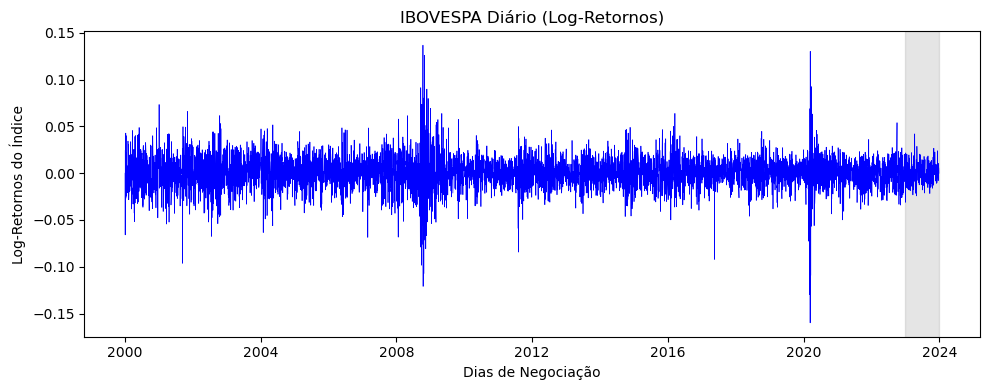

In [10]:
#===============================================================================================================================
# DATA PREP: LOG-DIFF - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
plt.title('IBOVESPA Diário (Log-Retornos)', fontsize=12)
ax.plot(dfln['Date'], dfln['CloseLnDiff'], 'b-', label = "Log-Retornos do Índice", linewidth=0.5)
ax.set_xlabel('Dias de Negociação')
ax.set_ylabel('Log-Retornos do Índice')
ax.axvspan('2023', '2024', color='#808080', alpha=0.2)
plt.tight_layout()

In [11]:
#===============================================================================================================================
# DATA PREP: SPLIT
#===============================================================================================================================
totallen = len(df)
trainlen = len(df2[:'2022'])
testlen  = len(df2['2023':])

trainfin = trainlen-1
testini  = trainlen

train = df[:testini]
test  = df[testini:]

print("Train Len", trainlen, "Length Total =", totallen, "| Train Fin =", trainfin, "| Test Ini =", testini)
#-------------------------------------------------------------------------------------------------------------------------------
# Length Total = 5943 | Train Fin = 5694 | Test Ini = 5695
#-------------------------------------------------------------------------------------------------------------------------------
train

Train Len 5695 Length Total = 5943 | Train Fin = 5694 | Test Ini = 5695


,Date,Close
0,2000-01-03,16930.42
1,2000-01-04,15851.00
2,2000-01-05,16245.14
3,2000-01-06,16106.89
4,2000-01-07,16309.15
...,...,...
5690,2022-12-23,109697.57
5691,2022-12-26,108737.75
5692,2022-12-27,108578.20
5693,2022-12-28,110236.71


In [12]:
################################################################################################################################
# ROLLING FORECAST
################################################################################################################################
from statsmodels.tsa.statespace.sarimax import SARIMAX

#===============================================================================================================================
# ROLLING FORECAST: PARAMETERS
#===============================================================================================================================
HORIZON = len(test)
WINDOW = 1

#===============================================================================================================================
# ROLLING FORECAST: FUNCTION
#===============================================================================================================================
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str, orderparam=(0,0,0)) -> list:   
    
    total_len = train_len + horizon
    end_idx = train_len
    
    if method == 'mean':
        pred_mean = []
        
        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))
        return pred_mean
    elif method == 'last':
        pred_last = []
        
        for i in range(train_len, total_len, window):
            last = df.loc[i]
            pred_last.extend(last for _ in range(window))
        return pred_last
    elif method == 'MA':
        pred_MA = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=orderparam)
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_MA.extend(oos_pred)
        
        model_fit = model.fit(disp=False)
        print(model_fit.summary())
        print("θ1 = {}, θ2 = {}".format(model_fit.params[0],model_fit.params[1]))
        return pred_MA
    elif method == 'AR':
        pred_AR = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=orderparam)
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_AR.extend(oos_pred)
            
        model_fit = model.fit(disp=False)
        print(model_fit.summary())
        print("phi1 = {}, phi2 = {}".format(model_fit.params[0],model_fit.params[1]))
        return pred_AR
    elif method == 'ARMA':
        pred_ARMA = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=orderparam)  
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_ARMA.extend(oos_pred)
            
        model_fit = model.fit(disp=False)
        print(model_fit.summary())
        print("θ = {}, σ2 = {}".format(model_fit.params[0],model_fit.params[1]))
        return pred_ARMA
    elif method == 'ARIMA':
        pred_ARIMA = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=orderparam)  
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_ARIMA.extend(oos_pred)
            
        model_fit = model.fit(disp=False)
        print(model_fit.summary())
        print("θ = {}, σ2 = {}".format(model_fit.params[0],model_fit.params[1]))
        return pred_ARIMA

In [13]:
################################################################################################################################
# BASELINES
################################################################################################################################

#===============================================================================================================================
# BASELINES: LOG - FORECAST - last, mean
#===============================================================================================================================
pred_LastLn = rolling_forecast(dfln['CloseLn'], trainfin, HORIZON, WINDOW, 'last')
pred_MeanLn = rolling_forecast(dfln['CloseLn'], trainfin+1, HORIZON, WINDOW, 'mean')

#===============================================================================================================================
# BASELINES: LOG - COPY testln - last, mean 
#===============================================================================================================================
testln = dfln.loc[trainfin:,['Date','CloseLn']]
testln.loc[testini:,'pred_LastLn'] = pred_LastLn
testln.loc[testini:,'pred_MeanLn'] = pred_MeanLn

testln

,Date,CloseLn,pred_LastLn,pred_MeanLn
5694,2022-12-29,11.605820,NaN,NaN
5695,2023-01-02,11.574735,11.605820,10.729549
5696,2023-01-03,11.553739,11.574735,10.729697
5697,2023-01-04,11.564896,11.553739,10.729842
5698,2023-01-05,11.586560,11.564896,10.729988
...,...,...,...,...
5938,2023-12-21,11.791935,11.781457,10.766810
5939,2023-12-22,11.796245,11.791935,10.766983
5940,2023-12-26,11.802103,11.796245,10.767156
5941,2023-12-27,11.807040,11.802103,10.767330


In [14]:
#===============================================================================================================================
# BASELINES: LOG - COPY dfln - last, mean 
#===============================================================================================================================
dfln['pred_LastLn'] = 0.0
dfln['pred_MeanLn'] = 0.0

dfln.loc[testini:,'pred_LastLn']=testln.loc[testini:,'pred_LastLn']
dfln.loc[testini:,'pred_MeanLn']=testln.loc[testini:,'pred_MeanLn']

dfln[testini-1:]


,Date,Close,CloseLn,CloseLnDiff,pred_LastLn,pred_MeanLn
5694,2022-12-29,109734.60,11.605820,-0.004565,0.000000,0.000000
5695,2023-01-02,106376.02,11.574735,-0.031085,11.605820,10.729549
5696,2023-01-03,104165.74,11.553739,-0.020997,11.574735,10.729697
5697,2023-01-04,105334.46,11.564896,0.011157,11.553739,10.729842
5698,2023-01-05,107641.32,11.586560,0.021664,11.564896,10.729988
...,...,...,...,...,...,...
5938,2023-12-21,132182.01,11.791935,0.010479,11.781457,10.766810
5939,2023-12-22,132752.93,11.796245,0.004310,11.791935,10.766983
5940,2023-12-26,133532.92,11.802103,0.005858,11.796245,10.767156
5941,2023-12-27,134193.72,11.807040,0.004936,11.802103,10.767330


In [15]:
#===============================================================================================================================
# BASELINES: LOG - PERFORMANCE - last, mean
#===============================================================================================================================
mse_Last   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'])
mse_Mean   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,4))  , "{:,}".format(round(sqrt(mse_Last),4))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,4))  , "{:,}".format(round(sqrt(mse_Mean),4))] ]

df_metrics   = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#   Log      MSE    RMSE
#------------------------
# 0 Last  0.0001  0.0108
# 1 Mean  0.8053  0.8974
#-------------------------------------------------------------------------------------------------------------------------------

,Log,MSE,RMSE
0,Last,0.0001,0.0108
1,Mean,0.805,0.8972


Text(0, 0.5, 'Log')

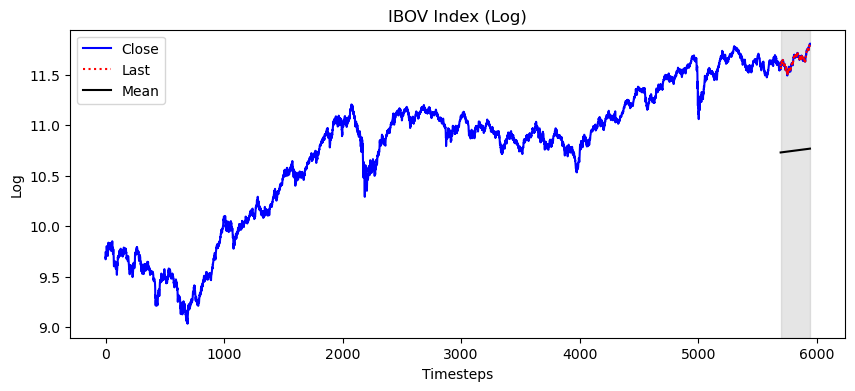

In [16]:
#===============================================================================================================================
# BASELINES: LOG - PLOT - close, last, mean
#===============================================================================================================================
fig, (ax3) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 4))

plt.title(seriesId+' Index (Log)', fontsize=12)
ax3.plot(dfln['CloseLn'], 'b-', label='Close')
ax3.plot(dfln.loc[testini:,'pred_LastLn'], 'r:', label='Last')
ax3.plot(dfln.loc[testini:,'pred_MeanLn'], 'k-', label='Mean')
ax3.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax3.legend(loc=2)
ax3.set_xlabel('Timesteps')
ax3.set_ylabel('Log')

Text(0, 0.5, 'Log')

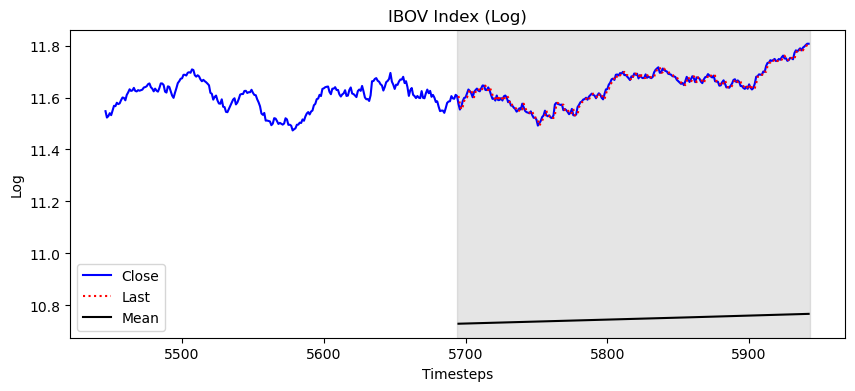

In [17]:
#===============================================================================================================================
# BASELINES: LOG - Plot (zoom) - close, last, mean
#===============================================================================================================================
fig, (ax3) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 4))

plt.title(seriesId+' Index (Log)', fontsize=12)
ax3.plot(dfln.loc[trainfin-testlen:,'CloseLn'    ], 'b-', label='Close')
ax3.plot(dfln.loc[testini:  ,'pred_LastLn'], 'r:', label='Last')
ax3.plot(dfln.loc[testini:  ,'pred_MeanLn'], 'k-', label='Mean')
ax3.axvspan(trainfin, totallen, color='#808080', alpha=0.2)
ax3.legend(loc=3)
ax3.set_xlabel('Timesteps')
ax3.set_ylabel('Log')


In [18]:
#===============================================================================================================================
# BASELINES: PRICES - RECOVER
#===============================================================================================================================
df['pred_Last'] = 0.0
df['pred_Mean'] = 0.0


pred_Last = rolling_forecast(dfln['Close'], trainfin, HORIZON, WINDOW, 'last')
pred_Mean = rolling_forecast(dfln['Close'], trainfin+1, HORIZON, WINDOW, 'mean')

df.loc[testini:,'pred_Last']= pred_Last
df.loc[testini:,'pred_Mean']= np.round(pred_Mean,2)


df[testini-1:]

,Date,Close,pred_Last,pred_Mean
5694,2022-12-29,109734.60,0.00,0.00
5695,2023-01-02,106376.02,109734.60,55564.15
5696,2023-01-03,104165.74,106376.02,55573.07
5697,2023-01-04,105334.46,104165.74,55581.60
5698,2023-01-05,107641.32,105334.46,55590.33
...,...,...,...,...
5938,2023-12-21,132182.01,130804.17,57947.47
5939,2023-12-22,132752.93,132182.01,57959.97
5940,2023-12-26,133532.92,132752.93,57972.56
5941,2023-12-27,134193.72,133532.92,57985.28


In [19]:
#===============================================================================================================================
# BASELINES: PRICES - RECOVER - PERFORMANCE
#===============================================================================================================================
mse_Last = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last'])
mse_Mean = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,))  , "{:,}".format(round(sqrt(mse_Last),))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,))  , "{:,}".format(round(sqrt(mse_Mean),))] ]

df_metrics   = pd.DataFrame(data_metrics, columns=['Price', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#   Price        MSE   RMSE
#---------------------------
# 0 Last   1,476,001  1,215
# 1 Mean  69,031,288  8,309
#-------------------------------------------------------------------------------------------------------------------------------

,Price,MSE,RMSE
0,Last,"1,476,001","1,215"
1,Mean,"3,357,125,693","57,941"


Text(0, 0.5, 'Prices')

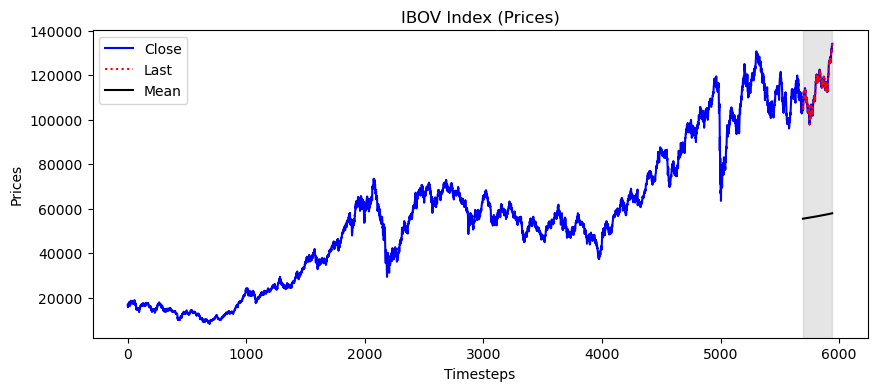

In [20]:
#===============================================================================================================================
# BASELINES: PRICES - RECOVER - PLOT
#===============================================================================================================================
fig, (ax3) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 4))

plt.title(seriesId+' Index (Prices)', fontsize=12)
ax3.plot(df['Close'], 'b-', label='Close')
ax3.plot(df.loc[testini+1:,'pred_Last'], 'r:', label='Last')
ax3.plot(df.loc[testini+1:,'pred_Mean'], 'k-', label='Mean')
ax3.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax3.legend(loc=2)
ax3.set_xlabel('Timesteps')
ax3.set_ylabel('Prices')

Text(0, 0.5, 'Prices')

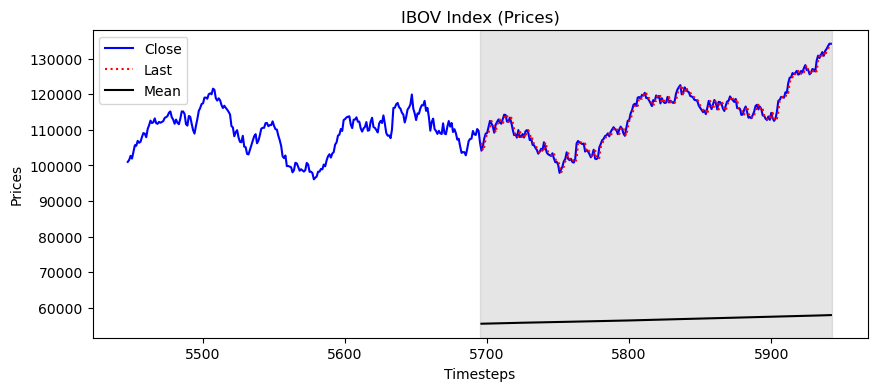

In [21]:
#===============================================================================================================================
# BASELINES: PRICES - RECOVER - PLOT (zoom)
#===============================================================================================================================
fig, (ax3) = plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(10, 4))

plt.title(seriesId+' Index (Prices)', fontsize=12)
ax3.plot(df.loc[testini-testlen:,'Close'    ], 'b-', label='Close')
ax3.plot(df.loc[testini+1:  ,'pred_Last'], 'r:', label='Last')
ax3.plot(df.loc[testini+1:  ,'pred_Mean'], 'k-', label='Mean')
ax3.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax3.legend(loc=2)
ax3.set_xlabel('Timesteps')
ax3.set_ylabel('Prices')

In [22]:
################################################################################################################################
# STATIONARITY
################################################################################################################################

#===============================================================================================================================
# STATIONARITY: LOG - ADF test
#===============================================================================================================================
ADF_Close = adfuller(dfln['CloseLn'])
print(f'ADF Statistic: {np.round(ADF_Close[0],3)}')
print(f'ADF p-value  : {np.round(ADF_Close[1],2)}')

#-------------------------------------------------------------------------------------------------------------------------------
# ADF Statistic: -0.999
# ADF p-value  : 0.75
#-------------------------------------------------------------------------------------------------------------------------------
# ***** NON-STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------

ADF Statistic: -0.999
ADF p-value  : 0.75


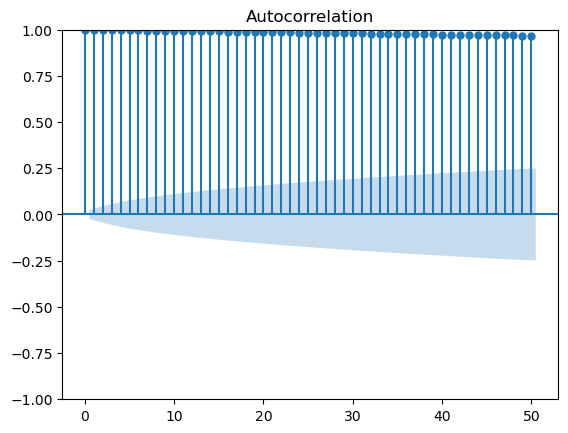

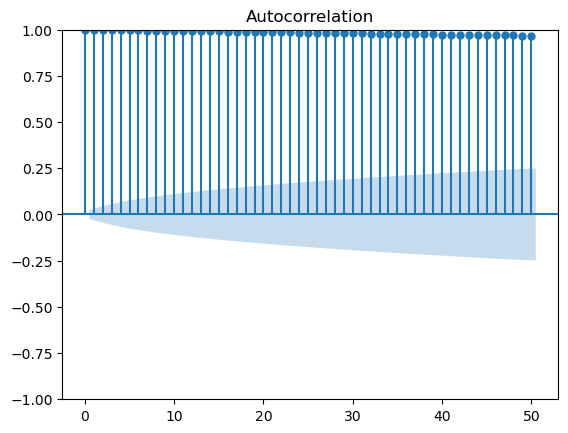

In [23]:
#===============================================================================================================================
# STATIONARITY: LOG - ACF plot
#===============================================================================================================================
plot_acf(dfln['CloseLn'], lags=50)

#-------------------------------------------------------------------------------------------------------------------------------
# Significant AC coefficients slowly decreasing after lag 0 
#-------------------------------------------------------------------------------------------------------------------------------
# ***** AUTOCORRELATION present ******
#-------------------------------------------------------------------------------------------------------------------------------

#===============================================================================================================================
# DATA STATIONARITY: LOG - ADF test + ACF plot
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ***** NO RANDOM-WALK *****
#-------------------------------------------------------------------------------------------------------------------------------

In [24]:
#===============================================================================================================================
# STATIONARITY: LOG-DIFF - ADF test
#===============================================================================================================================
ADF_Close = adfuller(dfln['CloseLnDiff'])
print(f'ADF Statistic: {np.round(ADF_Close[0],3)}')
print(f'ADF p-value  : {np.round(ADF_Close[1],2)}')
#-------------------------------------------------------------------------------------------------------------------------------
# ADF Statistic: -16.892
# ADF p-value  : 0.0
# Null hypothesis rejected - No Unit Root
#-------------------------------------------------------------------------------------------------------------------------------
# ***** STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------

ADF Statistic: -16.892
ADF p-value  : 0.0


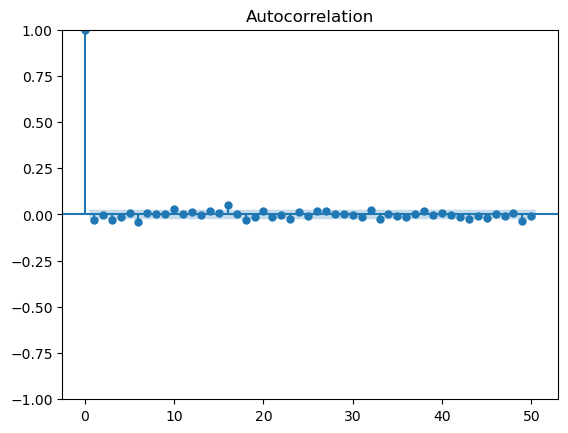

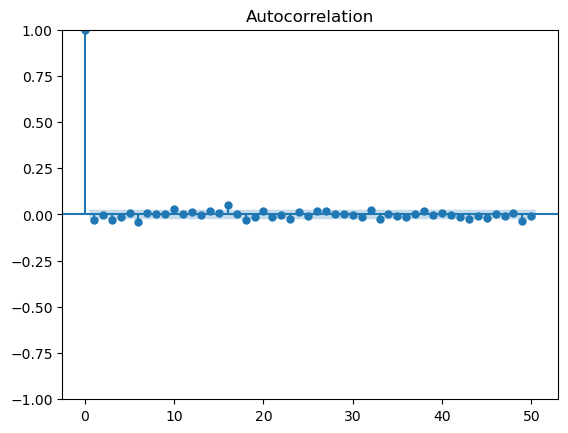

In [25]:
#===============================================================================================================================
# STATIONARITY: LOG-DIFF - ACF plot
#===============================================================================================================================
plot_acf(dfln['CloseLnDiff'], lags=50)
#-------------------------------------------------------------------------------------------------------------------------------
# No Significant AC coefficients after lag 0 
#-------------------------------------------------------------------------------------------------------------------------------
# ***** NO AUTOCORRELATION *****
#-------------------------------------------------------------------------------------------------------------------------------

#===============================================================================================================================
# DATA STATIONARITY: LOG-DIFF - ADF test + ACF plot
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ***** RANDOM WALK *****
#-------------------------------------------------------------------------------------------------------------------------------

In [26]:
###############################################################################################################################
#
# MA - MOVING AVERAGE 
#
###############################################################################################################################

In [27]:
#===============================================================================================================================
# MA
#
# LOG: NON-STATIONARY (ADF Test & ACF Autocorrelation present)
# LOG-DIFF: STATIONARY (ADF Test & ACF Almost no Autocorrelation) => RANDOM WALK
#           ACF Coefficients don't become abruptly non-significant => No MOVING AVERAGE
#           ACF No Significant Coefficients after lag 0: 1,3,*6,10,*16,18
#===============================================================================================================================

#-------------------------------------------------------------------------------------------------------------------------------
# ***** LOG-DIFF: STATIONARY + NO AUTOCORRELATION => RANDOM WALK => NO MOVING AVERAGE *****
#-------------------------------------------------------------------------------------------------------------------------------

In [28]:
#===============================================================================================================================
# MA: LOG-DIFF - STATIONARITY - FORECAST
#===============================================================================================================================
pred_MALnDiff = rolling_forecast(dfln['CloseLnDiff'], testini, HORIZON, WINDOW, 'MA',(0,0,1))
pred_MALnDiff

#-------------------------------------------------------------------------------------------------------------------------------
#                                SARIMAX Results (0,0,1)                               
# ==============================================================================
# Dep. Variable:            CloseLnDiff   No. Observations:                 5942
# Model:               SARIMAX(0, 0, 1)   Log Likelihood               15586.556
# Date:                Tue, 11 Jun 2024   AIC                         -31169.112
# Time:                        10:18:20   BIC                         -31155.732
# Sample:                             0   HQIC                        -31164.463
#                                - 5942                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ma.L1         -0.0270      0.007     -3.970      0.000      -0.040      -0.014
# sigma2         0.0003   2.78e-06    110.711      0.000       0.000       0.000
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             10756.65
# Prob(Q):                              0.93   Prob(JB):                         0.00
# Heteroskedasticity (H):               0.76   Skew:                            -0.38
# Prob(H) (two-sided):                  0.00   Kurtosis:                         9.55
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).
# θ1 = -0.02698387113955159, θ2 = 0.0003082640393854528
# 
#-------------------------------------------------------------------------------------------------------------------------------
#                                SARIMAX Results (0,0,6)
# ==============================================================================
# Dep. Variable:            CloseLnDiff   No. Observations:                 5942
# Model:               SARIMAX(0, 0, 6)   Log Likelihood               15593.494
# Date:                Mon, 25 Mar 2024   AIC                         -31172.988
# Time:                        20:05:12   BIC                         -31126.160
# Sample:                             0   HQIC                        -31156.718
#                                - 5942                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ma.L1         -0.0279      0.007     -3.798      0.000      -0.042      -0.013
# ma.L2         -0.0038      0.006     -0.627      0.530      -0.016       0.008
# ma.L3         -0.0293      0.007     -4.055      0.000      -0.043      -0.015
# ma.L4         -0.0108      0.008     -1.392      0.164      -0.026       0.004
# ma.L5          0.0042      0.008      0.542      0.588      -0.011       0.019
# ma.L6         -0.0395      0.008     -4.981      0.000      -0.055      -0.024
# sigma2         0.0003    2.9e-06    105.954      0.000       0.000       0.000
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11077.90
# Prob(Q):                              0.99   Prob(JB):                         0.00
# Heteroskedasticity (H):               0.76   Skew:                            -0.44
# Prob(H) (two-sided):                  0.00   Kurtosis:                         9.63
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).
# θ1 = -0.02785235293404912, θ2 = -0.0038000874294308244
#-------------------------------------------------------------------------------------------------------------------------------

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

                               SARIMAX Results                                
Dep. Variable:            CloseLnDiff   No. Observations:                 5942
Model:               SARIMAX(0, 0, 1)   Log Likelihood               15586.556
Date:                Fri, 14 Jun 2024   AIC                         -31169.112
Time:                        10:53:05   BIC                         -31155.732
Sample:                             0   HQIC                        -31164.463
                               - 5942                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0270      0.007     -3.970      0.000      -0.040      -0.014
sigma2         0.0003   2.78e-06    110.711      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.01   Jarque-

[0.00011820412743106911,
 0.0008903580168079956,
 0.0006158635747366408,
 -0.00029809780013057897,
 -0.0006185390785055378,
 -0.0003591925614278171,
 -5.262885809599161e-05,
 -0.0004306294505068626,
 -0.00043584360987020235,
 0.0001535999659723529,
 0.00023796523303233594,
 0.0004366669279030954,
 -0.0005520507716814738,
 -0.00021212440927885525,
 -0.0001774819243483079,
 0.00021348156234577364,
 8.150626027421683e-05,
 -0.00031806740493339525,
 -0.00031281267275486645,
 1.383091659810133e-05,
 0.0004576514232347413,
 2.3411429661205015e-05,
 -0.0002846945284873316,
 0.00032765619885050725,
 0.0004922344768385987,
 0.00042205651839835,
 -3.872842342763982e-05,
 0.0002265655156772026,
 -0.0005339174177260284,
 0.0004826741735093041,
 -4.666934972713158e-06,
 -0.0001952379190269463,
 0.0002492775013054827,
 -0.0004443621401137557,
 -9.945555607793175e-05,
 0.0001926425191785487,
 0.0005283165038877438,
 -0.00010004146523213672,
 0.00046812328251194676,
 3.622169171592839e-05,
 0.00020800

In [29]:
#===============================================================================================================================
# MA: LOG-DIFF - STATIONARITY - COPY  testln
#===============================================================================================================================
testln.loc[testini:,'pred_MALnDiff'] = 0
testln.loc[testini:,'pred_MALnDiff'] = pred_MALnDiff
testln.loc[testini:,'pred_MALnDiff'].to_excel('Data/Output/Rolling-Ln-Daily-MALnDiff.xlsx')

testln

,Date,CloseLn,pred_LastLn,pred_MeanLn,pred_MALnDiff
5694,2022-12-29,11.605820,NaN,NaN,NaN
5695,2023-01-02,11.574735,11.605820,10.729549,0.000118
5696,2023-01-03,11.553739,11.574735,10.729697,0.000890
5697,2023-01-04,11.564896,11.553739,10.729842,0.000616
5698,2023-01-05,11.586560,11.564896,10.729988,-0.000298
...,...,...,...,...,...
5938,2023-12-21,11.791935,11.781457,10.766810,0.000211
5939,2023-12-22,11.796245,11.791935,10.766983,-0.000278
5940,2023-12-26,11.802103,11.796245,10.767156,-0.000124
5941,2023-12-27,11.807040,11.802103,10.767330,-0.000162


In [30]:
#===============================================================================================================================
# MA: LOG-DIFF - PERFORMANCE
#===============================================================================================================================
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLnDiff'], testln.loc[testini:,'pred_MALnDiff'])

data_metrics = [['MA'    , "{:,}".format(round(mse_MA,  6))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Log Diff', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#   Log Diff       MSE      RMSE
#-------------------------------
# 2 MA        0.000118  0.010843
#-------------------------------------------------------------------------------------------------------------------------------

,Log Diff,MSE,RMSE
0,MA,0.000118,0.010858


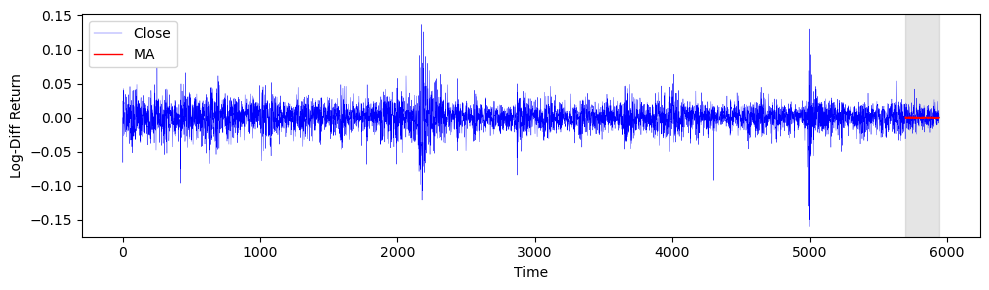

In [31]:
#===============================================================================================================================
# MA: LOG-DIFF - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln.loc[:testini+1,'CloseLnDiff']        ,'b-', linewidth=0.25) 
ax.plot(dfln.loc[testini+1:totallen,'CloseLnDiff'],'b-', linewidth=0.25, label='Close')
ax.plot(testln.loc[:totallen,'pred_MALnDiff']     ,'r-', linewidth=1.0, label='MA')
ax.axvspan(testini,totallen, color='#808080', alpha=0.2)
ax.legend(loc=2)
#plt.xticks([ testini-testlen, testini],           ['2022'          , '2023'])
ax.set_xlabel('Time')
ax.set_ylabel('Log-Diff Return')
plt.tight_layout()


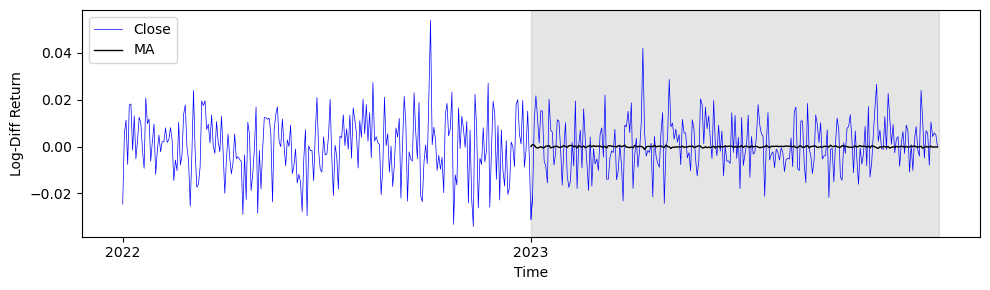

In [32]:
#===============================================================================================================================
# MA: LOG-DIFF - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln.loc[testini-testlen:testini+1,'CloseLnDiff'],'b-', linewidth=0.5) 
ax.plot(dfln.loc[testini:totallen,'CloseLnDiff']         ,'b-', linewidth=0.5, label='Close')
ax.plot(testln.loc[testini:totallen,'pred_MALnDiff']     ,'k-', linewidth=1.0, label='MA')
ax.axvspan(testini,totallen, color='#808080', alpha=0.2)
ax.legend(loc=2)
plt.xticks([ testini-testlen, testini],           ['2022'          , '2023'])
ax.set_xlabel('Time')
ax.set_ylabel('Log-Diff Return')
plt.tight_layout()


In [33]:
#===============================================================================================================================
# MA: LOG - RECOVER
#===============================================================================================================================
dfln['pred_MALn'] = 0.0
dfln.loc[testini:,'pred_MALn'] = dfln.shift(periods=1).loc[testini:, 'CloseLn'] + testln.loc[testini:,'pred_MALnDiff']
dfln[testini-1:]


,Date,Close,CloseLn,CloseLnDiff,pred_LastLn,pred_MeanLn,pred_MALn
5694,2022-12-29,109734.60,11.605820,-0.004565,0.000000,0.000000,0.000000
5695,2023-01-02,106376.02,11.574735,-0.031085,11.605820,10.729549,11.605938
5696,2023-01-03,104165.74,11.553739,-0.020997,11.574735,10.729697,11.575626
5697,2023-01-04,105334.46,11.564896,0.011157,11.553739,10.729842,11.554354
5698,2023-01-05,107641.32,11.586560,0.021664,11.564896,10.729988,11.564598
...,...,...,...,...,...,...,...
5938,2023-12-21,132182.01,11.791935,0.010479,11.781457,10.766810,11.781667
5939,2023-12-22,132752.93,11.796245,0.004310,11.791935,10.766983,11.791657
5940,2023-12-26,133532.92,11.802103,0.005858,11.796245,10.767156,11.796121
5941,2023-12-27,134193.72,11.807040,0.004936,11.802103,10.767330,11.801942


In [34]:
#===============================================================================================================================
# MA: LOG - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'])
mse_Mean   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'])
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'  ])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,6))  , "{:,}".format(round(sqrt(mse_Last),6))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,6))  , "{:,}".format(round(sqrt(mse_Mean),6))] ,
                ['MA'    , "{:,}".format(round(mse_MA,  6))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#
#-------------------------------------------------------------------------------------------------------------------------------
#    Log   MSE       RMSE
#----------------------------
# 0  Last  0.000117  0.010831
# 1  Mean  0.80528   0.897220
# 2  MA    0.0       0.010843
#-------------------------------------------------------------------------------------------------------------------------------

,Log,MSE,RMSE
0,Last,0.000117,0.010831
1,Mean,0.805004,0.89722
2,MA,0.000118,0.010858


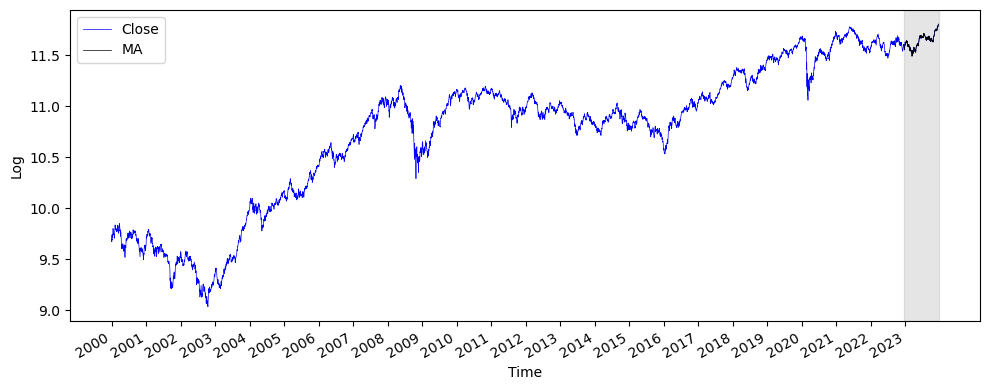

In [35]:
#===============================================================================================================================
# MA: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(dfln['CloseLn'], 'b-', label='Close', lw=0.5)    
#ax.plot(dfln.loc[testini+1:,'pred_LastLn'], 'r-' , label='Last', lw=0.5)
#ax.plot(dfln.loc[testini+1:,'pred_MeanLn'], 'm-.', label='Mean', lw=0.5)
ax.plot(dfln.loc[testini+1:,'pred_MALn']  , 'k-' , label='MA'  , lw=0.5)   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()


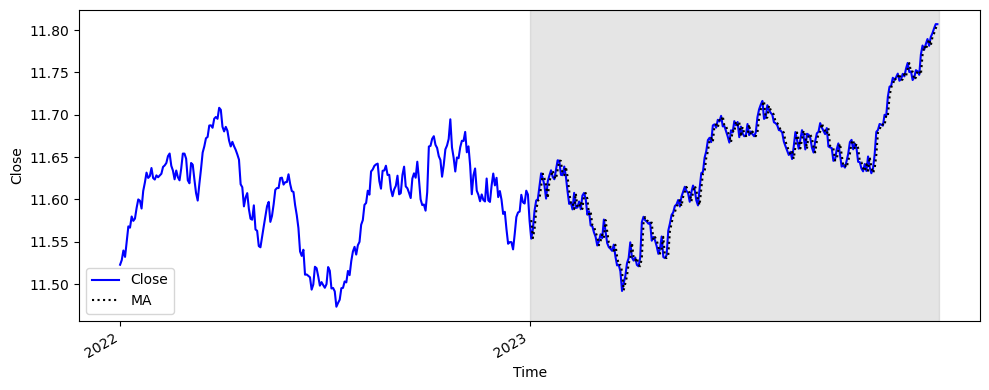

In [36]:
#===============================================================================================================================
# MA: LOG - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(dfln.loc[testini-testlen:,'CloseLn'] , 'b-' , label='Close')    
#ax.plot(dfln.loc[testini+1:,'pred_LastLn']  , 'r-' , label='Last')
#ax.plot(dfln.loc[testini+1:,'pred_MeanLn']  , 'y-.', label='Mean')
ax.plot(dfln.loc[testini+1:,'pred_MALn']    , 'k:' , label='MA')   

ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Close')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
plt.xticks([testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [37]:
#===============================================================================================================================
# MA: PRICE - RECOVER
#===============================================================================================================================
df['pred_MA'] = 0.0
df.loc[testini:,'pred_MA']= np.round(np.exp(dfln.loc[testini:,'pred_MALn']),2)

df[testini-1:]

,Date,Close,pred_Last,pred_Mean,pred_MA
5694,2022-12-29,109734.60,0.00,0.00,0.00
5695,2023-01-02,106376.02,109734.60,55564.15,109747.57
5696,2023-01-03,104165.74,106376.02,55573.07,106470.77
5697,2023-01-04,105334.46,104165.74,55581.60,104229.91
5698,2023-01-05,107641.32,105334.46,55590.33,105303.06
...,...,...,...,...,...
5938,2023-12-21,132182.01,130804.17,57947.47,130831.75
5939,2023-12-22,132752.93,132182.01,57959.97,132145.31
5940,2023-12-26,133532.92,132752.93,57972.56,132736.48
5941,2023-12-27,134193.72,133532.92,57985.28,133511.35


In [38]:
#===============================================================================================================================
# MA: PRICE - PERFORMANCE
#===============================================================================================================================
mse_Last = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last'])
mse_Mean = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean'])
mse_MA   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_MA'  ])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,))  , "{:,}".format(round(sqrt(mse_Last),))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,))  , "{:,}".format(round(sqrt(mse_Mean),))] ,
                ['MA'    , "{:,}".format(round(mse_MA,  ))  , "{:,}".format(round(sqrt(mse_MA  ),))] ]

df_metrics   = pd.DataFrame(data_metrics, columns=['Price', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Price           MSE   RMSE
#------------------------------
# 0  Last      1,476,001  1,215
# 1  Mean  3,357,125,693 57,941
# 2  MA        1,482,532  1,218
#-------------------------------------------------------------------------------------------------------------------------------

,Price,MSE,RMSE
0,Last,"1,476,001","1,215"
1,Mean,"3,357,125,693","57,941"
2,MA,"1,482,822","1,218"


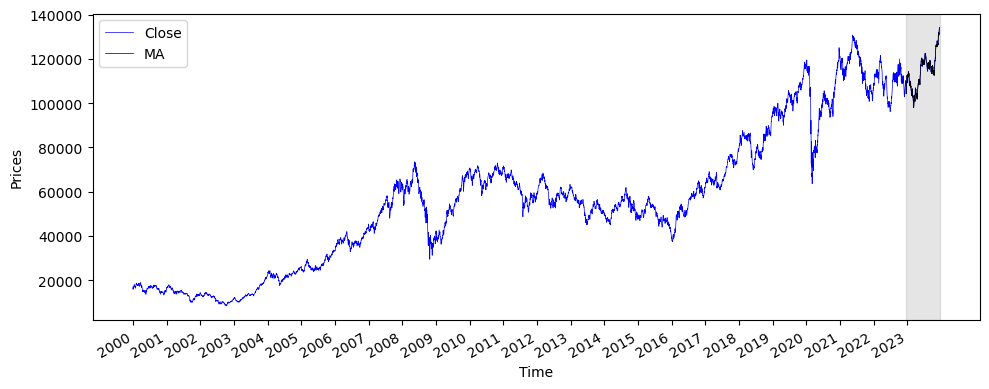

In [39]:
#===============================================================================================================================
# MA: PRICES - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df['Close'], 'b-', label='Close', lw=0.5)    
#ax.plot(df.loc[testini+1:,'pred_Last'], 'r-' , label='Last', lw=0.5)
#ax.plot(df.loc[testini+1:,'pred_Mean'], 'm-.', label='Mean', lw=0.5)
ax.plot(df.loc[testini+1:,'pred_MA']  , 'k-' , label='MA'   , lw=0.5)   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Prices')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

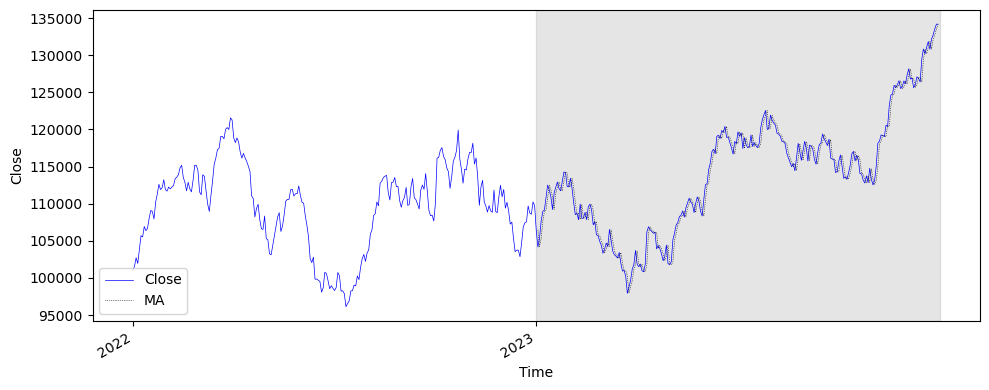

In [40]:
#===============================================================================================================================
# MA: PRICES - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df.loc[testini-testlen:,'Close'], 'b-' , label='Close', lw=0.5)    
#ax.plot(df.loc[testini+1:,'pred_Last']  , 'r-' , label='Last' , lw=0.5)
#ax.plot(df.loc[testini+1:,'pred_Mean']  , 'y-.', label='Mean' , lw=0.5)
ax.plot(df.loc[testini+1:,'pred_MA']    , 'k:' , label='MA'   , lw=0.5)   

ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Close')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
plt.xticks([testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [41]:
#df.loc[testini:,['Date','pred_MA'  ]].to_excel('Data/Output/Rolling-Ln-Daily-MA.xlsx')
df.loc[testini:,['Date','pred_Last']].to_csv('Data/Output/Rolling-Ln-Daily-Last.csv')
df.loc[testini:,['Date','pred_MA'  ]].to_csv('Data/Output/Rolling-Ln-Daily-MA.csv'  )


In [42]:
################################################################################################################################
#
# AUTOREGRESSIVE (AR)
#
################################################################################################################################

In [43]:
#===============================================================================================================================
# AR
#
# LOG:      ADF Test + ACF Coefficients slowly decaying => AUTOCORRELATION present => NON-STATIONARY
# LOG-DIFF: ADF Test + ACF Almost no Autocorrelation => STATIONARY  => RANDOM WALK
#           ACF Coefficients don't become abruptly non-significant  => No MOVING AVERAGE
#           PACF Coefficients don't become abruptly non-significant => No AUTOREGRESSIVE
#===============================================================================================================================


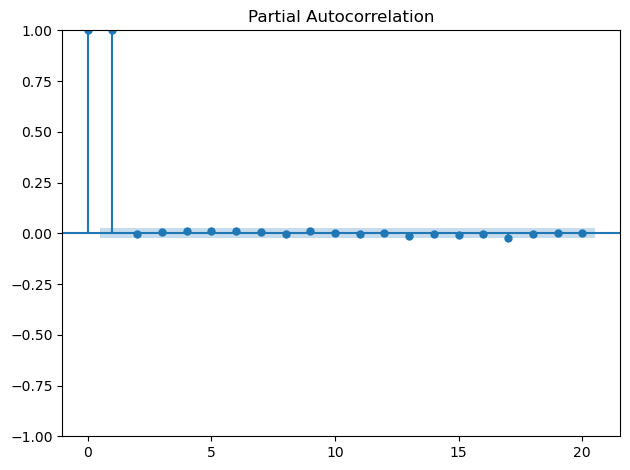

In [44]:
#===============================================================================================================================
# AR: LOG - PACF - AR(p) order
#===============================================================================================================================
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dfln['CloseLn'], lags=20)
plt.tight_layout()

#-------------------------------------------------------------------------------------------------------------------------------
# PACF - order 1 AR(1)
#-------------------------------------------------------------------------------------------------------------------------------
# ****** AR(1) process ******
#-------------------------------------------------------------------------------------------------------------------------------

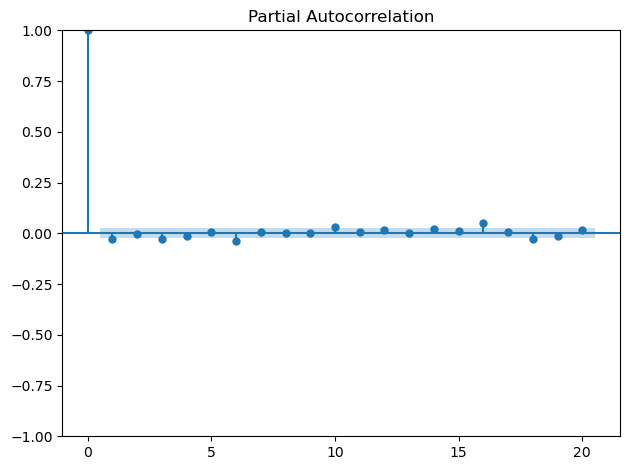

In [45]:
#===============================================================================================================================
# AR: LOG-DIFF - PACF Plot - Identifies the order p of AR process
#===============================================================================================================================
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(dfln['CloseLnDiff'], lags=20)
plt.tight_layout()

#-------------------------------------------------------------------------------------------------------------------------------
# PACF - NO AUTOCORRELATION
#-------------------------------------------------------------------------------------------------------------------------------
# ****** AR(0) process ******
#-------------------------------------------------------------------------------------------------------------------------------

#===============================================================================================================================
# AR: LOG-DIFF - ADF Test + PACF Plot
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ****** RANDOM WALK ******
#-------------------------------------------------------------------------------------------------------------------------------

In [46]:
#===============================================================================================================================
# AR: LOG-DIFF - ROLLING FORECAST
#===============================================================================================================================
pred_ARLnDiff = rolling_forecast(dfln['CloseLnDiff'], testini, HORIZON, WINDOW, 'AR', (1,0,0))

testln.loc[testini:,'pred_ARLnDiff'] = 0
testln.loc[testini:,'pred_ARLnDiff'] = pred_ARLnDiff
testln.loc[testini:,'pred_ARLnDiff'].to_excel('Data/Output/Rolling-Ln-Daily-ARLnDiff.xlsx')

testln

#-------------------------------------------------------------------------------------------------------------------------------
#                                SARIMAX Results                                
# ==============================================================================
# Dep. Variable:            CloseLnDiff   No. Observations:                 5942
# Model:               SARIMAX(1, 0, 0)   Log Likelihood               15586.545
# Date:                Mon, 06 May 2024   AIC                         -31169.089
# Time:                        09:22:07   BIC                         -31155.710
# Sample:                             0   HQIC                        -31164.441
#                                - 5942                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ar.L1         -0.0277      0.007     -4.098      0.000      -0.041      -0.014
# sigma2         0.0003   2.79e-06    110.736      0.000       0.000       0.000
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10749.53
# Prob(Q):                              0.97   Prob(JB):                         0.00
# Heteroskedasticity (H):               0.76   Skew:                            -0.38
# Prob(H) (two-sided):                  0.00   Kurtosis:                         9.54
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).
# phi1 = -0.02765917212101389, phi2 = 0.0003084016225115107
#-------------------------------------------------------------------------------------------------------------------------------

                               SARIMAX Results                                
Dep. Variable:            CloseLnDiff   No. Observations:                 5942
Model:               SARIMAX(1, 0, 0)   Log Likelihood               15586.545
Date:                Fri, 14 Jun 2024   AIC                         -31169.089
Time:                        10:55:02   BIC                         -31155.710
Sample:                             0   HQIC                        -31164.441
                               - 5942                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0277      0.007     -4.098      0.000      -0.041      -0.014
sigma2         0.0003   2.79e-06    110.736      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.00   Jarque-

,Date,CloseLn,pred_LastLn,pred_MeanLn,pred_MALnDiff,pred_ARLnDiff
5694,2022-12-29,11.605820,NaN,NaN,NaN,NaN
5695,2023-01-02,11.574735,11.605820,10.729549,0.000118,0.000134
5696,2023-01-03,11.553739,11.574735,10.729697,0.000890,0.000909
5697,2023-01-04,11.564896,11.553739,10.729842,0.000616,0.000606
5698,2023-01-05,11.586560,11.564896,10.729988,-0.000298,-0.000324
...,...,...,...,...,...,...
5938,2023-12-21,11.791935,11.781457,10.766810,0.000211,0.000221
5939,2023-12-22,11.796245,11.791935,10.766983,-0.000278,-0.000290
5940,2023-12-26,11.802103,11.796245,10.767156,-0.000124,-0.000119
5941,2023-12-27,11.807040,11.802103,10.767330,-0.000162,-0.000162


In [47]:
#===============================================================================================================================
# AR: LOG-DIFF - PERFORMANCE
#===============================================================================================================================
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLnDiff'], testln.loc[testini:,'pred_MALnDiff'  ])
mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLnDiff'], testln.loc[testini:,'pred_ARLnDiff'  ])

data_metrics = [['MA'    , "{:,}".format(round(mse_MA  ,6))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ,
                ['AR'    , "{:,}".format(round(mse_AR  ,6))  , "{:,}".format(round(sqrt(mse_AR)  ,6))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Log Diff', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Log Diff     MSE      RMSE
#------------------------------
# 2  MA      0.000118  0.010843
# 1  AR      0.000118  0.010841
#-------------------------------------------------------------------------------------------------------------------------------

,Log Diff,MSE,RMSE
0,MA,0.000118,0.010858
1,AR,0.000118,0.010859


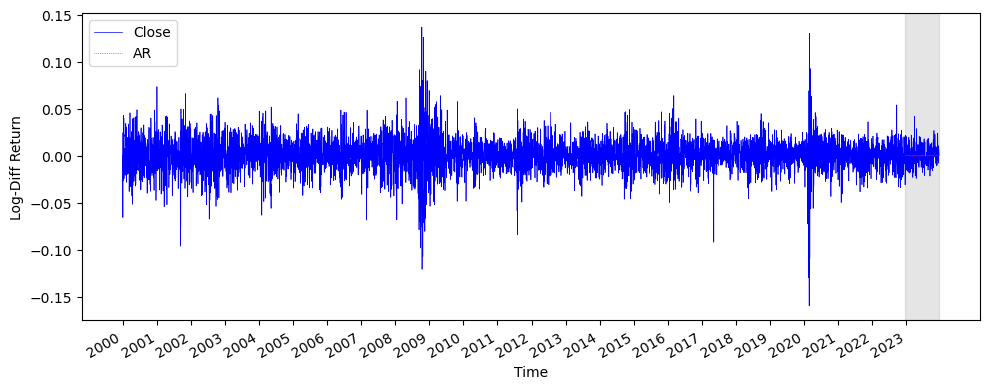

In [48]:
#===============================================================================================================================
# AR: LOG-DIFF - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln['CloseLnDiff']    , 'b-', label='Close', lw=0.5)    
#ax.plot(testln['pred_MALnDiff'], 'g-', label='MA'   , lw=0.5)   
ax.plot(testln['pred_ARLnDiff'], 'r:', label='AR'   , lw=0.5)   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log-Diff Return')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

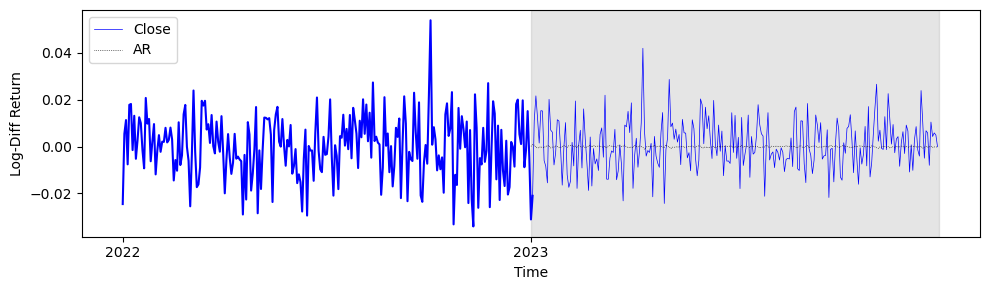

In [49]:
#===============================================================================================================================
# AR: LOG-DIFF - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln.loc[testini-testlen:testini+1,'CloseLnDiff'], 'b-') 
ax.plot(dfln.loc[testini:totallen,'CloseLnDiff']         , 'b-' , label='Close', lw=0.5)
#ax.plot(testln.loc[testini:totallen,'pred_MALnDiff']     , 'm-.', label='MA'   , lw=0.5)
ax.plot(testln.loc[testini:totallen,'pred_ARLnDiff']     , 'k:' , label='AR'   , lw=0.5)
ax.axvspan(testini,testini+testlen, color='#808080', alpha=0.2)
ax.legend(loc=2)
plt.xticks([testini-testlen, testini],           ['2022'          , '2023'])
ax.set_xlabel('Time')
ax.set_ylabel('Log-Diff Return')
plt.tight_layout()

In [50]:
#===============================================================================================================================
# AR: LOG - RECOVER
#===============================================================================================================================
dfln['pred_ARLn'] = 0.0
dfln.loc[testini:,'pred_ARLn'] = dfln.shift(periods=1).loc[testini:, 'CloseLn'] + testln.loc[testini:,'pred_ARLnDiff']
dfln[testini-1:]


,Date,Close,CloseLn,CloseLnDiff,pred_LastLn,pred_MeanLn,pred_MALn,pred_ARLn
5694,2022-12-29,109734.60,11.605820,-0.004565,0.000000,0.000000,0.000000,0.000000
5695,2023-01-02,106376.02,11.574735,-0.031085,11.605820,10.729549,11.605938,11.605954
5696,2023-01-03,104165.74,11.553739,-0.020997,11.574735,10.729697,11.575626,11.575645
5697,2023-01-04,105334.46,11.564896,0.011157,11.553739,10.729842,11.554354,11.554345
5698,2023-01-05,107641.32,11.586560,0.021664,11.564896,10.729988,11.564598,11.564572
...,...,...,...,...,...,...,...,...
5938,2023-12-21,132182.01,11.791935,0.010479,11.781457,10.766810,11.781667,11.781677
5939,2023-12-22,132752.93,11.796245,0.004310,11.791935,10.766983,11.791657,11.791645
5940,2023-12-26,133532.92,11.802103,0.005858,11.796245,10.767156,11.796121,11.796126
5941,2023-12-27,134193.72,11.807040,0.004936,11.802103,10.767330,11.801942,11.801941


In [51]:
#===============================================================================================================================
# AR: LOG - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'])
mse_Mean   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'])
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'  ])
mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'  ])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,6 ))  , "{:,}".format(round(sqrt(mse_Last),6))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,6 ))  , "{:,}".format(round(sqrt(mse_Mean),6))] ,
                ['MA'    , "{:,}".format(round(mse_MA  ,6 ))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ,
                ['AR'    , "{:,}".format(round(mse_AR  ,6 ))  , "{:,}".format(round(sqrt(mse_AR)  ,6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#
#-----------------------------
#    Log   MSE       RMSE
#-----------------------------
# 0  Last  0.000117  0.010831
# 1  Mean  0.805004  0.897220
# 2  MA    0.000118  0.010843
# 3  AR    0.000117  0.010841
#-------------------------------------------------------------------------------------------------------------------------------

,Log,MSE,RMSE
0,Last,0.000117,0.010831
1,Mean,0.805004,0.89722
2,MA,0.000118,0.010858
3,AR,0.000118,0.010859


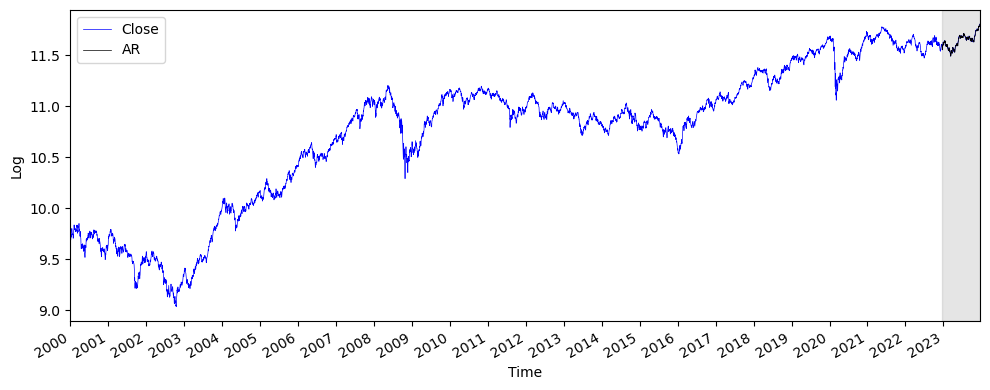

In [52]:
#===============================================================================================================================
# AR: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(dfln['CloseLn']                 , 'b-', label='Close', lw=0.5)    
#ax.plot(dfln.loc[testini:,'pred_LastLn'], 'r-' , label='Last')
#ax.plot(dfln.loc[testini:,'pred_MeanLn'], 'm-.', label='Mean')
#ax.plot(dfln.loc[testini:,'pred_MALn']  , 'y-' , label='MA')   
ax.plot(dfln.loc[testini:,'pred_ARLn']  , 'k-' , label='AR'  , lw=0.5)   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()


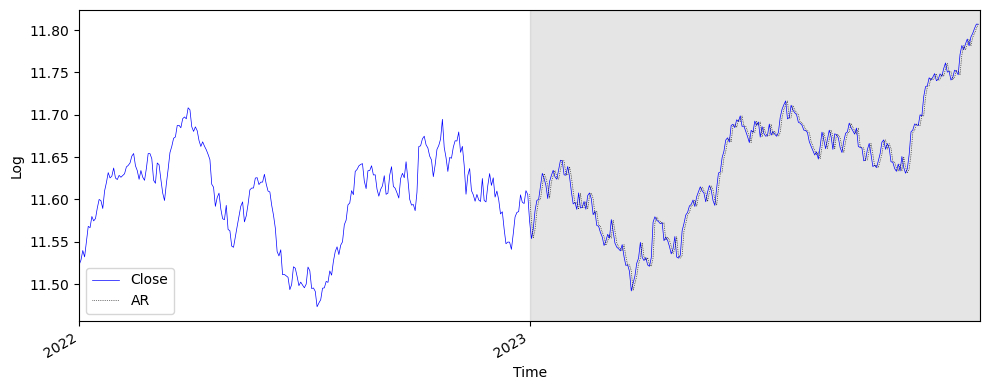

In [53]:
#===============================================================================================================================
# AR: LOG - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(dfln.loc[testini-testlen:,'CloseLn'], 'b-' , label='Close' , lw=0.5)
#ax.plot(dfln.loc[testini:,'pred_LastLn']    , 'r-' , label='Last')
#ax.plot(dfln.loc[testini:,'pred_MeanLn']    , 'm-.', label='Mean')
#ax.plot(dfln.loc[testini:,'pred_MALn']      , 'y:' , label='MA')
ax.plot(dfln.loc[testini:,'pred_ARLn']      , 'k:' , label='AR'    , lw=0.5)

ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks([testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [54]:
#===============================================================================================================================
# AR: PRICES - RECOVER
#===============================================================================================================================
df['pred_AR'] = 0.0
df.loc[testini:,'pred_AR']= np.round(np.exp(dfln.loc[testini:,'pred_ARLn']),2)

df[testini-1:]

,Date,Close,pred_Last,pred_Mean,pred_MA,pred_AR
5694,2022-12-29,109734.60,0.00,0.00,0.00,0.00
5695,2023-01-02,106376.02,109734.60,55564.15,109747.57,109749.29
5696,2023-01-03,104165.74,106376.02,55573.07,106470.77,106472.78
5697,2023-01-04,105334.46,104165.74,55581.60,104229.91,104228.91
5698,2023-01-05,107641.32,105334.46,55590.33,105303.06,105300.39
...,...,...,...,...,...,...
5938,2023-12-21,132182.01,130804.17,57947.47,130831.75,130833.02
5939,2023-12-22,132752.93,132182.01,57959.97,132145.31,132143.63
5940,2023-12-26,133532.92,132752.93,57972.56,132736.48,132737.09
5941,2023-12-27,134193.72,133532.92,57985.28,133511.35,133511.27


In [55]:
#===============================================================================================================================
# AR: PRICES - PERFORMANCE
#===============================================================================================================================
mse_Last = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last'])
mse_Mean = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean'])
mse_MA   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_MA'  ])
mse_AR   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_AR'  ])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,))  , "{:,}".format(round(sqrt(mse_Last),))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,))  , "{:,}".format(round(sqrt(mse_Mean),))] ,
                ['MA'    , "{:,}".format(round(mse_MA,  ))  , "{:,}".format(round(sqrt(mse_MA  ),))] ,
                ['AR'    , "{:,}".format(round(mse_AR,  ))  , "{:,}".format(round(sqrt(mse_AR  ),))] ]

df_metrics   = pd.DataFrame(data_metrics, columns=['Price', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Price          MSE   RMSE
#--------------------------------
# 0  Last     1,476,001  1,215
# 1  Mean 3,357,125,693 57,941
# 2  MA       1,482,532  1,218
# 3  AR       1,478,265  1,218
# 
#-------------------------------------------------------------------------------------------------------------------------------

,Price,MSE,RMSE
0,Last,"1,476,001","1,215"
1,Mean,"3,357,125,693","57,941"
2,MA,"1,482,822","1,218"
3,AR,"1,483,149","1,218"


In [56]:
################################################################################################################################
#
# ARMA
#
################################################################################################################################

#===============================================================================================================================
# ARMA: OPTIMIZE Function - AIC (Akaike Information Criterion)
#===============================================================================================================================
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_ARMA(endog: Union[pd.Series, list], order_list: list) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(endog, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False)
        except:
             continue
        
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [57]:
#===============================================================================================================================
# ARMA: TRAIN SET
#===============================================================================================================================
train = df.Close[:trainfin+1]
trainLn = dfln.CloseLn[:trainfin+1]
trainLnDiff = dfln.CloseLnDiff[:trainfin+1]
trainLnDiff

0       0.000000
1      -0.065879
2       0.024561
3      -0.008547
4       0.012479
          ...   
5690    0.019757
5691   -0.008788
5692   -0.001468
5693    0.015159
5694   -0.004565
Name: CloseLnDiff, Length: 5695, dtype: float64

In [58]:
#===============================================================================================================================
# ARMA: PARAMETERS ps, qs
#===============================================================================================================================
from itertools import product
ps = range(0, 12, 1)    
qs = range(0, 12, 1)     

order_list = list(product(ps, qs))
len(order_list)

144

In [59]:
#===============================================================================================================================
# ARMA: Optimize_ARMA
#===============================================================================================================================
#result_df = optimize_ARMA(trainLnDiff, order_list) 
#result_df

#-------------------------------------------------------------------------------------------------------------------------------
# ps = range(0, 12, 1)    
# qs = range(0, 12, 1)     
#
#-------------------------------------------------------------------------------------------------------------------------------
# 100% 144/144 [14:54<00:00, 15.43s/it]
#-------------------------------------------------------------------------------------------------------------------------------
#      (p,q)            AIC
#--------------------------
# 0   (6, 0)  -29727.461392
# 1   (0,10)  -29726.655720
# 2   (0, 6)  -29726.329560
# 3   (4,10)  -29726.217260
# 4   (7, 0)  -29725.762432
#-------------------------------------------------------------------------------------------------------------------------------

In [60]:
#===============================================================================================================================
# ARMA: LOG-DIFF - ROLLING FORECAST
#===============================================================================================================================
pred_ARMALnDiff = rolling_forecast(dfln['CloseLnDiff'], testini, HORIZON, WINDOW, 'ARMA',(6,0,0))

testln.loc[testini:,'pred_ARMALnDiff'] = 0
testln.loc[testini:,'pred_ARMALnDiff'] = pred_ARMALnDiff
testln.loc[testini:,'pred_ARMALnDiff'].to_excel('Data/Output/Rolling-Ln-Daily-ARMALnDiff.xlsx')
testln

#-------------------------------------------------------------------------------------------------------------------------------
#                                SARIMAX Results                                
# ==============================================================================
# Dep. Variable:            CloseLnDiff   No. Observations:                 5942
# Model:               SARIMAX(6, 0, 0)   Log Likelihood               15594.076
# Date:                Tue, 26 Mar 2024   AIC                         -31174.152
# Time:                        00:26:22   BIC                         -31127.323
# Sample:                             0   HQIC                        -31157.882
#                                - 5942                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ar.L1         -0.0272      0.007     -3.715      0.000      -0.041      -0.013
# ar.L2         -0.0040      0.006     -0.658      0.510      -0.016       0.008
# ar.L3         -0.0287      0.007     -3.952      0.000      -0.043      -0.014
# ar.L4         -0.0129      0.008     -1.698      0.089      -0.028       0.002
# ar.L5          0.0049      0.008      0.656      0.512      -0.010       0.020
# ar.L6         -0.0393      0.008     -4.986      0.000      -0.055      -0.024
# sigma2         0.0003    2.9e-06    106.101      0.000       0.000       0.000
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             11026.30
# Prob(Q):                              0.94   Prob(JB):                         0.00
# Heteroskedasticity (H):               0.76   Skew:                            -0.43
# Prob(H) (two-sided):                  0.00   Kurtosis:                         9.62
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).
# θ = -0.02715488660035384, σ2 = -0.004038893219812755
#-------------------------------------------------------------------------------------------------------------------------------

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

                               SARIMAX Results                                
Dep. Variable:            CloseLnDiff   No. Observations:                 5942
Model:               SARIMAX(6, 0, 0)   Log Likelihood               15594.076
Date:                Fri, 14 Jun 2024   AIC                         -31174.152
Time:                        11:02:36   BIC                         -31127.323
Sample:                             0   HQIC                        -31157.882
                               - 5942                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0272      0.007     -3.715      0.000      -0.041      -0.013
ar.L2         -0.0040      0.006     -0.658      0.510      -0.016       0.008
ar.L3         -0.0287      0.007     -3.952      0.0

,Date,CloseLn,pred_LastLn,pred_MeanLn,pred_MALnDiff,pred_ARLnDiff,pred_ARMALnDiff
5694,2022-12-29,11.605820,NaN,NaN,NaN,NaN,NaN
5695,2023-01-02,11.574735,11.605820,10.729549,0.000118,0.000134,0.000309
5696,2023-01-03,11.553739,11.574735,10.729697,0.000890,0.000909,-0.000314
5697,2023-01-04,11.564896,11.553739,10.729842,0.000616,0.000606,0.000959
5698,2023-01-05,11.586560,11.564896,10.729988,-0.000298,-0.000324,0.000842
...,...,...,...,...,...,...,...
5938,2023-12-21,11.791935,11.781457,10.766810,0.000211,0.000221,-0.000833
5939,2023-12-22,11.796245,11.791935,10.766983,-0.000278,-0.000290,-0.000949
5940,2023-12-26,11.802103,11.796245,10.767156,-0.000124,-0.000119,0.000221
5941,2023-12-27,11.807040,11.802103,10.767330,-0.000162,-0.000162,-0.000613


In [61]:
#===============================================================================================================================
# ARMA: LOG-DIFF - PERFORMANCE
#===============================================================================================================================
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLnDiff'], testln.loc[testini:,'pred_MALnDiff'  ])
mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLnDiff'], testln.loc[testini:,'pred_ARLnDiff'  ])
mse_ARMA   = mean_squared_error(dfln.loc[testini:,'CloseLnDiff'], testln.loc[testini:,'pred_ARMALnDiff'])

data_metrics = [['MA'    , "{:,}".format(round(mse_MA  ,6))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ,
                ['AR'    , "{:,}".format(round(mse_AR  ,6))  , "{:,}".format(round(sqrt(mse_AR)  ,6))] ,
                ['ARMA'  , "{:,}".format(round(mse_ARMA,6))  , "{:,}".format(round(sqrt(mse_ARMA),6))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Log Diff', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Log Diff     MSE      RMSE
#------------------------------
# 0  MA      0.000118  0.010843
# 1  AR      0.000118  0.010859
# 2  ARMA    0.000118  0.010841
#-------------------------------------------------------------------------------------------------------------------------------

,Log Diff,MSE,RMSE
0,MA,0.000118,0.010858
1,AR,0.000118,0.010859
2,ARMA,0.000118,0.010841


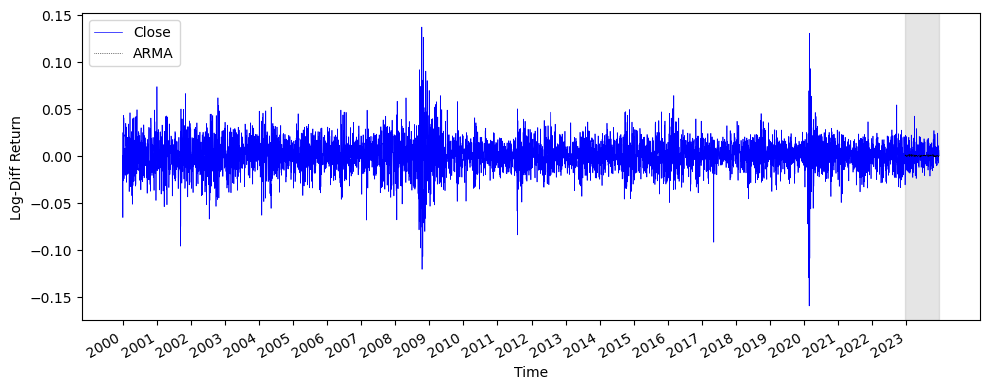

In [62]:
#===============================================================================================================================
# ARMA: LOG-DIFF - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln['CloseLnDiff']      , 'b-' , label='Close', lw=0.5)
#ax.plot(testln['pred_MALnDiff']  , 'g-' , label='MA')
#ax.plot(testln['pred_ARLnDiff']  , 'y-.', label='AR')
ax.plot(testln['pred_ARMALnDiff'], 'k:' , label='ARMA' , lw=0.5)
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log-Diff Return')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()


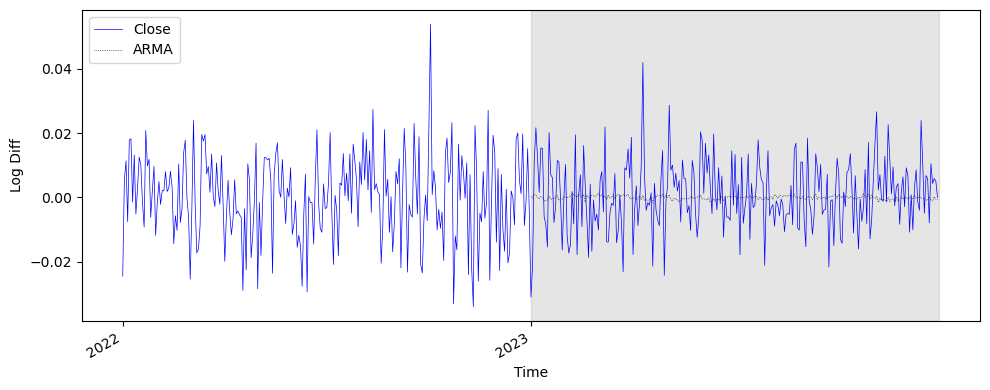

In [63]:
#===============================================================================================================================
# ARMA: LOG-DIFF - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[testini-testlen:,'CloseLnDiff'], 'b-' , label='Close', lw=0.5)
#ax.plot(testln.loc[-testlen:,'pred_MALnDiff']   , 'g-' , label='MA')
#ax.plot(testln.loc[-testlen:,'pred_ARLnDiff']   , 'y-.', label='AR')
ax.plot(testln.loc[-testlen:,'pred_ARMALnDiff'] , 'k:' , label='ARMA' , lw=0.5)
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log Diff')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
plt.xticks(np.arange(testini-testlen, totallen, testlen), [2022, 2023])
fig.autofmt_xdate()
plt.tight_layout()



In [64]:
#===============================================================================================================================
# ARMA: LOG - RECOVER
#===============================================================================================================================
dfln['pred_ARMALn'] = 0.0
dfln.loc[testini:,'pred_ARMALn'] = dfln.shift(periods=1).loc[testini:, 'CloseLn'] + testln.loc[testini:,'pred_ARMALnDiff']
dfln[testini-1:]



,Date,Close,CloseLn,CloseLnDiff,pred_LastLn,pred_MeanLn,pred_MALn,pred_ARLn,pred_ARMALn
5694,2022-12-29,109734.60,11.605820,-0.004565,0.000000,0.000000,0.000000,0.000000,0.000000
5695,2023-01-02,106376.02,11.574735,-0.031085,11.605820,10.729549,11.605938,11.605954,11.606129
5696,2023-01-03,104165.74,11.553739,-0.020997,11.574735,10.729697,11.575626,11.575645,11.574421
5697,2023-01-04,105334.46,11.564896,0.011157,11.553739,10.729842,11.554354,11.554345,11.554698
5698,2023-01-05,107641.32,11.586560,0.021664,11.564896,10.729988,11.564598,11.564572,11.565738
...,...,...,...,...,...,...,...,...,...
5938,2023-12-21,132182.01,11.791935,0.010479,11.781457,10.766810,11.781667,11.781677,11.780623
5939,2023-12-22,132752.93,11.796245,0.004310,11.791935,10.766983,11.791657,11.791645,11.790986
5940,2023-12-26,133532.92,11.802103,0.005858,11.796245,10.767156,11.796121,11.796126,11.796466
5941,2023-12-27,134193.72,11.807040,0.004936,11.802103,10.767330,11.801942,11.801941,11.801490


In [65]:
#===============================================================================================================================
# ARMA: LOG - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'])
mse_Mean   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'])
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'  ])
mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'  ])
mse_ARMA   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,8 ))  , "{:,}".format(round(sqrt(mse_Last),6))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,8))  , "{:,}".format(round(sqrt(mse_Mean) ,6))] ,
                ['MA'    , "{:,}".format(round(mse_MA  ,8 ))  , "{:,}".format(round(sqrt(mse_MA)  ,6))] ,
                ['AR'    , "{:,}".format(round(mse_AR  ,8 ))  , "{:,}".format(round(sqrt(mse_AR)  ,6))] ,
                ['ARMA'  , "{:,}".format(round(mse_ARMA,8 ))  , "{:,}".format(round(sqrt(mse_ARMA),6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Log          MSE        RMSE
#--------------------------------
# 0  Last  0.00011731  0.010831
# 1  Mean  0.80500390  0.897220
# 2  MA    0.00011758  0.010843
# 3  AR    0.00011792  0.010859
# 4  ARMA  0.00011754  0.010841
#-------------------------------------------------------------------------------------------------------------------------------

,Log,MSE,RMSE
0,Last,0.00011731,0.010831
1,Mean,0.8050039,0.89722
2,MA,0.00011789,0.010858
3,AR,0.00011792,0.010859
4,ARMA,0.00011754,0.010841


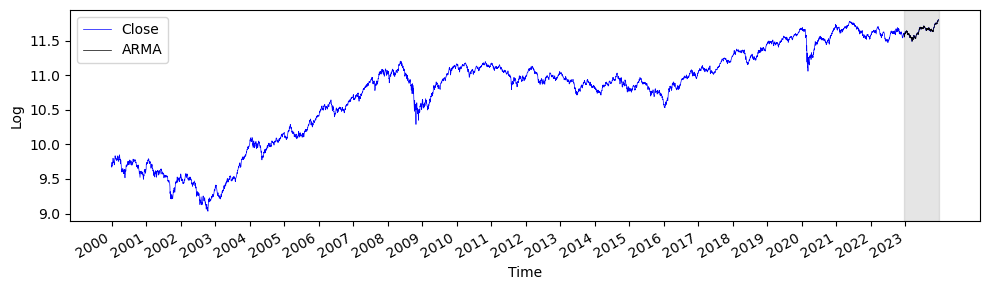

In [66]:
#===============================================================================================================================
# ARMA: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln['CloseLn'], 'b-', label='Close', lw=0.5)
#ax.plot(dfln.loc[testini:,'pred_LastLn'], 'r-' , label='Last')
#ax.plot(dfln.loc[testini:,'pred_MeanLn'], 'm-.', label='Mean')
#ax.plot(dfln.loc[testini:,'pred_MALn']  , 'y-' , label='MA')   
#ax.plot(dfln.loc[testini:,'pred_ARLn']  , 'g-.', label='AR')   
ax.plot(dfln.loc[testini:,'pred_ARMALn'], 'k-' , label='ARMA', lw=0.5)
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()


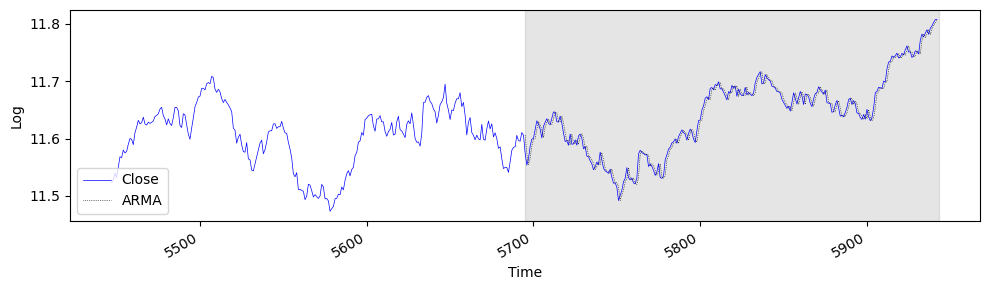

In [67]:
#===============================================================================================================================
# ARMA: LOG - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln.loc[testini-testlen:,'CloseLn']   , 'b-', label='Close', lw=0.5)
#ax.plot(dfln.loc[testini:,'pred_LastLn'] , 'r-' , label='Last')
#ax.plot(dfln.loc[testini:,'pred_MeanLn'] , 'm-.', label='Mean')
#ax.plot(dfln.loc[testini:,'pred_MALn']   , 'y:' , label='MA')
#ax.plot(dfln.loc[testini:,'pred_ARLn']   , 'g:' , label='AR')
ax.plot(dfln.loc[testini:,'pred_ARMALn'] , 'k:' , label='ARMA', lw=0.5)

ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
#plt.xticks([testini-totallen, totallen],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [68]:
#===============================================================================================================================
# ARMA: PRICE - RECOVER
#===============================================================================================================================
df['pred_ARMA'] = 0.0
df.loc[testini:,'pred_ARMA']= np.round(np.exp(dfln.loc[testini:,'pred_ARMALn']),2)

df[testini-1:]

,Date,Close,pred_Last,pred_Mean,pred_MA,pred_AR,pred_ARMA
5694,2022-12-29,109734.60,0.00,0.00,0.00,0.00,0.00
5695,2023-01-02,106376.02,109734.60,55564.15,109747.57,109749.29,109768.49
5696,2023-01-03,104165.74,106376.02,55573.07,106470.77,106472.78,106342.62
5697,2023-01-04,105334.46,104165.74,55581.60,104229.91,104228.91,104265.68
5698,2023-01-05,107641.32,105334.46,55590.33,105303.06,105300.39,105423.17
...,...,...,...,...,...,...,...
5938,2023-12-21,132182.01,130804.17,57947.47,130831.75,130833.02,130695.24
5939,2023-12-22,132752.93,132182.01,57959.97,132145.31,132143.63,132056.66
5940,2023-12-26,133532.92,132752.93,57972.56,132736.48,132737.09,132782.23
5941,2023-12-27,134193.72,133532.92,57985.28,133511.35,133511.27,133451.11


In [69]:
#===============================================================================================================================
# ARMA: PRICE - PERFORMANCE
#===============================================================================================================================
mse_Last = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last'])
mse_Mean = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean'])
mse_MA   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_MA'  ])
mse_AR   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_AR'  ])
mse_ARMA = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_ARMA'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,))  , "{:,}".format(round(sqrt(mse_Last),))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,))  , "{:,}".format(round(sqrt(mse_Mean),))] ,
                ['MA'    , "{:,}".format(round(mse_MA,  ))  , "{:,}".format(round(sqrt(mse_MA)  ,))] ,
                ['AR'    , "{:,}".format(round(mse_AR,  ))  , "{:,}".format(round(sqrt(mse_AR)  ,))] ,
                ['ARMA'  , "{:,}".format(round(mse_ARMA,))  , "{:,}".format(round(sqrt(mse_ARMA),))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Model', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Model        MSE     RMSE
#-----------------------------
# 0  Last     1,476,001  1,215
# 1  Mean 3,357,125,693 57,941
# 2  MA       1,482,532  1,218
# 3  AR       1,483,149  1,218
# 4  ARMA     1,481,847  1,217
#-------------------------------------------------------------------------------------------------------------------------------

,Model,MSE,RMSE
0,Last,"1,476,001","1,215"
1,Mean,"3,357,125,693","57,941"
2,MA,"1,482,822","1,218"
3,AR,"1,483,149","1,218"
4,ARMA,"1,481,847","1,217"


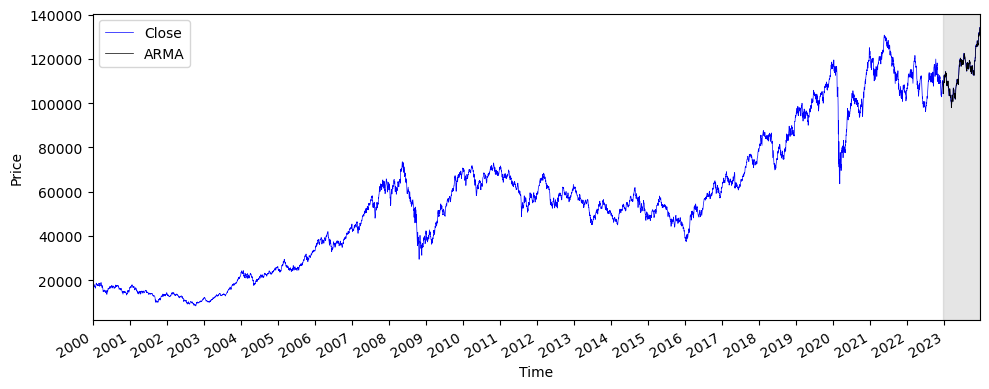

In [70]:
#===============================================================================================================================
# ARMA: PRICE - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df['Close'], 'b-', label='Close', lw=0.5)    
#ax.plot(df.loc[testini:,'pred_Last'], 'r-' , label='Last', lw=0.5)
#ax.plot(df.loc[testini:,'pred_Mean'], 'm-.', label='Mean')
#ax.plot(df.loc[testini:,'pred_MA']  , 'y-' , label='MA')   
#ax.plot(df.loc[testini:,'pred_AR']  , 'g-.', label='AR')   
ax.plot(df.loc[testini:,'pred_ARMA'], 'k-' , label='ARMA', lw=0.5)   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

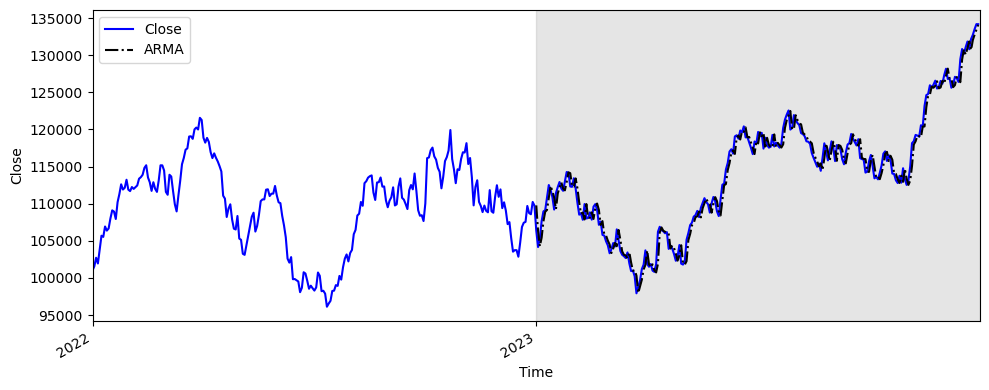

In [71]:
#===============================================================================================================================
# ARMA: PRICE - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df.loc[testini-testlen:,'Close']  , 'b-' , label='Close')
#ax.plot(df.loc[testini:,'pred_Last'], 'r-' , label='Last')
#ax.plot(df.loc[testini:,'pred_Mean'], 'm-.', label='Mean')
#ax.plot(df.loc[testini:,'pred_MA']  , 'y:' , label='MA')
#ax.plot(df.loc[testini:,'pred_AR']  , 'g:' , label='AR')
ax.plot(df.loc[testini:,'pred_ARMA'], 'k-.', label='ARMA')

ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Close')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini-testlen, totallen)
plt.xticks([ testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [72]:
################################################################################################################################
#
# ARIMA
#
################################################################################################################################

#===============================================================================================================================
# ARIMA: optimize_ARIMA() FUNCTION - AIC - fits all unique ARIMA(p,q) models
#===============================================================================================================================
from typing import Union
from tqdm import tqdm_notebook
#from tqdm.notebook import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX
#please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`

def optimize_ARIMA(endog: Union[pd.Series, list], order_list: list, d: int) -> pd.DataFrame:     
    
    results = []   

    for order in tqdm_notebook(order_list):    
    #for order in tqdm.notebook.tqdm(order_list):    
        try: 
            model = SARIMAX(endog, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)     
        except:
            continue 
        
        aic = model.aic   
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)    
    result_df.columns = ['(p,q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)   
    
    return result_df

In [73]:
#===============================================================================================================================
# ARIMA: LOG - TRAIN SET - trainln
#===============================================================================================================================
train = df.Close[:trainfin+1]
trainln = dfln.CloseLn[:testini]
trainln

0        9.736867
1        9.670988
2        9.695549
3        9.687002
4        9.699482
          ...    
5690    11.605482
5691    11.596694
5692    11.595226
5693    11.610385
5694    11.605820
Name: CloseLn, Length: 5695, dtype: float64

In [74]:
#===============================================================================================================================
# ARIMA: LOG - PARAMETERS list
#===============================================================================================================================
from itertools import product
#-------------------------------------------------------------------------------------------------------------------------------
# Stationary Random walk with 1 diff
#-------------------------------------------------------------------------------------------------------------------------------
d = 1

#-------------------------------------------------------------------------------------------------------------------------------
# AR(6), MA(6)
#-------------------------------------------------------------------------------------------------------------------------------
ps = range(0, 7, 1)   
qs = range(0, 7, 1)   

order_list = list(product(ps, qs)) 
len(order_list)

49

In [75]:
#===============================================================================================================================
# ARIMA: LOG - PARAMETERRS - optimize_ARIMA (AIC)
#===============================================================================================================================
#result_df = optimize_ARIMA(trainln, order_list, d) 
#result_df

#-------------------------------------------------------------------------------------------------------------------------------
# 100% 64/64 [03:26<00:00, 7.03s/it]
#-------------------------------------------------------------------------------------------------------------------------------
#--------------------------
#     (p,q)             AIC
#--------------------------
#-------------------------------------------------------------------------------------------------------------------------------

In [76]:
#===============================================================================================================================
# ARIMA: LOG - FORECAST
#===============================================================================================================================
pred_ARIMALn = rolling_forecast(dfln['CloseLn'], testini, HORIZON, WINDOW, 'ARIMA',(6,1,0))

testln.loc[testini:,'pred_ARIMALn'] = 0
testln.loc[testini:,'pred_ARIMALn'] = pred_ARIMALn
testln.loc[testini:,'pred_ARIMALn'].to_excel('Data/Output/Rolling-Ln-Daily-ARIMALn.xlsx')
testln

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximu

                               SARIMAX Results                                
Dep. Variable:                CloseLn   No. Observations:                 5942
Model:               SARIMAX(6, 1, 0)   Log Likelihood               15590.957
Date:                Fri, 14 Jun 2024   AIC                         -31167.913
Time:                        11:09:55   BIC                         -31121.086
Sample:                             0   HQIC                        -31151.644
                               - 5942                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0266      0.007     -3.633      0.000      -0.041      -0.012
ar.L2         -0.0039      0.006     -0.632      0.527      -0.016       0.008
ar.L3         -0.0288      0.007     -3.966      0.0

,Date,CloseLn,pred_LastLn,pred_MeanLn,pred_MALnDiff,pred_ARLnDiff,pred_ARMALnDiff,pred_ARIMALn
5694,2022-12-29,11.605820,NaN,NaN,NaN,NaN,NaN,NaN
5695,2023-01-02,11.574735,11.605820,10.729549,0.000118,0.000134,0.000309,11.606108
5696,2023-01-03,11.553739,11.574735,10.729697,0.000890,0.000909,-0.000314,11.574407
5697,2023-01-04,11.564896,11.553739,10.729842,0.000616,0.000606,0.000959,11.554687
5698,2023-01-05,11.586560,11.564896,10.729988,-0.000298,-0.000324,0.000842,11.565729
...,...,...,...,...,...,...,...,...
5938,2023-12-21,11.791935,11.781457,10.766810,0.000211,0.000221,-0.000833,11.780607
5939,2023-12-22,11.796245,11.791935,10.766983,-0.000278,-0.000290,-0.000949,11.790997
5940,2023-12-26,11.802103,11.796245,10.767156,-0.000124,-0.000119,0.000221,11.796467
5941,2023-12-27,11.807040,11.802103,10.767330,-0.000162,-0.000162,-0.000613,11.801486


In [77]:
dfln.loc[testini:,'pred_ARIMALn'] = 0
dfln.loc[testini:,'pred_ARIMALn'] = pred_ARIMALn
dfln.loc[testini:,'pred_ARIMALn'].to_excel('Data/Output/Rolling-Ln-Daily-ARIMALn.xlsx')
dfln

,Date,Close,CloseLn,CloseLnDiff,pred_LastLn,pred_MeanLn,pred_MALn,pred_ARLn,pred_ARMALn,pred_ARIMALn
0,2000-01-03,16930.42,9.736867,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,2000-01-04,15851.00,9.670988,-0.065879,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2,2000-01-05,16245.14,9.695549,0.024561,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
3,2000-01-06,16106.89,9.687002,-0.008547,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
4,2000-01-07,16309.15,9.699482,0.012479,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...
5938,2023-12-21,132182.01,11.791935,0.010479,11.781457,10.766810,11.781667,11.781677,11.780623,11.780607
5939,2023-12-22,132752.93,11.796245,0.004310,11.791935,10.766983,11.791657,11.791645,11.790986,11.790997
5940,2023-12-26,133532.92,11.802103,0.005858,11.796245,10.767156,11.796121,11.796126,11.796466,11.796467
5941,2023-12-27,134193.72,11.807040,0.004936,11.802103,10.767330,11.801942,11.801941,11.801490,11.801486


In [78]:
#===============================================================================================================================
# ARIMA: LOG - PERFORMANCE
#===============================================================================================================================
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'  ])
mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'  ])
mse_ARMA   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn'])
mse_ARIMA  = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMALn'])

data_metrics = [['MA'    , "{:,}".format(round(mse_MA  ,6))  , "{:,}".format(round(sqrt(mse_MA)   ,6))] ,
                ['AR'    , "{:,}".format(round(mse_AR  ,6))  , "{:,}".format(round(sqrt(mse_AR)   ,6))] ,
                ['ARMA'  , "{:,}".format(round(mse_AR  ,6))  , "{:,}".format(round(sqrt(mse_ARMA) ,6))] ,
                ['ARIMA' , "{:,}".format(round(mse_ARIMA,6)) , "{:,}".format(round(sqrt(mse_ARIMA),6))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Log          MSE      RMSE
#------------------------------
# 0  MA      0.000118  0.010843
# 1  AR      0.000118  0.010859
# 2  ARMA    0.000118  0.010841
# 3  ARIMA   0.000118  0.010840
#-------------------------------------------------------------------------------------------------------------------------------

,Log,MSE,RMSE
0,MA,0.000118,0.010858
1,AR,0.000118,0.010859
2,ARMA,0.000118,0.010841
3,ARIMA,0.000118,0.01084


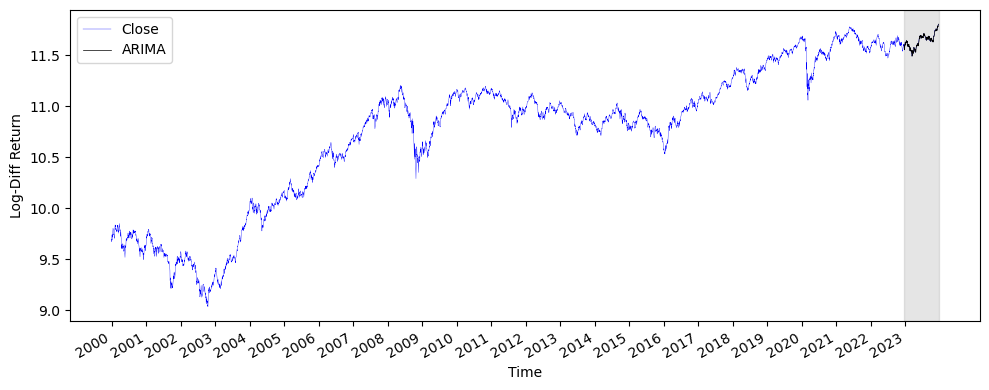

In [79]:
#===============================================================================================================================
# ARIMA: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln['CloseLn']      , 'b-' , label='Close', lw=0.25)
#ax.plot(dfln['pred_MALn']  , 'g-' , label='MA'   , lw=0.5)
#ax.plot(dfln['pred_ARLn']  , 'y-.', label='AR'   , lw=0.5)
#ax.plot(dfln['pred_ARMALn'], 'r-.' , label='ARMA' , lw=0.5)
ax.plot(dfln['pred_ARIMALn'],'k-' , label='ARIMA', lw=0.5)
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log-Diff Return')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()


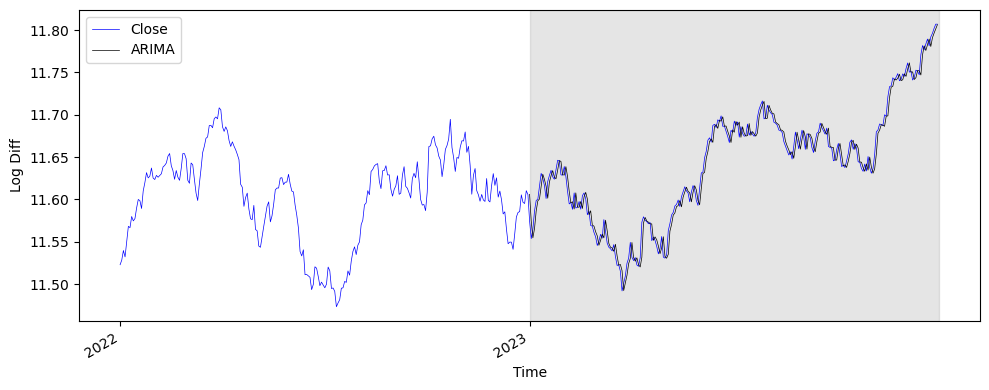

In [80]:
#===============================================================================================================================
# ARIMA: LOG - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[testini-testlen:,'CloseLn'], 'b-' , label='Close', lw=0.5)
#ax.plot(testln.loc[-testlen:,'pred_MALn']   , 'g:' , label='MA'   , lw=0.5)
#ax.plot(testln.loc[-testlen:,'pred_ARLn']   , 'y-.', label='AR'   , lw=0.5)
#ax.plot(testln.loc[-testlen:,'pred_ARMALn'] , 'r-.', label='ARMA' , lw=0.5)
ax.plot(testln.loc[-testlen:,'pred_ARIMALn'], 'k-' , label='ARIMA', lw=0.5)
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log Diff')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
plt.xticks(np.arange(testini-testlen, totallen, testlen), [2022, 2023])
fig.autofmt_xdate()
plt.tight_layout()



In [81]:
#===============================================================================================================================
# ARIMA: LOG - RECOVER
#===============================================================================================================================
dfln['pred_ARIMALn'] = 0.0
dfln.loc[testini:,'pred_ARIMALn'] = testln.loc[testini:,'pred_ARIMALn']
dfln[testini-1:]



,Date,Close,CloseLn,CloseLnDiff,pred_LastLn,pred_MeanLn,pred_MALn,pred_ARLn,pred_ARMALn,pred_ARIMALn
5694,2022-12-29,109734.60,11.605820,-0.004565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5695,2023-01-02,106376.02,11.574735,-0.031085,11.605820,10.729549,11.605938,11.605954,11.606129,11.606108
5696,2023-01-03,104165.74,11.553739,-0.020997,11.574735,10.729697,11.575626,11.575645,11.574421,11.574407
5697,2023-01-04,105334.46,11.564896,0.011157,11.553739,10.729842,11.554354,11.554345,11.554698,11.554687
5698,2023-01-05,107641.32,11.586560,0.021664,11.564896,10.729988,11.564598,11.564572,11.565738,11.565729
...,...,...,...,...,...,...,...,...,...,...
5938,2023-12-21,132182.01,11.791935,0.010479,11.781457,10.766810,11.781667,11.781677,11.780623,11.780607
5939,2023-12-22,132752.93,11.796245,0.004310,11.791935,10.766983,11.791657,11.791645,11.790986,11.790997
5940,2023-12-26,133532.92,11.802103,0.005858,11.796245,10.767156,11.796121,11.796126,11.796466,11.796467
5941,2023-12-27,134193.72,11.807040,0.004936,11.802103,10.767330,11.801942,11.801941,11.801490,11.801486


In [82]:
#===============================================================================================================================
# ARIMA: LOG - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn' ])
mse_Mean   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn' ])
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'   ])
mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'   ])
mse_ARMA   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn' ])
mse_ARIMA  = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMALn'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last ,8 ))  , "{:,}".format(round(sqrt(mse_Last) ,6))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean ,8))   , "{:,}".format(round(sqrt(mse_Mean) ,6))] ,
                ['MA'    , "{:,}".format(round(mse_MA   ,8 ))  , "{:,}".format(round(sqrt(mse_MA)   ,6))] ,
                ['AR'    , "{:,}".format(round(mse_AR   ,8 ))  , "{:,}".format(round(sqrt(mse_AR)   ,6))] ,
                ['ARMA'  , "{:,}".format(round(mse_ARMA ,8 ))  , "{:,}".format(round(sqrt(mse_ARMA) ,6))] ,
                ['ARIMA' , "{:,}".format(round(mse_ARIMA,8 ))  , "{:,}".format(round(sqrt(mse_ARIMA),6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Log          MSE        RMSE
#--------------------------------
# 0  Last  0.00011731  0.010831
# 1  Mean  0.80500390  0.897220
# 2  MA    0.00011758  0.010843
# 3  AR    0.00011792  0.010859
# 4  ARMA  0.00011754  0.010841
# 5  ARIMA 0.00011754  0.010840
#-------------------------------------------------------------------------------------------------------------------------------

,Log,MSE,RMSE
0,Last,0.00011731,0.010831
1,Mean,0.8050039,0.89722
2,MA,0.00011789,0.010858
3,AR,0.00011792,0.010859
4,ARMA,0.00011754,0.010841
5,ARIMA,0.00011751,0.01084


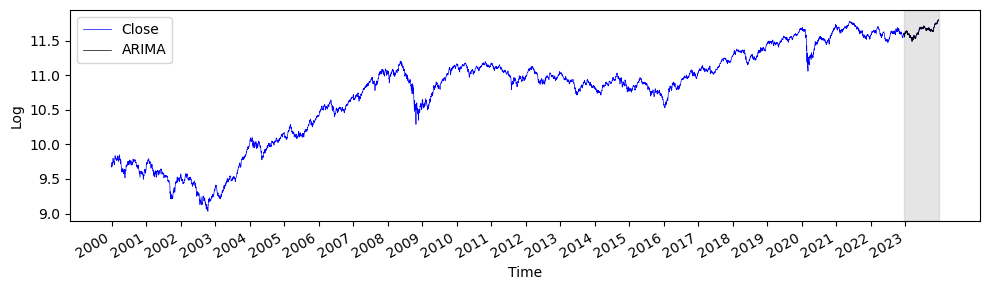

In [83]:
#===============================================================================================================================
# ARIMA: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln['CloseLn'], 'b-', label='Close',lw=0.5)    
#ax.plot(dfln.loc[testini:,'pred_LastLn'], 'r-' , label='Last' ,lw=0.5)
#ax.plot(dfln.loc[testini:,'pred_MeanLn'], 'm-.', label='Mean' ,lw=0.5)
#ax.plot(dfln.loc[testini:,'pred_MALn']  , 'y-' , label='MA'   ,lw=0.5)   
#ax.plot(dfln.loc[testini:,'pred_ARLn']  , 'g-.', label='AR'   ,lw=0.5)   
#ax.plot(dfln.loc[testini:,'pred_ARMALn'], 'r-.', label='ARMA' ,lw=0.5)   
ax.plot(dfln.loc[testini:,'pred_ARIMALn'],'k-' , label='ARIMA',lw=0.5 )
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()


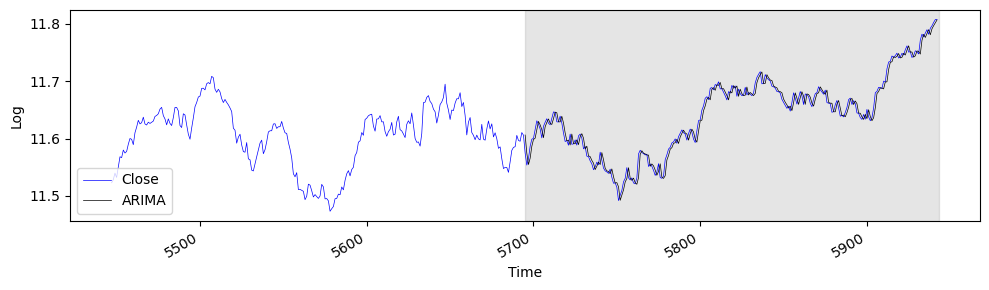

In [84]:
#===============================================================================================================================
# ARIMA: LOG - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln.loc[testini-testlen:,'CloseLn'] , 'b-', label='Close' ,lw=0.5)
#ax.plot(dfln.loc[testini:,'pred_LastLn']     , 'r-' , label='Last' ,lw=0.5)
#ax.plot(dfln.loc[testini:,'pred_MeanLn']     , 'm-.', label='Mean' ,lw=0.5)
#ax.plot(dfln.loc[testini:,'pred_MALn']       , 'y-' , label='MA'   ,lw=0.5)   
#ax.plot(dfln.loc[testini:,'pred_ARLn']       , 'g-.', label='AR'   ,lw=0.5)   
#ax.plot(dfln.loc[testini:,'pred_ARMALn']     , 'r-.', label='ARMA' ,lw=0.5)   
ax.plot(dfln.loc[testini:,'pred_ARIMALn']    ,'k-' , label='ARIMA' ,lw=0.5)
ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
#plt.xticks([testini-totallen, totallen],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [85]:
#===============================================================================================================================
# ARIMA: PRICE - RECOVER
#===============================================================================================================================
df['pred_ARIMA'] = 0.0
df.loc[testini:,'pred_ARIMA']= np.round(np.exp(dfln.loc[testini:,'pred_ARIMALn']),2)

df[testini-1:]

,Date,Close,pred_Last,pred_Mean,pred_MA,pred_AR,pred_ARMA,pred_ARIMA
5694,2022-12-29,109734.60,0.00,0.00,0.00,0.00,0.00,0.00
5695,2023-01-02,106376.02,109734.60,55564.15,109747.57,109749.29,109768.49,109766.21
5696,2023-01-03,104165.74,106376.02,55573.07,106470.77,106472.78,106342.62,106341.11
5697,2023-01-04,105334.46,104165.74,55581.60,104229.91,104228.91,104265.68,104264.58
5698,2023-01-05,107641.32,105334.46,55590.33,105303.06,105300.39,105423.17,105422.27
...,...,...,...,...,...,...,...,...
5938,2023-12-21,132182.01,130804.17,57947.47,130831.75,130833.02,130695.24,130693.12
5939,2023-12-22,132752.93,132182.01,57959.97,132145.31,132143.63,132056.66,132058.06
5940,2023-12-26,133532.92,132752.93,57972.56,132736.48,132737.09,132782.23,132782.38
5941,2023-12-27,134193.72,133532.92,57985.28,133511.35,133511.27,133451.11,133450.45


In [86]:
#===============================================================================================================================
# ARIMA: PRICE - PERFORMANCE
#===============================================================================================================================
mse_Last = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last' ])
mse_Mean = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean' ])
mse_MA   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_MA'   ])
mse_AR   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_AR'   ])
mse_ARMA = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_ARMA' ])
mse_ARIMA= mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_ARIMA'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,))  , "{:,}".format(round(sqrt(mse_Last) ,2))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,))  , "{:,}".format(round(sqrt(mse_Mean) ,2))] ,
                ['MA'    , "{:,}".format(round(mse_MA,  ))  , "{:,}".format(round(sqrt(mse_MA)   ,2))] ,
                ['AR'    , "{:,}".format(round(mse_AR,  ))  , "{:,}".format(round(sqrt(mse_AR)   ,2))] ,
                ['ARMA'  , "{:,}".format(round(mse_ARMA,))  , "{:,}".format(round(sqrt(mse_ARMA) ,2))] ,
                ['ARIMA' , "{:,}".format(round(mse_ARIMA,)) , "{:,}".format(round(sqrt(mse_ARIMA),2))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Model', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Model          MSE      RMSE
#--------------------------------
# 0  Last     1,476,001  1,214.91
# 1  Mean 3,357,125,693 57,940.71
# 2  MA       1,482,532  1,217.59
# 3  AR       1,483,149  1,217.85
# 4  ARMA     1,481,847  1,217.31
# 5  ARIMA    1,481,847  1,217.21
#-------------------------------------------------------------------------------------------------------------------------------

,Model,MSE,RMSE
0,Last,"1,476,001","1,214.91"
1,Mean,"3,357,125,693","57,940.71"
2,MA,"1,482,822","1,217.71"
3,AR,"1,483,149","1,217.85"
4,ARMA,"1,481,847","1,217.31"
5,ARIMA,"1,481,590","1,217.21"


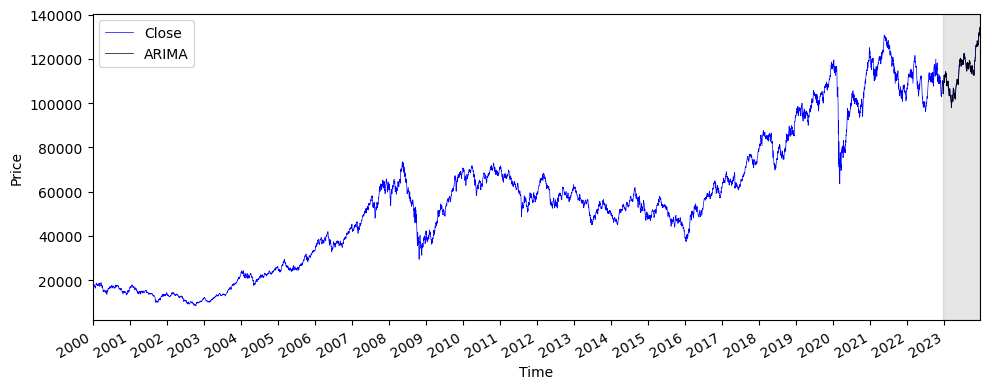

In [87]:
#===============================================================================================================================
# ARIMA: PRICE - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df['Close'], 'b-', label='Close'  , lw=0.5)    
#ax.plot(df.loc[testini:,'pred_Last'], 'r-' , label='Last')
#ax.plot(df.loc[testini:,'pred_Mean'], 'm-.', label='Mean')
#ax.plot(df.loc[testini:,'pred_MA']  , 'y-' , label='MA')   
#ax.plot(df.loc[testini:,'pred_AR']  , 'g-.', label='AR')   
#ax.plot(df.loc[testini:,'pred_ARMA'], 'k-' , label='ARMA')   
ax.plot(df.loc[testini:,'pred_ARIMA'], 'k-' , label='ARIMA' , lw=0.5)
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

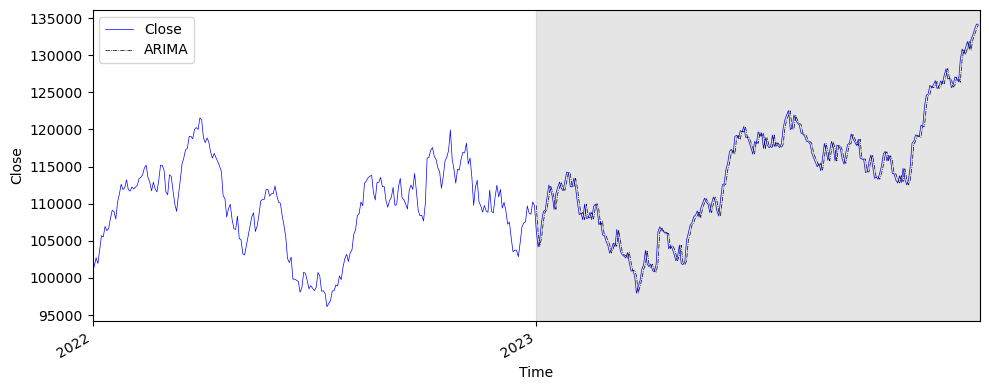

In [88]:
#===============================================================================================================================
# ARIMA: PRICE - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df.loc[testini-testlen:,'Close']  , 'b-' , label='Close', lw=0.5)
#ax.plot(df.loc[testini:,'pred_Last'], 'r-' , label='Last')
#ax.plot(df.loc[testini:,'pred_Mean'], 'm-.', label='Mean')
#ax.plot(df.loc[testini:,'pred_MA']  , 'y:' , label='MA')
#ax.plot(df.loc[testini:,'pred_AR']  , 'g:' , label='AR')
#ax.plot(df.loc[testini:,'pred_ARMA'], 'k-.', label='ARMA', lw=0.5)
ax.plot(df.loc[testini:,'pred_ARIMA'], 'k-.', label='ARIMA', lw=0.5)

ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Close')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini-testlen, totallen)
plt.xticks([ testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [89]:
#===============================================================================================================================
# ARIMA: TRAIN - MODEL
#===============================================================================================================================
model = SARIMAX(trainln, order=(6,1,0), simple_differencing=False)   
model_fit = model.fit(disp=False)

In [90]:
#===============================================================================================================================
# ARIMA: TRAIN - SUMMARY
#===============================================================================================================================
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                CloseLn   No. Observations:                 5695
Model:               SARIMAX(6, 1, 0)   Log Likelihood               14867.626
Date:                Fri, 14 Jun 2024   AIC                         -29721.251
Time:                        11:09:59   BIC                         -29674.721
Sample:                             0   HQIC                        -29705.050
                               - 5695                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0282      0.008     -3.747      0.000      -0.043      -0.013
ar.L2         -0.0031      0.006     -0.489      0.625      -0.015       0.009
ar.L3         -0.0284      0.007     -3.810      0.0

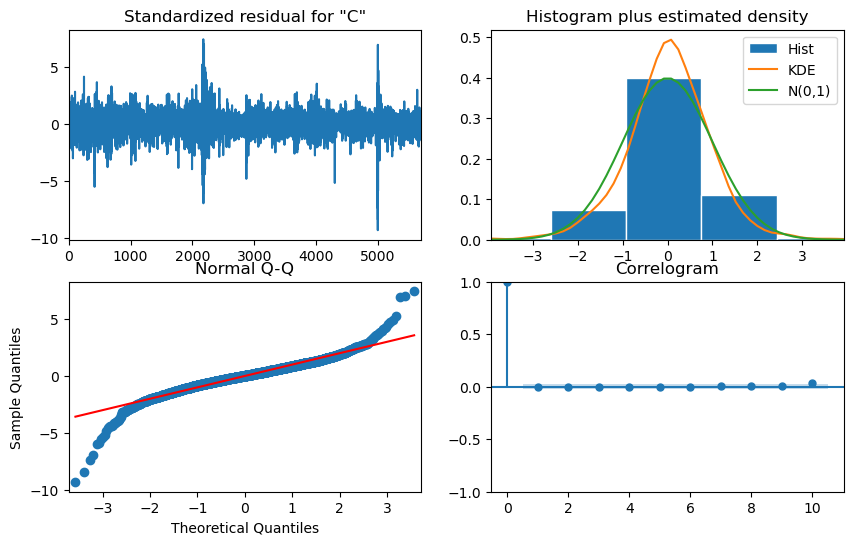

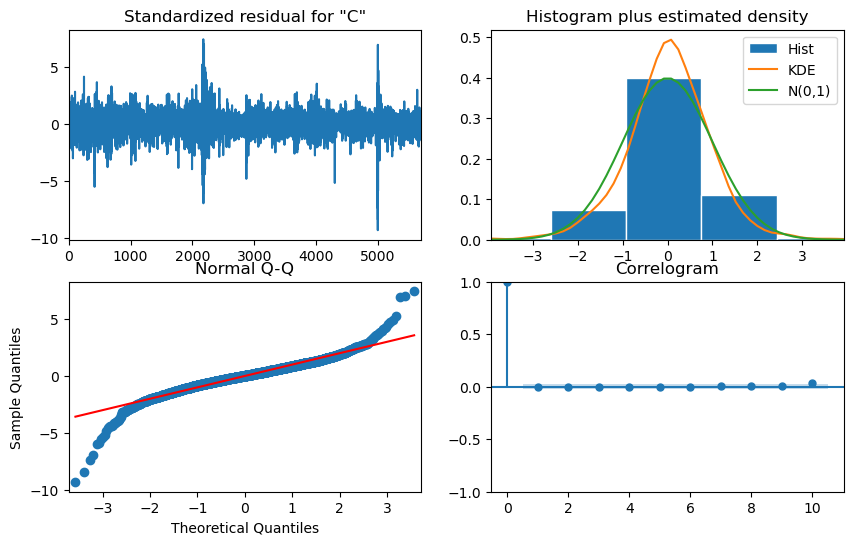

In [96]:
#===============================================================================================================================
# ARIMA: TRAIN - DIAGNOSTICS
#===============================================================================================================================
model_fit.plot_diagnostics(figsize=(10,6))

#-------------------------------------------------------------------------------------------------------------------------------
#
# Residuals: No Trend, but Variance is not constant (discrepancy to white noise).
# Residuals: Distribution fairly close to a Normal distribution.
# Q-Q plot: Line fairly straight => Residuals’ distribution close to a Normal distribution.
# Correlogram: No significant Coefficients after lag 0 => White Noise.
#
#-------------------------------------------------------------------------------------------------------------------------------

In [97]:
#===============================================================================================================================
# ARIMA: TRAIN - RESIDUALS - Ljung-Box test (10 lags)
#===============================================================================================================================
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
residuals = model_fit.resid
sm.stats.acorr_ljungbox(residuals, lags=[11], return_df=True)
#lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))    
#print(pvalue)

#-------------------------------------------------------------------------------------------------------------------------------
# Ljung-Box test
#-------------------------------------------------------------------------------------------------------------------------------
#       lb_stat  lb_pvalue
# --  ---------  ---------
# 11   0.617961   0.999996
#-------------------------------------------------------------------------------------------------------------------------------
#
# pvalue > 0.05 => Residuals Not Correlated
#
#-------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------
# ***** WHITE NOISE => MODEL can be used to Forecast *****
#-------------------------------------------------------------------------------------------------------------------------------

,lb_stat,lb_pvalue
11,0.617961,0.999996


In [98]:
#===============================================================================================================================
# ARIMA: TRAIN - RESULTS
#===============================================================================================================================
#ARIMA_pred = model_fit.get_prediction(testini, totallen).predicted_mean
#dfln['pred_ARIMALn'] = 0
#dfln['pred_ARIMALn'] = ARIMA_pred
#dfln.loc[testini:,'pred_ARIMALn'].to_excel('Data/Output/Rolling-Ln-Daily-ARIMALn.xlsx')
#dfln[testini-1:]


In [99]:
################################################################################################################################
#
# SARIMA
#
################################################################################################################################

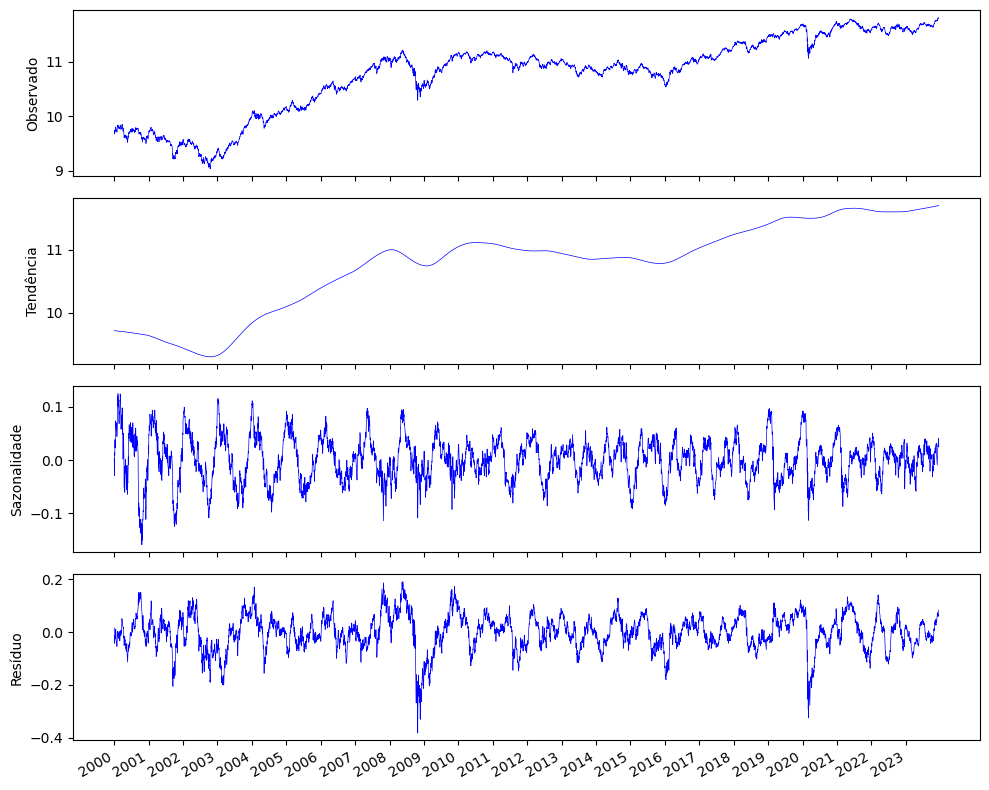

In [106]:
#===============================================================================================================================
# SARIMA: LOG - DECOMPOSITION
#===============================================================================================================================
from statsmodels.tsa.seasonal import STL
decomposition = STL(dfln['CloseLn'], period=247).fit()  

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,8))   
ax1.plot(decomposition.observed, color='b', lw=0.5)
ax1.set_ylabel('Observado')
ax2.plot(decomposition.trend, color='b', lw=0.5)
ax2.set_ylabel('Tendência')
ax3.plot(decomposition.seasonal, color='b', lw=0.5)
ax3.set_ylabel('Sazonalidade')
ax4.plot(decomposition.resid, color='b', lw=0.5)
ax4.set_ylabel('Resíduo')
plt.xticks(np.arange(0, totallen, 248), np.arange(2000, 2024, 1))

fig.autofmt_xdate()
plt.tight_layout()

In [157]:
#===============================================================================================================================
# SARIMA: LOG - STATIONARITY
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ADF test
#-------------------------------------------------------------------------------------------------------------------------------
ad_fuller_result = adfuller(dfln['CloseLn'])
print(f'ADF Statistic: {np.round(ad_fuller_result[0],2)}')
print(f'ADF p-value  : {np.round(ad_fuller_result[1],2)}')

#-------------------------------------------------------------------------------------------------------------------------------
# ADF Statistic: -1.0
# ADF p-value  : 0.75
#
#-------------------------------------------------------------------------------------------------------------------------------
# ***** NON-STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------

ADF Statistic: -1.0
ADF p-value  : 0.75


In [158]:
#===============================================================================================================================
# SARIMA: FUNCTION - optimize_SARIMA
#===============================================================================================================================
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_SARIMA(endog: Union[pd.Series, list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame:   
    
    results = []
    
    for order in tqdm_notebook(order_list):   
        try: 
            model = SARIMAX(
                endog, 
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
    
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df 


In [159]:
#===============================================================================================================================
# SARIMA: PARAMETERS p, d, q ; P, Q, D
#===============================================================================================================================
from itertools import product

ps = range(0, 11, 1)   
qs = range(0, 11, 1)   

#ps = range(0, 7, 1)
#qs = range(0, 8, 1)
Ps = [0]
Qs = [0]
d = 1
D = 0
s = 21

order_list = list(product(ps, qs, Ps, Qs))
len(order_list)

121

In [160]:
#===============================================================================================================================
# SARIMA: LOG - AIC - optimize_SARIMA()
#===============================================================================================================================
#result_df = optimize_SARIMA(trainln, order_list, d, D, s) 
#result_df

#-------------------------------------------------------------------------------------------------------------------------------
# 100% 121/121 [09:37<00:00, 15.69s/it]
#-------------------------------------------------------------------------------------------------------------------------------

#-------------------------------
#           (p,q)            AIC
#-------------------------------
# 0  (6, 0, 0, 0)  -29721.251056
# 1  (0,10, 0, 0)  -29720.501491
# 2  (0, 6, 0, 0)  -29720.113831
# 3  (7, 0, 0, 0)  -29719.570317
# 4  (6, 1, 0, 0)  -29719.206557
#-------------------------------------------------------------------------------------------------------------------------------

In [161]:
#===============================================================================================================================
# SARIMA: LOG - FORECAST
#===============================================================================================================================
ARIMA_model = SARIMAX(trainln, order=(6,1,0), simple_differencing=False)
ARIMA_model_fit = ARIMA_model.fit(disp=False)

In [162]:
#===============================================================================================================================
# SARIMA: LOG - SUMMARY
#===============================================================================================================================
print(ARIMA_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                CloseLn   No. Observations:                 5695
Model:               SARIMAX(6, 1, 0)   Log Likelihood               14867.626
Date:                Tue, 11 Jun 2024   AIC                         -29721.251
Time:                        14:46:03   BIC                         -29674.721
Sample:                             0   HQIC                        -29705.050
                               - 5695                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0282      0.008     -3.747      0.000      -0.043      -0.013
ar.L2         -0.0031      0.006     -0.489      0.625      -0.015       0.009
ar.L3         -0.0284      0.007     -3.810      0.0

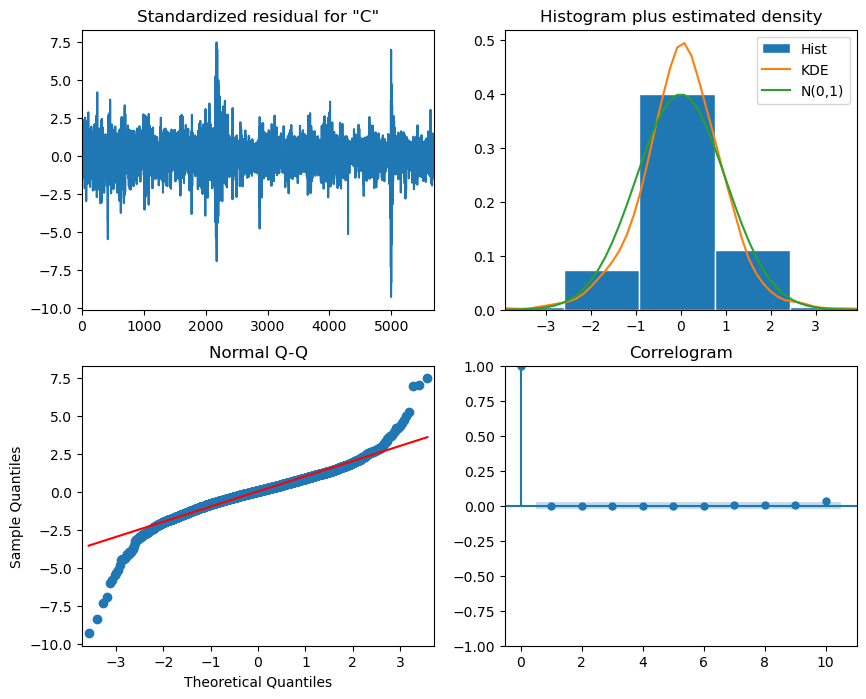

In [163]:
#===============================================================================================================================
# SARIMA: LOG - DIAGNOSTICS
#===============================================================================================================================
ARIMA_model_fit.plot_diagnostics(figsize=(10,8));

#-------------------------------------------------------------------------------------------------------------------------------
#
# Residuals: No Trend, but Variance is not Constant (discrepancy to White Noise).
# Residuals: Distribution fairly close to a Normal distribution.
# Q-Q plot: Line fairly straight => distribution of Residuals close to a Normal distribution.
# Correlogram: No significant Coefficients after lag 0 => white noise.
#
# ***** WHITE NOISE *****
#-------------------------------------------------------------------------------------------------------------------------------

In [164]:
#===============================================================================================================================
# SARIMA: LOG - RESIDUALS - LJUNG-BOX test
#===============================================================================================================================
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
#residuals = model_fit.resid
residuals = ARIMA_model_fit.resid
sm.stats.acorr_ljungbox(residuals, lags=[11], return_df=True)
#lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

#-------------------------------------------------------------------------------------------------------------------------------
#
#--------------------------
#        lb_stat  lb_pvalue
#--------------------------
#  11   0.617961   0.999996
#
#-------------------------------------------------------------------------------------------------------------------------------
#
# LJUNG-BOX test: pvalue > 0.05 => Residuals are Not Correlated.
#
#-------------------------------------------------------------------------------------------------------------------------------

#-------------------------------------------------------------------------------------------------------------------------------
# ***** WHITE NOISE => model can be used to Forecast *****
#-------------------------------------------------------------------------------------------------------------------------------

,lb_stat,lb_pvalue
11,0.617961,0.999996


In [165]:
#===============================================================================================================================
# SARIMA: LOG - RESULTS
#===============================================================================================================================
SARIMA_pred = ARIMA_model_fit.get_prediction(testini, totallen).predicted_mean
dfln['pred_SARIMALn'] = SARIMA_pred  
dfln.loc[testini:,'pred_SARIMALn'].to_excel('Data/Output/Rolling-Ln-Daily-SARIMALn.xlsx')
dfln.loc[testini:, ['Date','CloseLn', 'pred_ARIMALn', 'pred_SARIMALn']]
#dfln.loc[testini-1:]

,Date,CloseLn,pred_ARIMALn,pred_SARIMALn
5695,2023-01-02,11.574735,11.606108,11.606108
5696,2023-01-03,11.553739,11.574407,11.604894
5697,2023-01-04,11.564896,11.554687,11.605185
5698,2023-01-05,11.586560,11.565729,11.605359
5699,2023-01-06,11.598770,11.586332,11.604772
...,...,...,...,...
5938,2023-12-21,11.791935,11.780607,11.605002
5939,2023-12-22,11.796245,11.790997,11.605002
5940,2023-12-26,11.802103,11.796467,11.605002
5941,2023-12-27,11.807040,11.801486,11.605002


In [166]:
#===============================================================================================================================
# SARIMA: LOG - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'  ])
mse_Mean   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'  ])
mse_MA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'    ])
mse_AR     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'    ])
mse_ARMA   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn'  ])
mse_ARIMA  = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMALn' ])
mse_SARIMA = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMALn'])

data_metrics = [['Last'  , "{:,}".format(round(mse_Last,8 ))  , "{:,}".format(round(sqrt(mse_Last)  ,8))] ,
                ['Mean'  , "{:,}".format(round(mse_Mean,8 ))  , "{:,}".format(round(sqrt(mse_Mean)  ,8))] ,
                ['MA'    , "{:,}".format(round(mse_MA  ,8 ))  , "{:,}".format(round(sqrt(mse_MA)    ,8))] ,
                ['AR'    , "{:,}".format(round(mse_AR  ,8 ))  , "{:,}".format(round(sqrt(mse_AR)    ,8))] ,
                ['ARMA'  , "{:,}".format(round(mse_ARMA,8 ))  , "{:,}".format(round(sqrt(mse_ARMA)  ,8))] ,
                ['ARIMA' , "{:,}".format(round(mse_ARIMA,8))  , "{:,}".format(round(sqrt(mse_ARIMA) ,8))] ,
                ['SARIMA', "{:,}".format(round(mse_SARIMA,8)) , "{:,}".format(round(sqrt(mse_SARIMA),8))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Log          MSE        RMSE
#--------------------------------
# 0  Last  0.00011731  0.01083083
# 1  Mean  0.80500390  0.89722010
# 2  MA    0.00011758  0.01084329
# 3  AR    0.00011792  0.01085896
# 4  ARMA  0.00011754  0.01084139
# 5  ARIMA 0.00620595  0.07877786
# 6 SARIMA 0.01142979  0.10691020
#-------------------------------------------------------------------------------------------------------------------------------


,Log,MSE,RMSE
0,Last,0.00011731,0.01083083
1,Mean,0.8050039,0.8972201
2,MA,0.00011789,0.01085768
3,AR,0.00011792,0.01085896
4,ARMA,0.00011754,0.01084139
5,ARIMA,0.00011751,0.01084033
6,SARIMA,0.00620595,0.07877786


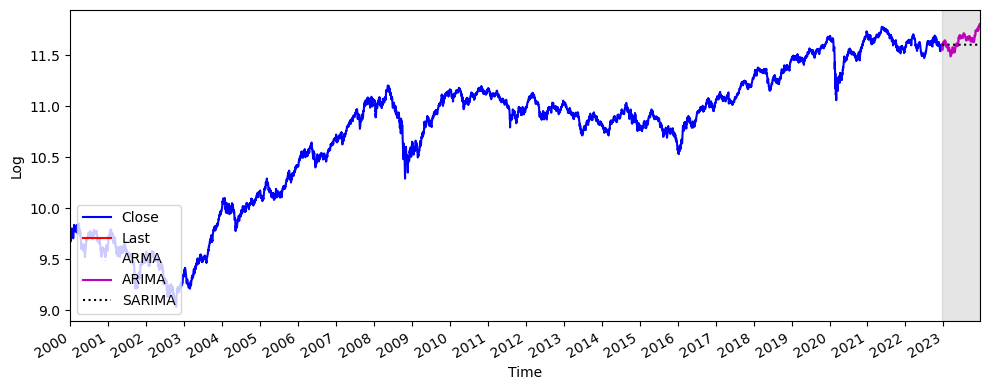

In [167]:
#===============================================================================================================================
# SARIMA: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[:,'CloseLn']             , 'b-', label='Close')    
ax.plot(dfln.loc[testini:,'pred_LastLn']  , 'r-', label='Last')
ax.plot(dfln.loc[testini:,'pred_ARMALn']  , 'w-', label='ARMA')   
ax.plot(dfln.loc[testini:,'pred_ARIMALn'] , 'm-', label='ARIMA')   
ax.plot(dfln.loc[testini:,'pred_SARIMALn'], 'k:', label='SARIMA')   
ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

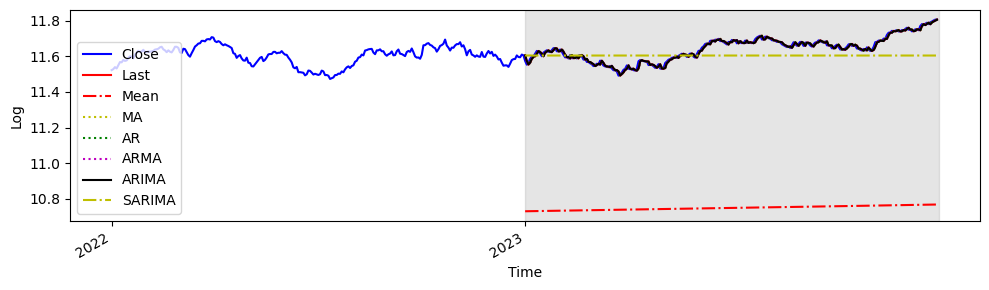

In [168]:
#===============================================================================================================================
# SARIMA: LOG - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(dfln.loc[testini-testlen:,'CloseLn'] , 'b-' , label='Close' )
ax.plot(dfln.loc[testini:,'pred_LastLn']     , 'r-' , label='Last'  )
ax.plot(dfln.loc[testini:,'pred_MeanLn']     , 'r-.', label='Mean'  )
ax.plot(dfln.loc[testini:,'pred_MALn']       , 'y:' , label='MA'    )
ax.plot(dfln.loc[testini:,'pred_ARLn']       , 'g:' , label='AR'    )
ax.plot(dfln.loc[testini:,'pred_ARMALn']     , 'm:' , label='ARMA'  )
ax.plot(dfln.loc[testini:,'pred_ARIMALn']    , 'k-' , label='ARIMA' )
ax.plot(dfln.loc[testini:,'pred_SARIMALn']   , 'y-.', label='SARIMA')

ax.legend(loc=3)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
plt.xticks([ testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()


In [169]:
################################################################################################################################
#
# SARIMA SEASONAL
#
################################################################################################################################


In [170]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - STATIONARITY
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ADF test
#-------------------------------------------------------------------------------------------------------------------------------
ADF_SARIMAS = adfuller(dfln['CloseLn'])
print(f'ADF Statistic: {np.round(ADF_SARIMAS[0],2)}')
print(f'ADF p-value  : {np.round(ADF_SARIMAS[1],2)}')

#-------------------------------------------------------------------------------------------------------------------------------
# ADF Statistic: -1.0
# ADF p-value  : 0.75
#
#-------------------------------------------------------------------------------------------------------------------------------
# ***** NON-STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------

ADF Statistic: -1.0
ADF p-value  : 0.75


In [171]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG-DIFF - STATIONARITY
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ADF test
#-------------------------------------------------------------------------------------------------------------------------------
ADF_SARIMAS = adfuller(dfln['CloseLnDiff'])
print(f'ADF Statistic: {np.round(ADF_SARIMAS [0],2)}')
print(f'ADF p-value  : {np.round(ADF_SARIMAS [1],2)}')

#-------------------------------------------------------------------------------------------------------------------------------
# ADF Statistic: -16.89
# ADF p-value  : 0.0
#
#-------------------------------------------------------------------------------------------------------------------------------
# ***** STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------

ADF Statistic: -16.89
ADF p-value  : 0.0


In [172]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG-DIFF-SEASONAL - STATIONARITY
#===============================================================================================================================
#-------------------------------------------------------------------------------------------------------------------------------
# ADF test
#-------------------------------------------------------------------------------------------------------------------------------
dflndiffseasonal = dfln['CloseLn'].diff(periods=12)
ADF_SARIMAS = adfuller(dflndiffseasonal[12:])
print(f'ADF Statistic: {np.round(ADF_SARIMAS[0],2)}')
print(f'ADF p-value  : {np.round(ADF_SARIMAS[1],2)}')

#-------------------------------------------------------------------------------------------------------------------------------
# ADF Statistic: -12.9
# ADF p-value  : 0.0
#
#-------------------------------------------------------------------------------------------------------------------------------
# ***** STATIONARY *****
#-------------------------------------------------------------------------------------------------------------------------------

ADF Statistic: -12.9
ADF p-value  : 0.0


In [173]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - TRAIN SET
#===============================================================================================================================
trainln

0        9.736867
1        9.670988
2        9.695549
3        9.687002
4        9.699482
          ...    
5690    11.605482
5691    11.596694
5692    11.595226
5693    11.610385
5694    11.605820
Name: CloseLn, Length: 5695, dtype: float64

In [174]:
#===============================================================================================================================
# SARIMA SEASONAL: PARAMETERS p, d, q ; P, Q, D
#===============================================================================================================================
ps = range(0, 4, 1)    
qs = range(0, 3, 1)
Ps = range(0, 4, 1)
Qs = range(0, 4, 1)

d = 1
D = 1
s = 21
order_list = list(product(ps, qs, Ps, Qs))
print(len(order_list))

192


In [175]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - AIC optimize_SARIMA()
#===============================================================================================================================
#result_df = optimize_SARIMA(trainln, order_list, d, D, s) 
#result_df

#-------------------------------------------------------------------------------------------------------------------------------
# ps = range(0, 4, 1)    
# qs = range(0, 3, 1)
# Ps = range(0, 4, 1)
# Qs = range(0, 4, 1)
# 
d = 1
D = 1
s = 21
#-------------------------------------------------------------------------------------------------------------------------------
# 100% 48/48 [36:39<00:00, 111.83s/it]
#-------------------------------------------------------------------------------------------------------------------------------
#    (p, q, P, Q)           AIC
# -- ------------- --------------
# 0  (0, 2, 1, 1)  94646.816811
# 1  (2, 0, 1, 1)  94646.922782
# 2  (1, 0, 1, 1)  94647.810345
# 3  (3, 0, 1, 1)  94648.856431
# 4  (0, 2, 0, 1)  94649.546759
# 5  (0, 1, 1, 1)  94649.557991
#--------------------------------
# Old
# 0  (2, 2, 1, 1)   2112.846797
# 1  (3, 1, 1, 1)  94742.017364
# 2  (2, 1, 0, 1)  94744.227821
# 3  (0, 2, 0, 1)  94744.450239
# 4  (2, 0, 0, 1)  94744.479125
#-------------------------------------------------------------------------------------------------------------------------------

In [176]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - FORECAST
#===============================================================================================================================

SARIMA_model = SARIMAX(trainln, order=(0,d,2), seasonal_order=(1,D,1,s), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)

# Process time: 2" 

In [177]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - SUMMARY
#===============================================================================================================================
print(SARIMA_model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                              CloseLn   No. Observations:                 5695
Model:             SARIMAX(0, 1, 2)x(1, 1, [1], 21)   Log Likelihood               14747.247
Date:                              Tue, 11 Jun 2024   AIC                         -29484.495
Time:                                      14:47:31   BIC                         -29451.277
Sample:                                           0   HQIC                        -29472.927
                                             - 5695                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0294      0.007     -4.021      0.000      -0.044      -0.015
ma.L2         -0.00

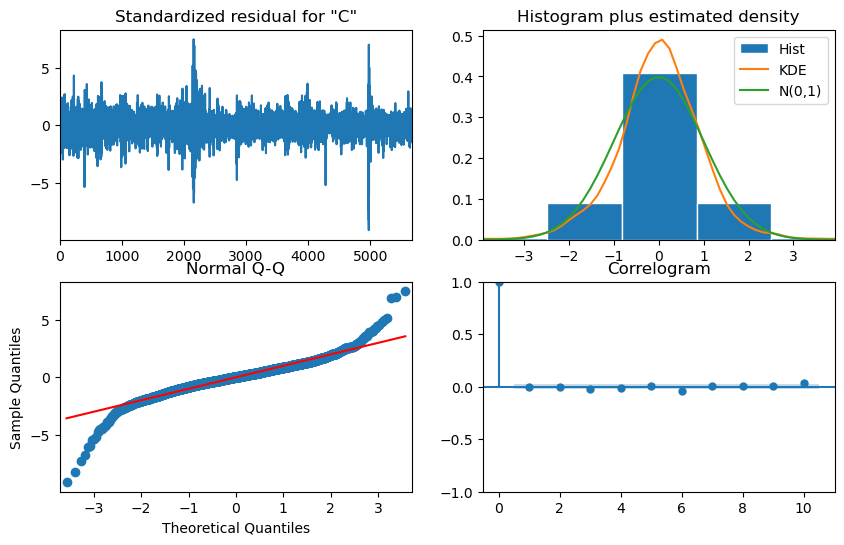

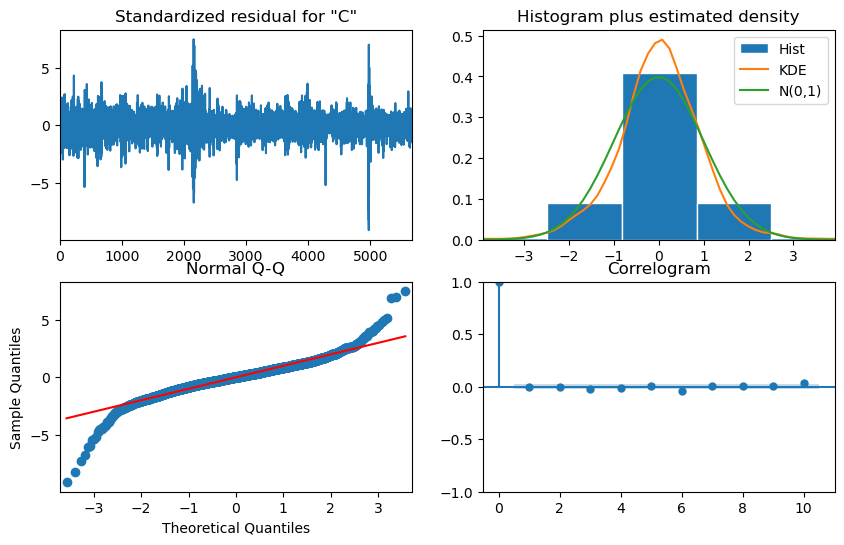

In [178]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - DIAGNOSTICS
#===============================================================================================================================
SARIMA_model_fit.plot_diagnostics(figsize=(10,6))


In [179]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - LJUNG-BOX test
#===============================================================================================================================
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
residuals = SARIMA_model_fit.resid
sm.stats.acorr_ljungbox(residuals, lags=[20], return_df=True)

#-------------------------------------------------------------------------------------------------------------------------------
#      lb_stat  lb_pvalue
#------------------------
# 20  1.535884        1.0
#
#-------------------------------------------------------------------------------------------------------------------------------
# p-values > 0.78 => Null Hypothesis Not Rejected => Residuals Independent, Residuals Not Correlated
#-------------------------------------------------------------------------------------------------------------------------------
# ****** WHITE NOISE RESIDUALS ******
#-------------------------------------------------------------------------------------------------------------------------------

,lb_stat,lb_pvalue
20,1.535884,1.0


In [180]:
SARIMA_model_fit.get_prediction(testini, totallen).predicted_mean

5695    11.605665
5696    11.604714
5697    11.606888
5698    11.608003
5699    11.607930
          ...    
5939    11.687099
5940    11.688017
5941    11.686567
5942    11.686758
5943    11.687397
Name: predicted_mean, Length: 249, dtype: float64

In [181]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - FORECAST
#===============================================================================================================================
SARIMAS_pred = SARIMA_model_fit.get_prediction(testini, totallen).predicted_mean
dfln['pred_SARIMASLn'] = SARIMAS_pred
dfln.loc[testini:,'pred_SARIMASLn'].to_excel('Data/Output/Rolling-Ln-Daily-SARIMASLn.xlsx')
dfln.loc[testini-1:, ['Date', 'CloseLn', 'pred_ARIMALn', 'pred_SARIMALn' , 'pred_SARIMASLn']]


,Date,CloseLn,pred_ARIMALn,pred_SARIMALn,pred_SARIMASLn
5694,2022-12-29,11.605820,0.000000,NaN,NaN
5695,2023-01-02,11.574735,11.606108,11.606108,11.605665
5696,2023-01-03,11.553739,11.574407,11.604894,11.604714
5697,2023-01-04,11.564896,11.554687,11.605185,11.606888
5698,2023-01-05,11.586560,11.565729,11.605359,11.608003
...,...,...,...,...,...
5938,2023-12-21,11.791935,11.780607,11.605002,11.687828
5939,2023-12-22,11.796245,11.790997,11.605002,11.687099
5940,2023-12-26,11.802103,11.796467,11.605002,11.688017
5941,2023-12-27,11.807040,11.801486,11.605002,11.686567


In [182]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - PERFORMANCE
#===============================================================================================================================
from sklearn.metrics import mean_squared_error
from math import sqrt

mse_Last     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'    ])
mse_Mean     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'    ])
mse_MA       = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'      ])
mse_AR       = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'      ])
mse_ARMA     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn'    ])
mse_ARIMA    = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMALn'   ])
mse_SARIMA   = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMALn'  ])
mse_SARIMAS  = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMASLn' ])

data_metrics = [['Last'    , "{:,}".format(round(mse_Last  ,6))  , "{:,}".format(round(sqrt(mse_Last)    ,6))] ,
                ['Mean'    , "{:,}".format(round(mse_Mean  ,6))  , "{:,}".format(round(sqrt(mse_Mean)    ,6))] ,
                ['MA'      , "{:,}".format(round(mse_MA    ,6))  , "{:,}".format(round(sqrt(mse_MA)      ,6))] ,
                ['AR'      , "{:,}".format(round(mse_AR    ,6))  , "{:,}".format(round(sqrt(mse_AR)      ,6))] ,
                ['ARMA'    , "{:,}".format(round(mse_ARMA  ,6))  , "{:,}".format(round(sqrt(mse_ARMA)    ,6))] ,
                ['ARIMA'   , "{:,}".format(round(mse_ARIMA ,6))  , "{:,}".format(round(sqrt(mse_ARIMA)   ,6))] ,
                ['SARIMA'  , "{:,}".format(round(mse_SARIMA,6))  , "{:,}".format(round(sqrt(mse_SARIMA)  ,6))] ,
                ['SARIMAS' , "{:,}".format(round(mse_SARIMAS,6)) , "{:,}".format(round(sqrt(mse_SARIMAS),6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Model', 'MSE', 'RMSE'])

#row_new = {'Model':'ARIMA', 'MSE':round(mse_ARIMA,4), 'RMSE':round(sqrt(mse_ARIMA),4) }
#data_metrics = data_metrics.append(row_new, ignore_index=True)

df_metrics
#-------------------------------------------------------------------------------------------------------------------------------
#  Model         MSE      RMSE
#-------------------------------------------------------------------------------------------------------------------------------
# 0  Last     0.000117  0.010831
# 1  Mean     0.805004  0.897220
# 2  MA       0.000118  0.010843
# 3  AR       0.000118  0.010859
# 4  ARMA     0.000118  0.010841
# 5  ARIMA    0.006206  0.078778
# 6  SARIMA   0.011430  0.106910
# 7  SARIMAS  0.002782  0.052747
#-------------------------------------------------------------------------------------------------------------------------------

,Model,MSE,RMSE
0,Last,0.000117,0.010831
1,Mean,0.805004,0.89722
2,MA,0.000118,0.010858
3,AR,0.000118,0.010859
4,ARMA,0.000118,0.010841
5,ARIMA,0.000118,0.01084
6,SARIMA,0.006206,0.078778
7,SARIMAS,0.002782,0.052747


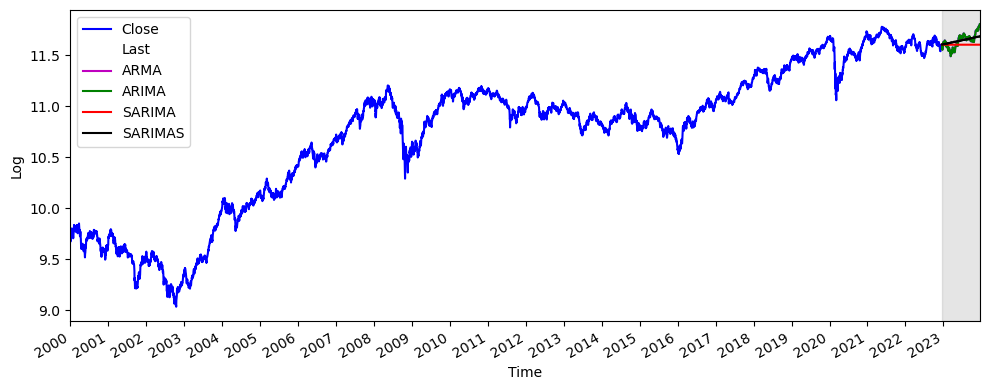

In [183]:
#===============================================================================================================================
# SARIMA SEASONAL: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[ :      ,'CloseLn']        , 'b-', label='Close')    
ax.plot(dfln.loc[testini:,'pred_LastLn']    , 'w-', label='Last')
ax.plot(dfln.loc[testini:,'pred_ARMALn']    , 'm-', label='ARMA')   
ax.plot(dfln.loc[testini:,'pred_ARIMALn']   , 'g-', label='ARIMA')   
ax.plot(dfln.loc[testini:,'pred_SARIMALn']  , 'r-', label='SARIMA')   
ax.plot(dfln.loc[testini:,'pred_SARIMASLn'] , 'k-', label='SARIMAS')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

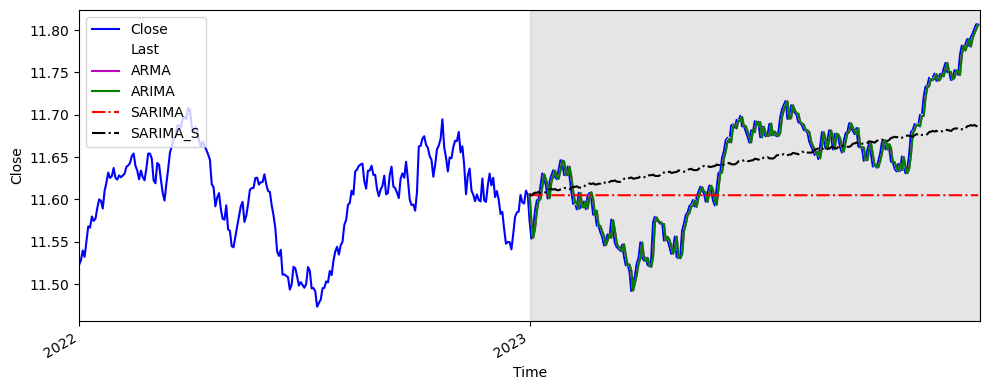

In [184]:
#===============================================================================================================================
# SARIMA SEASONAL: PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[testini-testlen:,'CloseLn']  , 'b-', label='Close')    
ax.plot(dfln.loc[testini:  ,'pred_LastLn']    , 'w-', label='Last')
ax.plot(dfln.loc[testini:  ,'pred_ARMALn']    , 'm-', label='ARMA')   
ax.plot(dfln.loc[testini:  ,'pred_ARIMALn']   , 'g-', label='ARIMA')   
ax.plot(dfln.loc[testini:  ,'pred_SARIMALn']  , 'r-.', label='SARIMA')   
ax.plot(dfln.loc[testini:  ,'pred_SARIMASLn'] , 'k-.', label='SARIMA_S')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Close')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini-testlen, totallen)
plt.xticks([ testini-testlen, testini ], [ 2022           , 2023])
fig.autofmt_xdate()
plt.tight_layout()

In [185]:
################################################################################################################################
################################################################################################################################
#
# ROLLING ARIMA
#
################################################################################################################################
################################################################################################################################


In [186]:
#===============================================================================================================================
# ROLLING ARIMA: LIBRARIES
#===============================================================================================================================
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot

#===============================================================================================================================
# ROLLING ARIMA: LOG - LISTS
#===============================================================================================================================
CloseList = dfln['CloseLn'].values
CloseTrain, CloseTest = CloseList[0:trainlen], CloseList[testini:]
HistTrain = [x for x in CloseTrain]
PredTest = list()

In [187]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - AUTOARIMA - AIC (Akaike)
#===============================================================================================================================
import pandas as pd
import pmdarima as pmd

results = pmd.auto_arima(dfln['CloseLn'],
                         start_p=0,  # initial guess for AR(p)
                         start_d=0,  # initial guess for I(d)
                         start_q=0,  # initial guess for MA(q)
                         max_p=12,   # max guess for AR(p)
                         max_d=1,    # max guess for I(d)
                         max_q=12,   # max guess for MA(q)
                         trend='c',
                         information_criterion='aic',
                         trace=True,
                         error_action='ignore'
                         )

#-------------------------------------------------------------------------------------------------------------------------------
# AIC
#-------------------------------------------------------------------------------------------------------------------------------
# Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
# Total fit time: 16.514 seconds
#-------------------------------------------------------------------------------------------------------------------------------

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-31166.880, Time=1.29 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-31169.576, Time=1.48 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-31169.602, Time=0.65 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-31166.880, Time=0.80 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-31168.050, Time=2.86 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-31167.687, Time=2.90 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-31166.833, Time=5.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-31169.602, Time=0.68 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 15.695 seconds


In [188]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - AUTOARIMA - BIC (Bayes)
#===============================================================================================================================
results = pmd.auto_arima(dfln['CloseLn'],
                         start_p=0,  # initial guess for AR(p)
                         start_d=0,  # initial guess for I(d)
                         start_q=0,  # initial guess for MA(q)
                         max_p=12,    # max guess for AR(p)
                         max_d=1,    # max guess for I(d)
                         max_q=12,    # max guess for MA(q)
                         trend='c',
                         information_criterion='bic',
                         trace=True,
                         error_action='ignore'
                         )

#-------------------------------------------------------------------------------------------------------------------------------
# BIC
#-------------------------------------------------------------------------------------------------------------------------------
# Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
# Total fit time: 3.963 seconds
#-------------------------------------------------------------------------------------------------------------------------------

Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : BIC=-31153.500, Time=0.72 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : BIC=-31149.506, Time=1.56 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : BIC=-31149.532, Time=0.75 sec
 ARIMA(0,1,0)(0,0,0)[0]             : BIC=-31153.500, Time=1.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : BIC=-31141.291, Time=3.76 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 7.880 seconds


In [189]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - FORECAST
#===============================================================================================================================
for t in range(testlen):
    # AIC - AKAIKE
    ARIMA_ROLL_model = SARIMAX(HistTrain, order=(0,1,1), simple_differencing=False)
    # BIC - BAYES
    #ARIMA_ROLL_model = SARIMAX(HistTrain, order=(0,1,0), simple_differencing=False)
    ARIMA_ROLL_model_fit = ARIMA_ROLL_model.fit(disp=False)

    output = ARIMA_ROLL_model_fit.forecast()
    yhat = output[0]
    PredTest.append(yhat)
    yobs = CloseTest[t]
    HistTrain.append(yobs)
    print('t = %d, Estimation = %f, Observed = %f' % (t, yhat, yobs))
    dfln.loc[trainlen+t,'pred_ARIMARLn'] = yhat
    

t = 0, Estimation = 11.605938, Observed = 11.574735
t = 1, Estimation = 11.575623, Observed = 11.553739
t = 2, Estimation = 11.554352, Observed = 11.564896
t = 3, Estimation = 11.564599, Observed = 11.586560
t = 4, Estimation = 11.585944, Observed = 11.598770


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 5, Estimation = 11.598412, Observed = 11.600291
t = 6, Estimation = 11.600239, Observed = 11.615633


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 7, Estimation = 11.615204, Observed = 11.630860
t = 8, Estimation = 11.630426, Observed = 11.624916


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 9, Estimation = 11.625069, Observed = 11.616529
t = 10, Estimation = 11.616766, Observed = 11.601052
t = 11, Estimation = 11.601487, Observed = 11.621234


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 12, Estimation = 11.620684, Observed = 11.628291
t = 13, Estimation = 11.628080, Observed = 11.634452
t = 14, Estimation = 11.634275, Observed = 11.626617
t = 15, Estimation = 11.626830, Observed = 11.623906
t = 16, Estimation = 11.623987, Observed = 11.635392
t = 17, Estimation = 11.635075, Observed = 11.646320


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 18, Estimation = 11.646008, Observed = 11.645510
t = 19, Estimation = 11.645524, Observed = 11.629073
t = 20, Estimation = 11.629529, Observed = 11.628689
t = 21, Estimation = 11.628712, Observed = 11.638946
t = 22, Estimation = 11.638662, Observed = 11.626911
t = 23, Estimation = 11.627237, Observed = 11.609513


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 24, Estimation = 11.610004, Observed = 11.594722
t = 25, Estimation = 11.595142, Observed = 11.596546
t = 26, Estimation = 11.596507, Observed = 11.588309
t = 27, Estimation = 11.588534, Observed = 11.607795
t = 28, Estimation = 11.607263, Observed = 11.589961
t = 29, Estimation = 11.590442, Observed = 11.590611
t = 30, Estimation = 11.590606, Observed = 11.597602


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 31, Estimation = 11.597407, Observed = 11.588486


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 32, Estimation = 11.588734, Observed = 11.604594
t = 33, Estimation = 11.604151, Observed = 11.607703
t = 34, Estimation = 11.607604, Observed = 11.600725
t = 35, Estimation = 11.600917, Observed = 11.582004
t = 36, Estimation = 11.582531, Observed = 11.586110
t = 37, Estimation = 11.586010, Observed = 11.569291
t = 38, Estimation = 11.569757, Observed = 11.568465
t = 39, Estimation = 11.568501, Observed = 11.561067
t = 40, Estimation = 11.561274, Observed = 11.555838
t = 41, Estimation = 11.555990, Observed = 11.545641
t = 42, Estimation = 11.545928, Observed = 11.550857


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 43, Estimation = 11.550720, Observed = 11.558857
t = 44, Estimation = 11.558631, Observed = 11.554335
t = 45, Estimation = 11.554455, Observed = 11.576279
t = 46, Estimation = 11.575670, Observed = 11.562393
t = 47, Estimation = 11.562766, Observed = 11.548468
t = 48, Estimation = 11.548868, Observed = 11.543662
t = 49, Estimation = 11.543807, Observed = 11.541828


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 50, Estimation = 11.541883, Observed = 11.539328


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 51, Estimation = 11.539400, Observed = 11.546695
t = 52, Estimation = 11.546492, Observed = 11.532547
t = 53, Estimation = 11.532937, Observed = 11.522112
t = 54, Estimation = 11.522414, Observed = 11.522857
t = 55, Estimation = 11.522845, Observed = 11.515129


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 56, Estimation = 11.515345, Observed = 11.491971
t = 57, Estimation = 11.492621, Observed = 11.501149
t = 58, Estimation = 11.500911, Observed = 11.509625
t = 59, Estimation = 11.509382, Observed = 11.524707
t = 60, Estimation = 11.524281, Observed = 11.530692
t = 61, Estimation = 11.530514, Observed = 11.549387
t = 62, Estimation = 11.548865, Observed = 11.531573
t = 63, Estimation = 11.532054, Observed = 11.527875
t = 64, Estimation = 11.527991, Observed = 11.531447
t = 65, Estimation = 11.531351, Observed = 11.522656
t = 66, Estimation = 11.522898, Observed = 11.521109
t = 67, Estimation = 11.521159, Observed = 11.531223
t = 68, Estimation = 11.530943, Observed = 11.573209
t = 69, Estimation = 11.572042, Observed = 11.579553
t = 70, Estimation = 11.579347, Observed = 11.575504
t = 71, Estimation = 11.575610, Observed = 11.573826
t = 72, Estimation = 11.573875, Observed = 11.571342
t = 73, Estimation = 11.571412, Observed = 11.572733
t = 74, Estimation = 11.572697, Observed = 11.

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 76, Estimation = 11.555563, Observed = 11.551632


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 77, Estimation = 11.551741, Observed = 11.544619
t = 78, Estimation = 11.544815, Observed = 11.535783
t = 79, Estimation = 11.536031, Observed = 11.541739
t = 80, Estimation = 11.541583, Observed = 11.556288
t = 81, Estimation = 11.555884, Observed = 11.532012
t = 82, Estimation = 11.532671, Observed = 11.530737
t = 83, Estimation = 11.530790, Observed = 11.534436
t = 84, Estimation = 11.534335, Observed = 11.563129
t = 85, Estimation = 11.562335, Observed = 11.571592


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 86, Estimation = 11.571338, Observed = 11.581646
t = 87, Estimation = 11.581364, Observed = 11.584764
t = 88, Estimation = 11.584671, Observed = 11.592258
t = 89, Estimation = 11.592051, Observed = 11.594172
t = 90, Estimation = 11.594114, Observed = 11.599370
t = 91, Estimation = 11.599227, Observed = 11.591678


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 92, Estimation = 11.591885, Observed = 11.603314
t = 93, Estimation = 11.603001, Observed = 11.609221


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 94, Estimation = 11.609051, Observed = 11.614981
t = 95, Estimation = 11.614819, Observed = 11.610171
t = 96, Estimation = 11.610298, Observed = 11.607586
t = 97, Estimation = 11.607660, Observed = 11.597262
t = 98, Estimation = 11.597546, Observed = 11.608730
t = 99, Estimation = 11.608424, Observed = 11.616434
t = 100, Estimation = 11.616215, Observed = 11.611262
t = 101, Estimation = 11.611397, Observed = 11.598801
t = 102, Estimation = 11.599145, Observed = 11.592984
t = 103, Estimation = 11.593152, Observed = 11.613356
t = 104, Estimation = 11.612803, Observed = 11.631225
t = 105, Estimation = 11.630725, Observed = 11.632452
t = 106, Estimation = 11.632405, Observed = 11.649291
t = 107, Estimation = 11.648834, Observed = 11.656923
t = 108, Estimation = 11.656705, Observed = 11.670096
t = 109, Estimation = 11.669735, Observed = 11.672800


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 110, Estimation = 11.672717, Observed = 11.667728
t = 111, Estimation = 11.667862, Observed = 11.687457
t = 112, Estimation = 11.686927, Observed = 11.688734
t = 113, Estimation = 11.688685, Observed = 11.684847
t = 114, Estimation = 11.684950, Observed = 11.694061
t = 115, Estimation = 11.693815, Observed = 11.692095
t = 116, Estimation = 11.692142, Observed = 11.698743
t = 117, Estimation = 11.698565, Observed = 11.686326


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 118, Estimation = 11.686657, Observed = 11.686686


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 119, Estimation = 11.686686, Observed = 11.680497
t = 120, Estimation = 11.680664, Observed = 11.674388
t = 121, Estimation = 11.674558, Observed = 11.667202
t = 122, Estimation = 11.667400, Observed = 11.681677
t = 123, Estimation = 11.681291, Observed = 11.679177
t = 124, Estimation = 11.679234, Observed = 11.692516
t = 125, Estimation = 11.692156, Observed = 11.687520
t = 126, Estimation = 11.687646, Observed = 11.691483
t = 127, Estimation = 11.691379, Observed = 11.673561


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 128, Estimation = 11.674045, Observed = 11.686021
t = 129, Estimation = 11.685694, Observed = 11.677952
t = 130, Estimation = 11.678164, Observed = 11.674666


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 131, Estimation = 11.674762, Observed = 11.675610
t = 132, Estimation = 11.675586, Observed = 11.689094
t = 133, Estimation = 11.688725, Observed = 11.675984
t = 134, Estimation = 11.676333, Observed = 11.680298
t = 135, Estimation = 11.680189, Observed = 11.677093
t = 136, Estimation = 11.677178, Observed = 11.674637
t = 137, Estimation = 11.674706, Observed = 11.679142
t = 138, Estimation = 11.679020, Observed = 11.697052
t = 139, Estimation = 11.696557, Observed = 11.706366
t = 140, Estimation = 11.706098, Observed = 11.711840
t = 141, Estimation = 11.711683, Observed = 11.716359
t = 142, Estimation = 11.716232, Observed = 11.695161
t = 143, Estimation = 11.695736, Observed = 11.696805
t = 144, Estimation = 11.696776, Observed = 11.711309
t = 145, Estimation = 11.710912, Observed = 11.705597
t = 146, Estimation = 11.705742, Observed = 11.702378


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 147, Estimation = 11.702470, Observed = 11.700117


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 148, Estimation = 11.700181, Observed = 11.691136
t = 149, Estimation = 11.691383, Observed = 11.690063
t = 150, Estimation = 11.690099, Observed = 11.687637


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 151, Estimation = 11.687704, Observed = 11.681898
t = 152, Estimation = 11.682057, Observed = 11.681398
t = 153, Estimation = 11.681416, Observed = 11.678992
t = 154, Estimation = 11.679058, Observed = 11.668300


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 155, Estimation = 11.668594, Observed = 11.662822
t = 156, Estimation = 11.662980, Observed = 11.657818
t = 157, Estimation = 11.657959, Observed = 11.652533


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 158, Estimation = 11.652681, Observed = 11.656233
t = 159, Estimation = 11.656137, Observed = 11.647713
t = 160, Estimation = 11.647943, Observed = 11.662689
t = 161, Estimation = 11.662286, Observed = 11.679580
t = 162, Estimation = 11.679109, Observed = 11.670148
t = 163, Estimation = 11.670393, Observed = 11.659941
t = 164, Estimation = 11.660226, Observed = 11.670963
t = 165, Estimation = 11.670670, Observed = 11.681854
t = 166, Estimation = 11.681550, Observed = 11.674492
t = 167, Estimation = 11.674685, Observed = 11.659117


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 168, Estimation = 11.659541, Observed = 11.677532
t = 169, Estimation = 11.677040, Observed = 11.676545
t = 170, Estimation = 11.676559, Observed = 11.672757
t = 171, Estimation = 11.672861, Observed = 11.661219


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 172, Estimation = 11.661538, Observed = 11.655409
t = 173, Estimation = 11.655576, Observed = 11.668932
t = 174, Estimation = 11.668566, Observed = 11.678170
t = 175, Estimation = 11.677908, Observed = 11.679930


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 176, Estimation = 11.679875, Observed = 11.690164
t = 177, Estimation = 11.689883, Observed = 11.684839


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 178, Estimation = 11.684977, Observed = 11.680879
t = 179, Estimation = 11.680991, Observed = 11.677132


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 180, Estimation = 11.677237, Observed = 11.684315


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 181, Estimation = 11.684122, Observed = 11.662595
t = 182, Estimation = 11.663185, Observed = 11.661420
t = 183, Estimation = 11.661468, Observed = 11.660695
t = 184, Estimation = 11.660716, Observed = 11.645649


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 185, Estimation = 11.646061, Observed = 11.646818
t = 186, Estimation = 11.646798, Observed = 11.659022
t = 187, Estimation = 11.658687, Observed = 11.666206


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 188, Estimation = 11.666000, Observed = 11.653182
t = 189, Estimation = 11.653533, Observed = 11.638845


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 190, Estimation = 11.639245, Observed = 11.640504
t = 191, Estimation = 11.640470, Observed = 11.637654
t = 192, Estimation = 11.637731, Observed = 11.645441
t = 193, Estimation = 11.645230, Observed = 11.654044
t = 194, Estimation = 11.653803, Observed = 11.667678
t = 195, Estimation = 11.667301, Observed = 11.670363
t = 196, Estimation = 11.670280, Observed = 11.659223
t = 197, Estimation = 11.659524, Observed = 11.665937
t = 198, Estimation = 11.665763, Observed = 11.660556
t = 199, Estimation = 11.660698, Observed = 11.644477
t = 200, Estimation = 11.644918, Observed = 11.643991
t = 201, Estimation = 11.644017, Observed = 11.636516
t = 202, Estimation = 11.636720, Observed = 11.633234


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 203, Estimation = 11.633329, Observed = 11.641863
t = 204, Estimation = 11.641631, Observed = 11.633637


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 205, Estimation = 11.633855, Observed = 11.650745
t = 206, Estimation = 11.650284, Observed = 11.637806


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 207, Estimation = 11.638148, Observed = 11.630989
t = 208, Estimation = 11.631184, Observed = 11.636414
t = 209, Estimation = 11.636271, Observed = 11.653148


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 210, Estimation = 11.652687, Observed = 11.679795


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 211, Estimation = 11.679061, Observed = 11.682088
t = 212, Estimation = 11.682006, Observed = 11.689129


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 213, Estimation = 11.688936, Observed = 11.688362


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 214, Estimation = 11.688378, Observed = 11.687166
t = 215, Estimation = 11.687198, Observed = 11.699970
t = 216, Estimation = 11.699625, Observed = 11.698659
t = 217, Estimation = 11.698685, Observed = 11.721286
t = 218, Estimation = 11.720675, Observed = 11.733179
t = 219, Estimation = 11.732843, Observed = 11.734253
t = 220, Estimation = 11.734215, Observed = 11.743696
t = 221, Estimation = 11.743442, Observed = 11.741065
t = 222, Estimation = 11.741129, Observed = 11.744317
t = 223, Estimation = 11.744232, Observed = 11.748596
t = 224, Estimation = 11.748479, Observed = 11.740199
t = 225, Estimation = 11.740421, Observed = 11.741904
t = 226, Estimation = 11.741864, Observed = 11.748300
t = 227, Estimation = 11.748127, Observed = 11.745351
t = 228, Estimation = 11.745426, Observed = 11.754546
t = 229, Estimation = 11.754301, Observed = 11.761229
t = 230, Estimation = 11.761043, Observed = 11.750388
t = 231, Estimation = 11.750675, Observed = 11.751180
t = 232, Estimation = 11.751

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 235, Estimation = 11.752446, Observed = 11.751284
t = 236, Estimation = 11.751315, Observed = 11.747231
t = 237, Estimation = 11.747341, Observed = 11.771166


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 238, Estimation = 11.770523, Observed = 11.781746


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 239, Estimation = 11.781445, Observed = 11.776805
t = 240, Estimation = 11.776929, Observed = 11.783592


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 241, Estimation = 11.783413, Observed = 11.789427
t = 242, Estimation = 11.789265, Observed = 11.781457
t = 243, Estimation = 11.781667, Observed = 11.791935
t = 244, Estimation = 11.791658, Observed = 11.796245


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 245, Estimation = 11.796122, Observed = 11.802103
t = 246, Estimation = 11.801942, Observed = 11.807040
t = 247, Estimation = 11.806903, Observed = 11.806977


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [190]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - RESULTS
#===============================================================================================================================
#dfln.drop('pred_RARIMA', axis=1, inplace=True)
#dfln.rename(columns={"pred_RARIMALn": "pred_ARIMARLn"}, inplace=True)

dfln.loc[testini-1:,['Date','Close', 'pred_ARIMALn', 'pred_SARIMALn','pred_ARIMARLn']]


,Date,Close,pred_ARIMALn,pred_SARIMALn,pred_ARIMARLn
5694,2022-12-29,109734.60,0.000000,NaN,NaN
5695,2023-01-02,106376.02,11.606108,11.606108,11.605938
5696,2023-01-03,104165.74,11.574407,11.604894,11.575623
5697,2023-01-04,105334.46,11.554687,11.605185,11.554352
5698,2023-01-05,107641.32,11.565729,11.605359,11.564599
...,...,...,...,...,...
5938,2023-12-21,132182.01,11.780607,11.605002,11.781667
5939,2023-12-22,132752.93,11.790997,11.605002,11.791658
5940,2023-12-26,133532.92,11.796467,11.605002,11.796122
5941,2023-12-27,134193.72,11.801486,11.605002,11.801942


In [192]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - OUTPUT
#===============================================================================================================================

dfln.loc[testini:,'pred_ARIMARLn'].to_excel('Data/Output/Rolling-Ln-Daily-ARIMARLn.xlsx')


In [193]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - PERFORMANCE
#===============================================================================================================================
from sklearn.metrics import mean_squared_error
from math import sqrt

mse_Last        = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'      ])
mse_Mean        = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'      ])
mse_MA          = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'        ])
mse_AR          = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'        ])
mse_ARMA        = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn'      ])
mse_ARIMA       = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMALn'     ])
mse_SARIMA      = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMALn'    ])
mse_SARIMAS     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMASLn'   ])
mse_ARIMAR      = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMARLn'    ])

data_metrics = [['Last'       , "{:,}".format(round(mse_Last     ,6)), "{:,}".format(round(sqrt(mse_Last)   ,6))] ,
                ['Mean'       , "{:,}".format(round(mse_Mean     ,6)), "{:,}".format(round(sqrt(mse_Mean)   ,6))] ,
                ['MA'         , "{:,}".format(round(mse_MA       ,6)), "{:,}".format(round(sqrt(mse_MA)     ,6))] ,
                ['AR'         , "{:,}".format(round(mse_AR       ,6)), "{:,}".format(round(sqrt(mse_AR)     ,6))] ,
                ['ARMA'       , "{:,}".format(round(mse_ARMA     ,6)), "{:,}".format(round(sqrt(mse_ARMA)   ,6))] ,
                ['ARIMA'      , "{:,}".format(round(mse_ARIMA    ,6)), "{:,}".format(round(sqrt(mse_ARIMA)  ,6))] ,
                ['SARIMA'     , "{:,}".format(round(mse_SARIMA   ,6)), "{:,}".format(round(sqrt(mse_SARIMA) ,6))] ,
                ['SARIMAS'    , "{:,}".format(round(mse_SARIMAS  ,6)), "{:,}".format(round(sqrt(mse_SARIMAS),6))] ,
                ['RARIMA'     , "{:,}".format(round(mse_ARIMAR   ,6)), "{:,}".format(round(sqrt(mse_ARIMAR) ,6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Model', 'MSE', 'RMSE'])
df_metrics

#rmse = sqrt(mean_squared_error(CloseTest, PredTest))
#print('Test RMSE: %.3f' % rmse)

#-------------------------------------------------------------------------------------------------------------------------------
#    Model        MSE      RMSE
#------------------------------
# 0  Last    0.000117  0.010831
# 1  Mean    0.805004  0.897220
# 2  MA      0.000118  0.010843
# 3  AR      0.000118  0.010859
# 4  ARMA    0.000118  0.010841
# 5  ARIMA   0.006206  0.010840
# 6  SARIMA  0.011430  0.078778
# 7  SARIMAS 0.002782  0.052747
# 8  RARIMA  0.000118  0.010858
#-------------------------------------------------------------------------------------------------------------------------------

,Model,MSE,RMSE
0,Last,0.000117,0.010831
1,Mean,0.805004,0.89722
2,MA,0.000118,0.010858
3,AR,0.000118,0.010859
4,ARMA,0.000118,0.010841
5,ARIMA,0.000118,0.01084
6,SARIMA,0.006206,0.078778
7,SARIMAS,0.002782,0.052747
8,RARIMA,0.000118,0.010858


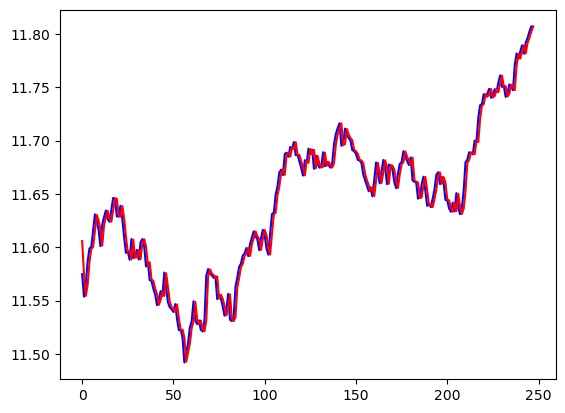

In [194]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - PLOT
#===============================================================================================================================
pyplot.plot(CloseTest, color='blue')
pyplot.plot(PredTest, color='red')
pyplot.show()


In [195]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - SUMMARY
#===============================================================================================================================
print(ARIMA_ROLL_model_fit.summary())

#                                SARIMAX Results                                
# ==============================================================================
# Dep. Variable:                      y   No. Observations:                 5942
# Model:               SARIMAX(0, 1, 1)   Log Likelihood               15583.437
# Date:                Sat, 27 Apr 2024   AIC                         -31162.874
# Time:                        21:14:18   BIC                         -31149.495
# Sample:                             0   HQIC                        -31158.226
#                                - 5942                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ma.L1         -0.0269      0.007     -3.954      0.000      -0.040      -0.014
# sigma2         0.0003   2.79e-06    110.686      0.000       0.000       0.000
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             10750.78
# Prob(Q):                              0.92   Prob(JB):                         0.00
# Heteroskedasticity (H):               0.76   Skew:                            -0.38
# Prob(H) (two-sided):                  0.00   Kurtosis:                         9.55
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).
#-------------------------------------------------------------------------------------------------------------------------------

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5942
Model:               SARIMAX(0, 1, 1)   Log Likelihood               15583.437
Date:                Tue, 11 Jun 2024   AIC                         -31162.874
Time:                        15:30:23   BIC                         -31149.495
Sample:                             0   HQIC                        -31158.226
                               - 5942                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0269      0.007     -3.954      0.000      -0.040      -0.014
sigma2         0.0003   2.79e-06    110.686      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.01   Jarque-

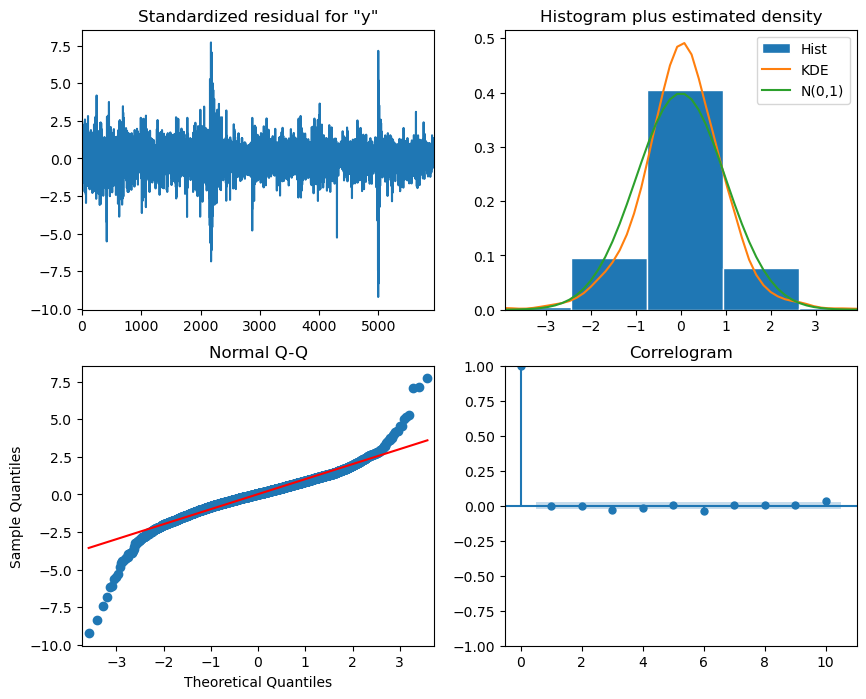

In [196]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - DIAGNOSTICS
#===============================================================================================================================
ARIMA_ROLL_model_fit.plot_diagnostics(figsize=(10,8));

#-------------------------------------------------------------------------------------------------------------------------------
#
# Residuals: No Trend, but Variance is not Constant (discrepancy to White Noise).
# Residuals: Distribution fairly close to a Normal distribution.
# Q-Q plot: Line fairly straight => distribution of Residuals close to a Normal distribution.
# Correlogram: No significant Coefficients after lag 0 => white noise.
#
#-------------------------------------------------------------------------------------------------------------------------------
# ***** WHITE NOISE *****
#-------------------------------------------------------------------------------------------------------------------------------

In [197]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - RESIDUALS - LJUNG-BOX test
#===============================================================================================================================
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm

residuals = ARIMA_ROLL_model_fit.resid
sm.stats.acorr_ljungbox(residuals, lags=[11], return_df=True)
#lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

#-------------------------------------------------------------------------------------------------------------------------------
#        lb_stat  lb_pvalue
#--------------------------
#  11    0.67458   0.999993
#
#-------------------------------------------------------------------------------------------------------------------------------
# LJUNG-BOX test: pvalue > 0.05 => Residuals NOT CORRELATED
#-------------------------------------------------------------------------------------------------------------------------------
# ***** WHITE NOISE => Model can be used to FORECAST *****
#-------------------------------------------------------------------------------------------------------------------------------

,lb_stat,lb_pvalue
11,0.67458,0.999993


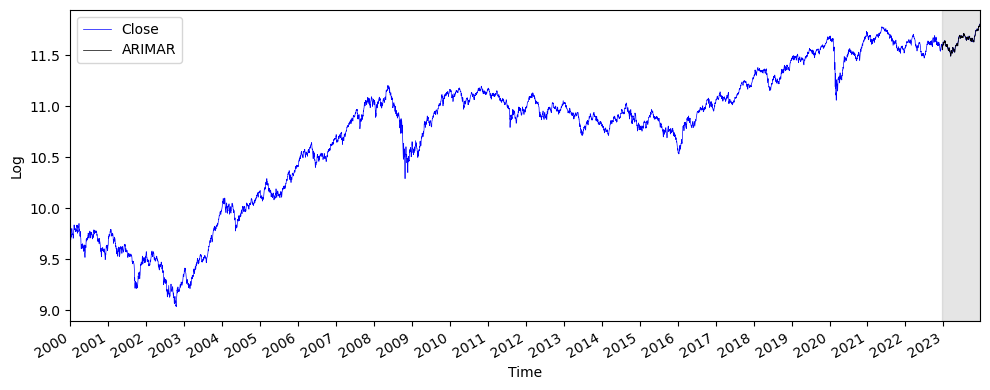

In [198]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[       :,'CloseLn']        , 'b-' , label='Close' , lw=0.5)
#ax.plot(dfln.loc[testini:,'pred_LastLn']    , 'y:' , label='Last')
#ax.plot(dfln.loc[testini:,'pred_ARMALn']    , 'w-.', label='ARMA')
#ax.plot(dfln.loc[testini:,'pred_ARIMALn']   , 'm-.', label='ARIMA') 
#ax.plot(dfln.loc[testini:,'pred_SARIMASLn'] , 'r-.', label='SARIMAS')
ax.plot(dfln.loc[testini:,'pred_ARIMARLn']  , 'k-' , label='ARIMAR', lw=0.5)
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

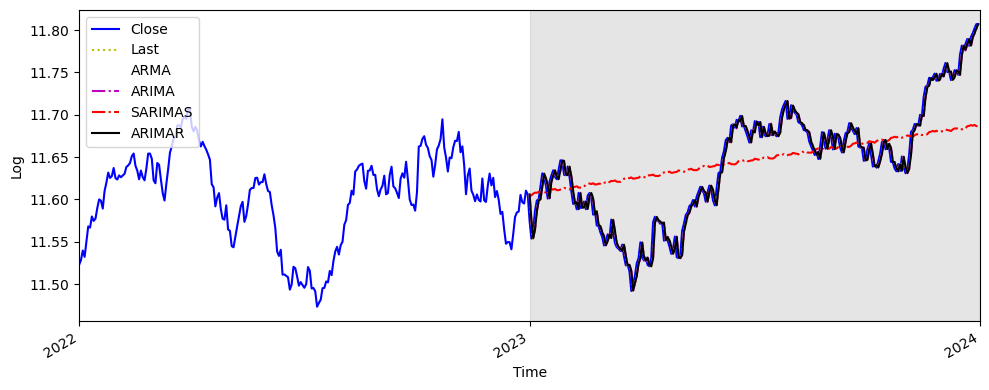

In [199]:
#===============================================================================================================================
# ROLLING ARIMA: LOG - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[testini-testlen:,'CloseLn'], 'b-' , label='Close')    
ax.plot(dfln.loc[testini:,'pred_LastLn']    , 'y:' , label='Last')
ax.plot(dfln.loc[testini:,'pred_ARMALn']    , 'w-.', label='ARMA')   
ax.plot(dfln.loc[testini:,'pred_ARIMALn']   , 'm-.', label='ARIMA')   
ax.plot(dfln.loc[testini:,'pred_SARIMASLn'] , 'r-.', label='SARIMAS')   
ax.plot(dfln.loc[testini:,'pred_ARIMARLn']  , 'k-' , label='ARIMAR')   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini-testlen, totallen)
plt.xticks([testini-testlen, testini, totallen ], [ 2022, 2023, 2024])

fig.autofmt_xdate()
plt.tight_layout()

In [200]:
#===============================================================================================================================
# ROLLING ARIMA: PRICE - RECOVER
#===============================================================================================================================
df['pred_ARIMAR'] = 0.0
df.loc[testini:,'pred_ARIMAR']= np.round(np.exp(dfln.loc[testini:,'pred_ARIMARLn']),2)
df[testini-1:]

,Date,Close,pred_Last,pred_Mean,pred_MA,pred_AR,pred_ARMA,pred_ARIMA,pred_ARIMAR
5694,2022-12-29,109734.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5695,2023-01-02,106376.02,109734.60,55564.15,109747.57,109749.29,109768.49,109766.21,109747.53
5696,2023-01-03,104165.74,106376.02,55573.07,106470.77,106472.78,106342.62,106341.11,106470.44
5697,2023-01-04,105334.46,104165.74,55581.60,104229.91,104228.91,104265.68,104264.58,104229.67
5698,2023-01-05,107641.32,105334.46,55590.33,105303.06,105300.39,105423.17,105422.27,105303.17
...,...,...,...,...,...,...,...,...,...
5938,2023-12-21,132182.01,130804.17,57947.47,130831.75,130833.02,130695.24,130693.12,130831.65
5939,2023-12-22,132752.93,132182.01,57959.97,132145.31,132143.63,132056.66,132058.06,132145.45
5940,2023-12-26,133532.92,132752.93,57972.56,132736.48,132737.09,132782.23,132782.38,132736.54
5941,2023-12-27,134193.72,133532.92,57985.28,133511.35,133511.27,133451.11,133450.45,133511.44


In [201]:
#===============================================================================================================================
# ROLLING ARIMA: PRICE - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last'  ])
mse_Mean   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean'  ])
mse_MA     = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_MA'    ])
mse_AR     = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_AR'    ])
mse_ARMA   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_ARMA'  ])
#mse_ARIMA  = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_SARIMA'])
#mse_SARIMAS= mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_SARIMAS'])
mse_ARIMAR = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_ARIMAR'])

data_metrics = [['Last'      , "{:,}".format(round(mse_Last,))  , "{:,}".format(round(sqrt(mse_Last)   ,))] ,
                ['Mean'      , "{:,}".format(round(mse_Mean,))  , "{:,}".format(round(sqrt(mse_Mean)   ,))] ,
                ['MA'        , "{:,}".format(round(mse_MA,  ))  , "{:,}".format(round(sqrt(mse_MA)     ,))] ,
                ['AR'        , "{:,}".format(round(mse_AR,  ))  , "{:,}".format(round(sqrt(mse_AR)     ,))] ,
                ['ARMA'      , "{:,}".format(round(mse_ARMA,))  , "{:,}".format(round(sqrt(mse_ARMA)   ,))] ,
                ['ARIMAR'    , "{:,}".format(round(mse_ARIMAR,)), "{:,}".format(round(sqrt(mse_ARIMAR) ,))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Price', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Model            MSE   RMSE
#--------------------------------
# 0  Last       1,476,001  1,215
# 1  Mean   3,357,125,693 57,941
# 2  MA         1,482,532  1,218
# 3  AR         1,483,149  1,218
# 4  ARMA       1,481,847  1,217
# 5  ARIMAR     1,482,795  1,218
#-------------------------------------------------------------------------------------------------------------------------------

,Price,MSE,RMSE
0,Last,"1,476,001","1,215"
1,Mean,"3,357,125,693","57,941"
2,MA,"1,482,822","1,218"
3,AR,"1,483,149","1,218"
4,ARMA,"1,481,847","1,217"
5,ARIMAR,"1,482,795","1,218"


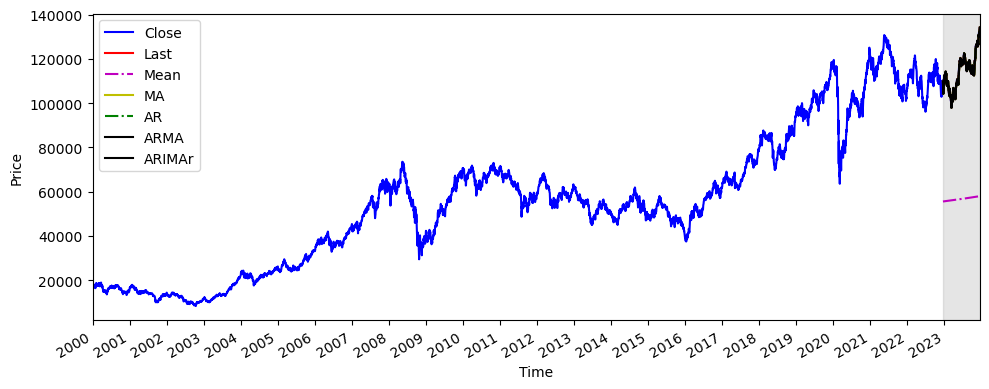

In [202]:
#===============================================================================================================================
# ROLLING ARIMA: PRICE - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df['Close'], 'b-', label='Close')    
ax.plot(df.loc[testini:,'pred_Last']   , 'r-' , label='Last')
ax.plot(df.loc[testini:,'pred_Mean']   , 'm-.', label='Mean')
ax.plot(df.loc[testini:,'pred_MA']     , 'y-' , label='MA')
ax.plot(df.loc[testini:,'pred_AR']     , 'g-.', label='AR')
ax.plot(df.loc[testini:,'pred_ARMA']   , 'k-' , label='ARMA')
ax.plot(df.loc[testini:,'pred_ARIMAR'] , 'k-' , label='ARIMAr')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

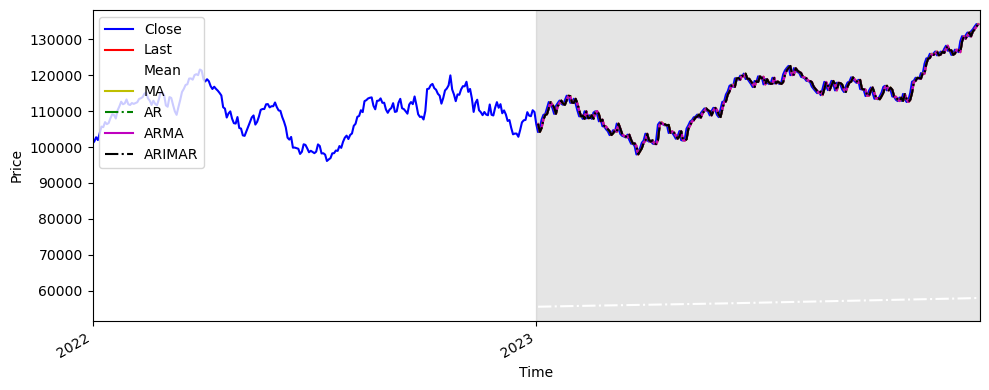

In [203]:
#===============================================================================================================================
# ROLLING ARIMA: PRICE - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df.loc[testini-PERIOD:,'Close']    , 'b-' , label='Close')
ax.plot(df.loc[testini+1:  ,'pred_Last']   , 'r-' , label='Last')
ax.plot(df.loc[testini+1:  ,'pred_Mean']   , 'w-.', label='Mean')
ax.plot(df.loc[testini+1:  ,'pred_MA']     , 'y-' , label='MA')
ax.plot(df.loc[testini+1:  ,'pred_AR']     , 'g-.', label='AR')
ax.plot(df.loc[testini+1:  ,'pred_ARMA']   , 'm-' , label='ARMA')
ax.plot(df.loc[testini+1:  ,'pred_ARIMAR'] , 'k-.', label='ARIMAR')
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks([testini-testlen, testini], [2022, 2023])
fig.autofmt_xdate()
plt.tight_layout()

In [204]:
################################################################################################################################
################################################################################################################################
#
# ROLLING ARIMA SEASONAL
#
################################################################################################################################
################################################################################################################################


In [205]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - AUTO_ARIMA - AIC
#===============================================================================================================================
import pandas as pd
import pmdarima as pmd

results = pmd.auto_arima(trainln,
                         start_p=0,  # initial guess for AR(p)
                         start_d=0,  # initial guess for I(d)
                         start_q=0,  # initial guess for MA(q)
                         max_p=15,    # max guess for AR(p)
                         max_d=1,    # max guess for I(d)
                         max_q=15,    # max guess for MA(q)
                         m=21,        # seasonal order
                         start_P=0,  # initial guess for seasonal AR(P)
                         start_D=0,  # initial guess for seasonal I(D)
                         start_Q=0,  # initial guess for seasonal MA(Q)
                         trend='c',
                         information_criterion='aic',
                         trace=True,
                         error_action='ignore'
                         )

#-------------------------------------------------------------------------------------------------------------------------------
# p,d,q,m: 15,1,15,21
# Best model:  ARIMA(0,1,1)(0,0,0)[21] intercept Total fit time: 53.391 seconds AIC=-29710.797
#-------------------------------------------------------------------------------------------------------------------------------
# p,d,q,m: 15,1,15,5
# Best model:  ARIMA(0,1,1)(0,0,0) [5] intercept Total fit time: 11.277 seconds AIC=-29710.797
#-------------------------------------------------------------------------------------------------------------------------------

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[21] intercept   : AIC=-29713.902, Time=0.89 sec
 ARIMA(1,1,0)(1,0,0)[21] intercept   : AIC=-29715.582, Time=6.25 sec
 ARIMA(0,1,1)(0,0,1)[21] intercept   : AIC=-29715.542, Time=4.43 sec
 ARIMA(0,1,0)(0,0,0)[21]             : AIC=-29713.902, Time=2.16 sec
 ARIMA(1,1,0)(0,0,0)[21] intercept   : AIC=-29716.935, Time=3.28 sec
 ARIMA(1,1,0)(0,0,1)[21] intercept   : AIC=-29715.519, Time=6.94 sec
 ARIMA(1,1,0)(1,0,1)[21] intercept   : AIC=-29713.369, Time=11.56 sec
 ARIMA(2,1,0)(0,0,0)[21] intercept   : AIC=-29714.956, Time=3.76 sec
 ARIMA(1,1,1)(0,0,0)[21] intercept   : AIC=-29715.128, Time=1.17 sec
 ARIMA(0,1,1)(0,0,0)[21] intercept   : AIC=-29716.954, Time=0.62 sec
 ARIMA(0,1,1)(1,0,0)[21] intercept   : AIC=-29715.607, Time=7.48 sec
 ARIMA(0,1,1)(1,0,1)[21] intercept   : AIC=-29713.397, Time=9.07 sec
 ARIMA(0,1,2)(0,0,0)[21] intercept   : AIC=-29715.000, Time=3.04 sec
 ARIMA(1,1,2)(0,0,0)[21] intercept   : AIC=-29713.878, Time

In [206]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - AUTO_ARIMA - BIC
#===============================================================================================================================
results = pmd.auto_arima(trainln,
                         start_p=0,  # initial guess for AR(p)
                         start_d=0,  # initial guess for I(d)
                         start_q=0,  # initial guess for MA(q)
                         max_p=15,   # max guess for AR(p)
                         max_d=1,    # max guess for I(d)
                         max_q=15,   # max guess for MA(q)
                         m=63,       # seasonal order
                         start_P=0,  # initial guess for seasonal AR(P)
                         start_D=0,  # initial guess for seasonal I(D)
                         start_Q=0,  # initial guess for seasonal MA(Q)
                         trend='c',
                         information_criterion='bic',
                         trace=True,
                         error_action='ignore'
                         )

#-------------------------------------------------------------------------------------------------------------------------------
# Best model:  ARIMA(0,1,0)(0,0,0)[21] Total fit time: 16.358 seconds
#-------------------------------------------------------------------------------------------------------------------------------
# Best model:  ARIMA(0,1,0)(0,0,0)[5]  Total fit time: 7.869 seconds
#-------------------------------------------------------------------------------------------------------------------------------

Performing stepwise search to minimize bic
 ARIMA(0,1,0)(0,0,0)[63] intercept   : BIC=-29700.607, Time=1.39 sec
 ARIMA(1,1,0)(1,0,0)[63] intercept   : BIC=-29688.872, Time=65.59 sec
 ARIMA(0,1,1)(0,0,1)[63] intercept   : BIC=-29688.878, Time=31.29 sec
 ARIMA(0,1,0)(0,0,0)[63]             : BIC=-29700.607, Time=1.68 sec
 ARIMA(0,1,0)(1,0,0)[63] intercept   : BIC=-29692.457, Time=31.83 sec
 ARIMA(0,1,0)(0,0,1)[63] intercept   : BIC=-29692.448, Time=30.16 sec
 ARIMA(0,1,0)(1,0,1)[63] intercept   : BIC=-29683.780, Time=47.59 sec
 ARIMA(1,1,0)(0,0,0)[63] intercept   : BIC=-29696.993, Time=2.65 sec
 ARIMA(0,1,1)(0,0,0)[63] intercept   : BIC=-29697.012, Time=0.69 sec
 ARIMA(1,1,1)(0,0,0)[63] intercept   : BIC=-29688.539, Time=1.18 sec

Best model:  ARIMA(0,1,0)(0,0,0)[63] intercept
Total fit time: 214.306 seconds


In [207]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: OPTIMIZE_SARIMA - AIC
#===============================================================================================================================
#result_df = optimize_SARIMA(trainln, order_list, d, D, s) 
#result_df

#-------------------------------------------------------------------------------------------------------------------------------
# 
# d = 1
# D = 1
# s = 21
#-------------------------------------------------------------------------------------------------------------------------------
# 100% 100/100 [35:25<00:00, 41.88s/it]
#-------------------------------------------------------------------------------------------------------------------------------
#    (p, q, P, Q)           AIC
# -- ------------- --------------


In [208]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - LISTS
#===============================================================================================================================
CloseList = dfln['CloseLn'].values
CloseTrain, CloseTest = CloseList[:testini], CloseList[testini:]
HistTrain = [x for x in CloseTrain]
PredTest = list()

#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - FORECAST
#===============================================================================================================================
for t in range(testlen):
    # AIC - AKAIKE
    SARIMA_ROLL_model = SARIMAX(HistTrain, order=(0,1,1), seasonal_order=(0,0,0,21), simple_differencing=False)
    # BIC - AKAIKE
    #SARIMA_ROLL_model = SARIMAX(HistTrain, order=(0,1,0), seasonal_order=(0,0,0,21), simple_differencing=False)
    
    SARIMA_ROLL_model_fit = SARIMA_ROLL_model.fit(disp=False)

    output = SARIMA_ROLL_model_fit.forecast()
    yhat = output[0]
    PredTest.append(yhat)
    yobs = CloseTest[t]
    #if t>1 : break
    HistTrain.append(yobs)
    print('t = %d, Estimation = %f, Observed = %f' % (t, yhat, yobs))
    dfln.loc[testini+t,'pred_SARIMARLn'] = yhat
    

t = 0, Estimation = 11.605938, Observed = 11.574735
t = 1, Estimation = 11.575623, Observed = 11.553739
t = 2, Estimation = 11.554352, Observed = 11.564896
t = 3, Estimation = 11.564599, Observed = 11.586560
t = 4, Estimation = 11.585944, Observed = 11.598770


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 5, Estimation = 11.598412, Observed = 11.600291
t = 6, Estimation = 11.600239, Observed = 11.615633


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 7, Estimation = 11.615204, Observed = 11.630860
t = 8, Estimation = 11.630426, Observed = 11.624916


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 9, Estimation = 11.625069, Observed = 11.616529
t = 10, Estimation = 11.616766, Observed = 11.601052
t = 11, Estimation = 11.601487, Observed = 11.621234


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 12, Estimation = 11.620684, Observed = 11.628291
t = 13, Estimation = 11.628080, Observed = 11.634452
t = 14, Estimation = 11.634275, Observed = 11.626617
t = 15, Estimation = 11.626830, Observed = 11.623906
t = 16, Estimation = 11.623987, Observed = 11.635392
t = 17, Estimation = 11.635075, Observed = 11.646320


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 18, Estimation = 11.646008, Observed = 11.645510
t = 19, Estimation = 11.645524, Observed = 11.629073
t = 20, Estimation = 11.629529, Observed = 11.628689
t = 21, Estimation = 11.628712, Observed = 11.638946
t = 22, Estimation = 11.638662, Observed = 11.626911
t = 23, Estimation = 11.627237, Observed = 11.609513


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 24, Estimation = 11.610004, Observed = 11.594722
t = 25, Estimation = 11.595142, Observed = 11.596546
t = 26, Estimation = 11.596507, Observed = 11.588309
t = 27, Estimation = 11.588534, Observed = 11.607795
t = 28, Estimation = 11.607263, Observed = 11.589961
t = 29, Estimation = 11.590442, Observed = 11.590611
t = 30, Estimation = 11.590606, Observed = 11.597602


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 31, Estimation = 11.597407, Observed = 11.588486


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 32, Estimation = 11.588734, Observed = 11.604594
t = 33, Estimation = 11.604151, Observed = 11.607703
t = 34, Estimation = 11.607604, Observed = 11.600725
t = 35, Estimation = 11.600917, Observed = 11.582004
t = 36, Estimation = 11.582531, Observed = 11.586110
t = 37, Estimation = 11.586010, Observed = 11.569291
t = 38, Estimation = 11.569757, Observed = 11.568465
t = 39, Estimation = 11.568501, Observed = 11.561067
t = 40, Estimation = 11.561274, Observed = 11.555838
t = 41, Estimation = 11.555990, Observed = 11.545641
t = 42, Estimation = 11.545928, Observed = 11.550857


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 43, Estimation = 11.550720, Observed = 11.558857
t = 44, Estimation = 11.558631, Observed = 11.554335
t = 45, Estimation = 11.554455, Observed = 11.576279
t = 46, Estimation = 11.575670, Observed = 11.562393
t = 47, Estimation = 11.562766, Observed = 11.548468
t = 48, Estimation = 11.548868, Observed = 11.543662
t = 49, Estimation = 11.543807, Observed = 11.541828


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 50, Estimation = 11.541883, Observed = 11.539328


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 51, Estimation = 11.539400, Observed = 11.546695
t = 52, Estimation = 11.546492, Observed = 11.532547
t = 53, Estimation = 11.532937, Observed = 11.522112
t = 54, Estimation = 11.522414, Observed = 11.522857
t = 55, Estimation = 11.522845, Observed = 11.515129


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 56, Estimation = 11.515345, Observed = 11.491971
t = 57, Estimation = 11.492621, Observed = 11.501149
t = 58, Estimation = 11.500911, Observed = 11.509625
t = 59, Estimation = 11.509382, Observed = 11.524707
t = 60, Estimation = 11.524281, Observed = 11.530692
t = 61, Estimation = 11.530514, Observed = 11.549387
t = 62, Estimation = 11.548865, Observed = 11.531573
t = 63, Estimation = 11.532054, Observed = 11.527875
t = 64, Estimation = 11.527991, Observed = 11.531447
t = 65, Estimation = 11.531351, Observed = 11.522656
t = 66, Estimation = 11.522898, Observed = 11.521109
t = 67, Estimation = 11.521159, Observed = 11.531223
t = 68, Estimation = 11.530943, Observed = 11.573209
t = 69, Estimation = 11.572042, Observed = 11.579553
t = 70, Estimation = 11.579347, Observed = 11.575504
t = 71, Estimation = 11.575610, Observed = 11.573826
t = 72, Estimation = 11.573875, Observed = 11.571342
t = 73, Estimation = 11.571412, Observed = 11.572733
t = 74, Estimation = 11.572697, Observed = 11.

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 76, Estimation = 11.555563, Observed = 11.551632


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 77, Estimation = 11.551741, Observed = 11.544619
t = 78, Estimation = 11.544815, Observed = 11.535783
t = 79, Estimation = 11.536031, Observed = 11.541739
t = 80, Estimation = 11.541583, Observed = 11.556288
t = 81, Estimation = 11.555884, Observed = 11.532012
t = 82, Estimation = 11.532671, Observed = 11.530737
t = 83, Estimation = 11.530790, Observed = 11.534436
t = 84, Estimation = 11.534335, Observed = 11.563129
t = 85, Estimation = 11.562335, Observed = 11.571592


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 86, Estimation = 11.571338, Observed = 11.581646
t = 87, Estimation = 11.581364, Observed = 11.584764
t = 88, Estimation = 11.584671, Observed = 11.592258
t = 89, Estimation = 11.592051, Observed = 11.594172
t = 90, Estimation = 11.594114, Observed = 11.599370
t = 91, Estimation = 11.599227, Observed = 11.591678


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 92, Estimation = 11.591885, Observed = 11.603314
t = 93, Estimation = 11.603001, Observed = 11.609221


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 94, Estimation = 11.609051, Observed = 11.614981
t = 95, Estimation = 11.614819, Observed = 11.610171
t = 96, Estimation = 11.610298, Observed = 11.607586
t = 97, Estimation = 11.607660, Observed = 11.597262
t = 98, Estimation = 11.597546, Observed = 11.608730
t = 99, Estimation = 11.608424, Observed = 11.616434
t = 100, Estimation = 11.616215, Observed = 11.611262
t = 101, Estimation = 11.611397, Observed = 11.598801
t = 102, Estimation = 11.599145, Observed = 11.592984
t = 103, Estimation = 11.593152, Observed = 11.613356
t = 104, Estimation = 11.612803, Observed = 11.631225
t = 105, Estimation = 11.630725, Observed = 11.632452
t = 106, Estimation = 11.632405, Observed = 11.649291
t = 107, Estimation = 11.648834, Observed = 11.656923
t = 108, Estimation = 11.656705, Observed = 11.670096
t = 109, Estimation = 11.669735, Observed = 11.672800


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 110, Estimation = 11.672717, Observed = 11.667728
t = 111, Estimation = 11.667862, Observed = 11.687457
t = 112, Estimation = 11.686927, Observed = 11.688734
t = 113, Estimation = 11.688685, Observed = 11.684847
t = 114, Estimation = 11.684950, Observed = 11.694061
t = 115, Estimation = 11.693815, Observed = 11.692095
t = 116, Estimation = 11.692142, Observed = 11.698743
t = 117, Estimation = 11.698565, Observed = 11.686326


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 118, Estimation = 11.686657, Observed = 11.686686


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 119, Estimation = 11.686686, Observed = 11.680497
t = 120, Estimation = 11.680664, Observed = 11.674388
t = 121, Estimation = 11.674558, Observed = 11.667202
t = 122, Estimation = 11.667400, Observed = 11.681677
t = 123, Estimation = 11.681291, Observed = 11.679177
t = 124, Estimation = 11.679234, Observed = 11.692516
t = 125, Estimation = 11.692156, Observed = 11.687520
t = 126, Estimation = 11.687646, Observed = 11.691483
t = 127, Estimation = 11.691379, Observed = 11.673561


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 128, Estimation = 11.674045, Observed = 11.686021
t = 129, Estimation = 11.685694, Observed = 11.677952
t = 130, Estimation = 11.678164, Observed = 11.674666


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 131, Estimation = 11.674762, Observed = 11.675610
t = 132, Estimation = 11.675586, Observed = 11.689094
t = 133, Estimation = 11.688725, Observed = 11.675984
t = 134, Estimation = 11.676333, Observed = 11.680298
t = 135, Estimation = 11.680189, Observed = 11.677093
t = 136, Estimation = 11.677178, Observed = 11.674637
t = 137, Estimation = 11.674706, Observed = 11.679142
t = 138, Estimation = 11.679020, Observed = 11.697052
t = 139, Estimation = 11.696557, Observed = 11.706366
t = 140, Estimation = 11.706098, Observed = 11.711840
t = 141, Estimation = 11.711683, Observed = 11.716359
t = 142, Estimation = 11.716232, Observed = 11.695161
t = 143, Estimation = 11.695736, Observed = 11.696805
t = 144, Estimation = 11.696776, Observed = 11.711309
t = 145, Estimation = 11.710912, Observed = 11.705597
t = 146, Estimation = 11.705742, Observed = 11.702378


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 147, Estimation = 11.702470, Observed = 11.700117


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 148, Estimation = 11.700181, Observed = 11.691136
t = 149, Estimation = 11.691383, Observed = 11.690063
t = 150, Estimation = 11.690099, Observed = 11.687637


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 151, Estimation = 11.687704, Observed = 11.681898
t = 152, Estimation = 11.682057, Observed = 11.681398
t = 153, Estimation = 11.681416, Observed = 11.678992
t = 154, Estimation = 11.679058, Observed = 11.668300


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 155, Estimation = 11.668594, Observed = 11.662822
t = 156, Estimation = 11.662980, Observed = 11.657818
t = 157, Estimation = 11.657959, Observed = 11.652533


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 158, Estimation = 11.652681, Observed = 11.656233
t = 159, Estimation = 11.656137, Observed = 11.647713
t = 160, Estimation = 11.647943, Observed = 11.662689
t = 161, Estimation = 11.662286, Observed = 11.679580
t = 162, Estimation = 11.679109, Observed = 11.670148
t = 163, Estimation = 11.670393, Observed = 11.659941
t = 164, Estimation = 11.660226, Observed = 11.670963
t = 165, Estimation = 11.670670, Observed = 11.681854
t = 166, Estimation = 11.681550, Observed = 11.674492
t = 167, Estimation = 11.674685, Observed = 11.659117


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 168, Estimation = 11.659541, Observed = 11.677532
t = 169, Estimation = 11.677040, Observed = 11.676545
t = 170, Estimation = 11.676559, Observed = 11.672757
t = 171, Estimation = 11.672861, Observed = 11.661219


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 172, Estimation = 11.661538, Observed = 11.655409
t = 173, Estimation = 11.655576, Observed = 11.668932
t = 174, Estimation = 11.668566, Observed = 11.678170
t = 175, Estimation = 11.677908, Observed = 11.679930


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 176, Estimation = 11.679875, Observed = 11.690164
t = 177, Estimation = 11.689883, Observed = 11.684839


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 178, Estimation = 11.684977, Observed = 11.680879
t = 179, Estimation = 11.680991, Observed = 11.677132


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 180, Estimation = 11.677237, Observed = 11.684315


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 181, Estimation = 11.684122, Observed = 11.662595
t = 182, Estimation = 11.663185, Observed = 11.661420
t = 183, Estimation = 11.661468, Observed = 11.660695
t = 184, Estimation = 11.660716, Observed = 11.645649


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 185, Estimation = 11.646061, Observed = 11.646818
t = 186, Estimation = 11.646798, Observed = 11.659022
t = 187, Estimation = 11.658687, Observed = 11.666206


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 188, Estimation = 11.666000, Observed = 11.653182
t = 189, Estimation = 11.653533, Observed = 11.638845


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 190, Estimation = 11.639245, Observed = 11.640504
t = 191, Estimation = 11.640470, Observed = 11.637654
t = 192, Estimation = 11.637731, Observed = 11.645441
t = 193, Estimation = 11.645230, Observed = 11.654044
t = 194, Estimation = 11.653803, Observed = 11.667678
t = 195, Estimation = 11.667301, Observed = 11.670363
t = 196, Estimation = 11.670280, Observed = 11.659223
t = 197, Estimation = 11.659524, Observed = 11.665937
t = 198, Estimation = 11.665763, Observed = 11.660556
t = 199, Estimation = 11.660698, Observed = 11.644477
t = 200, Estimation = 11.644918, Observed = 11.643991
t = 201, Estimation = 11.644017, Observed = 11.636516
t = 202, Estimation = 11.636720, Observed = 11.633234


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 203, Estimation = 11.633329, Observed = 11.641863
t = 204, Estimation = 11.641631, Observed = 11.633637


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 205, Estimation = 11.633855, Observed = 11.650745
t = 206, Estimation = 11.650284, Observed = 11.637806


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 207, Estimation = 11.638148, Observed = 11.630989
t = 208, Estimation = 11.631184, Observed = 11.636414
t = 209, Estimation = 11.636271, Observed = 11.653148


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 210, Estimation = 11.652687, Observed = 11.679795


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 211, Estimation = 11.679061, Observed = 11.682088
t = 212, Estimation = 11.682006, Observed = 11.689129


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 213, Estimation = 11.688936, Observed = 11.688362


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 214, Estimation = 11.688378, Observed = 11.687166
t = 215, Estimation = 11.687198, Observed = 11.699970
t = 216, Estimation = 11.699625, Observed = 11.698659
t = 217, Estimation = 11.698685, Observed = 11.721286
t = 218, Estimation = 11.720675, Observed = 11.733179
t = 219, Estimation = 11.732843, Observed = 11.734253
t = 220, Estimation = 11.734215, Observed = 11.743696
t = 221, Estimation = 11.743442, Observed = 11.741065
t = 222, Estimation = 11.741129, Observed = 11.744317
t = 223, Estimation = 11.744232, Observed = 11.748596
t = 224, Estimation = 11.748479, Observed = 11.740199
t = 225, Estimation = 11.740421, Observed = 11.741904
t = 226, Estimation = 11.741864, Observed = 11.748300
t = 227, Estimation = 11.748127, Observed = 11.745351
t = 228, Estimation = 11.745426, Observed = 11.754546
t = 229, Estimation = 11.754301, Observed = 11.761229
t = 230, Estimation = 11.761043, Observed = 11.750388
t = 231, Estimation = 11.750675, Observed = 11.751180
t = 232, Estimation = 11.751

C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 235, Estimation = 11.752446, Observed = 11.751284
t = 236, Estimation = 11.751315, Observed = 11.747231
t = 237, Estimation = 11.747341, Observed = 11.771166


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 238, Estimation = 11.770523, Observed = 11.781746


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 239, Estimation = 11.781445, Observed = 11.776805
t = 240, Estimation = 11.776929, Observed = 11.783592


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 241, Estimation = 11.783413, Observed = 11.789427
t = 242, Estimation = 11.789265, Observed = 11.781457
t = 243, Estimation = 11.781667, Observed = 11.791935
t = 244, Estimation = 11.791658, Observed = 11.796245


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


t = 245, Estimation = 11.796122, Observed = 11.802103
t = 246, Estimation = 11.801942, Observed = 11.807040
t = 247, Estimation = 11.806903, Observed = 11.806977


C:\Users\55119\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


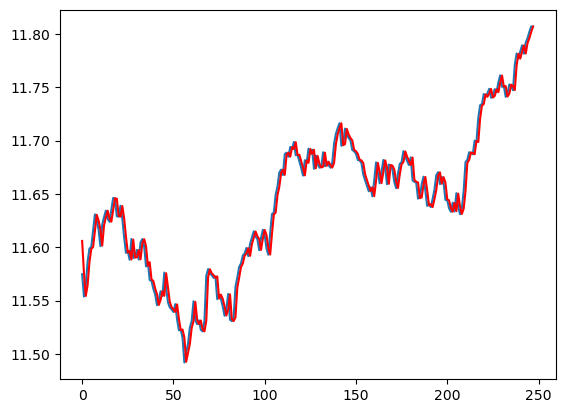

In [209]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - PLOT
#===============================================================================================================================
pyplot.plot(CloseTest)
pyplot.plot(PredTest, color='red')
pyplot.show()


In [210]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - SUMMARY
#===============================================================================================================================
print(SARIMA_ROLL_model_fit.summary())

#-------------------------------------------------------------------------------------------------------------------------------
#                                SARIMAX Results                                
# ==============================================================================
# Dep. Variable:                      y   No. Observations:                 5942
# Model:               SARIMAX(0, 1, 1)   Log Likelihood               15583.437
# Date:                Tue, 26 Mar 2024   AIC                         -31162.874
# Time:                        14:25:00   BIC                         -31149.495
# Sample:                             0   HQIC                        -31158.226
#                                - 5942                                         
# Covariance Type:                  opg                                         
# ==============================================================================
#                  coef    std err          z      P>|z|      [0.025      0.975]
# ------------------------------------------------------------------------------
# ma.L1         -0.0269      0.007     -3.954      0.000      -0.040      -0.014
# sigma2         0.0003   2.79e-06    110.686      0.000       0.000       0.000
# ===================================================================================
# Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):             10750.78
# Prob(Q):                              0.92   Prob(JB):                         0.00
# Heteroskedasticity (H):               0.76   Skew:                            -0.38
# Prob(H) (two-sided):                  0.00   Kurtosis:                         9.55
# ===================================================================================
# 
# Warnings:
# [1] Covariance matrix calculated using the outer product of gradients (complex-step).
#-------------------------------------------------------------------------------------------------------------------------------

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5942
Model:               SARIMAX(0, 1, 1)   Log Likelihood               15583.437
Date:                Tue, 11 Jun 2024   AIC                         -31162.874
Time:                        15:38:28   BIC                         -31149.495
Sample:                             0   HQIC                        -31158.226
                               - 5942                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0269      0.007     -3.954      0.000      -0.040      -0.014
sigma2         0.0003   2.79e-06    110.686      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.01   Jarque-

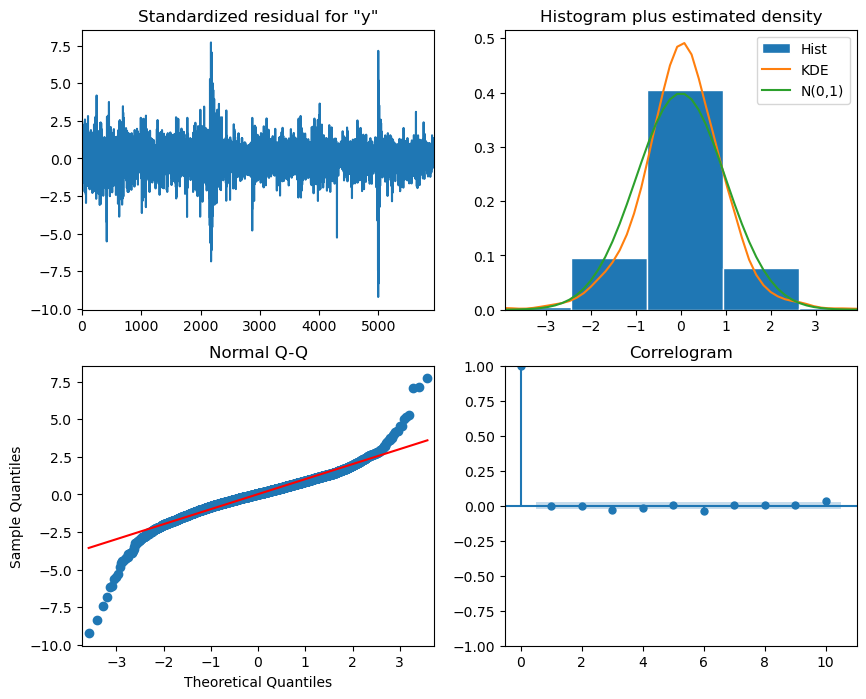

In [211]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - DIAGNOSTICS
#===============================================================================================================================
SARIMA_ROLL_model_fit.plot_diagnostics(figsize=(10,8));

#-------------------------------------------------------------------------------------------------------------------------------
#
# Residuals: No Trend, but Variance is not Constant (discrepancy to White Noise).
# Residuals: Distribution fairly close to a Normal distribution.
# Q-Q plot: Line fairly straight => distribution of Residuals close to a Normal distribution.
# Correlogram: Only one significant Coefficients after lag 0, at lag 9 => close to White Noise.
#
# ***** ~ WHITE NOISE *****
#-------------------------------------------------------------------------------------------------------------------------------

In [212]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - RESIDUALS - LJUNG-BOX test
#===============================================================================================================================
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
#residuals = model_fit.resid
residuals = SARIMA_ROLL_model_fit.resid
sm.stats.acorr_ljungbox(residuals, lags=[11], return_df=True)
#lbvalue, pvalue = acorr_ljungbox(residuals, np.arange(1, 11, 1))

#-------------------------------------------------------------------------------------------------------------------------------
#        lb_stat  lb_pvalue
#--------------------------
#  11   0.67458    0.999993 (0,1,1) (0,0,0) 5
#  11   1.302521   0.999810 (0,1,1) (0,1,0) 21
#  11   0.67458    0.999993 (0,1,1) (0,0,0) 21
#  11   0.723067   0.999990 (0,1,1) (0,0,0)  5
#-------------------------------------------------------------------------------------------------------------------------------
# LJUNG-BOX test: pvalue > 0.05 => Residuals NOT CORRELATED.
#-------------------------------------------------------------------------------------------------------------------------------
# ***** WHITE NOISE => Model can be used to FORECAST *****
#-------------------------------------------------------------------------------------------------------------------------------

,lb_stat,lb_pvalue
11,0.67458,0.999993


In [213]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - RESULTS
#===============================================================================================================================
#dfln.rename(columns={"pred_SARIMAS_ROLLLn": "pred_SARIMARLn"}, inplace=True)
dfln[testini-1:]


,Date,Close,CloseLn,CloseLnDiff,pred_LastLn,pred_MeanLn,pred_MALn,pred_ARLn,pred_ARMALn,pred_ARIMALn,pred_SARIMALn,pred_SARIMASLn,pred_ARIMARLn,pred_SARIMARLn
5694,2022-12-29,109734.60,11.605820,-0.004565,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
5695,2023-01-02,106376.02,11.574735,-0.031085,11.605820,10.729549,11.605938,11.605954,11.606129,11.606108,11.606108,11.605665,11.605938,11.605938
5696,2023-01-03,104165.74,11.553739,-0.020997,11.574735,10.729697,11.575626,11.575645,11.574421,11.574407,11.604894,11.604714,11.575623,11.575623
5697,2023-01-04,105334.46,11.564896,0.011157,11.553739,10.729842,11.554354,11.554345,11.554698,11.554687,11.605185,11.606888,11.554352,11.554352
5698,2023-01-05,107641.32,11.586560,0.021664,11.564896,10.729988,11.564598,11.564572,11.565738,11.565729,11.605359,11.608003,11.564599,11.564599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5938,2023-12-21,132182.01,11.791935,0.010479,11.781457,10.766810,11.781667,11.781677,11.780623,11.780607,11.605002,11.687828,11.781667,11.781667
5939,2023-12-22,132752.93,11.796245,0.004310,11.791935,10.766983,11.791657,11.791645,11.790986,11.790997,11.605002,11.687099,11.791658,11.791658
5940,2023-12-26,133532.92,11.802103,0.005858,11.796245,10.767156,11.796121,11.796126,11.796466,11.796467,11.605002,11.688017,11.796122,11.796122
5941,2023-12-27,134193.72,11.807040,0.004936,11.802103,10.767330,11.801942,11.801941,11.801490,11.801486,11.605002,11.686567,11.801942,11.801942


In [214]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: LOG - PERFORMANCE
#===============================================================================================================================
from sklearn.metrics import mean_squared_error
from math import sqrt

mse_Last        = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_LastLn'])
mse_Mean        = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MeanLn'])
mse_MA          = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_MALn'  ])
mse_AR          = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARLn'  ])
mse_ARMA        = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARMALn'])
#mse_ARIMA       = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMALn' ])
#mse_SARIMA      = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMALn'])
#mse_SARIMAS     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMASLn'])
mse_ARIMAR      = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_ARIMARLn'])
mse_SARIMAR     = mean_squared_error(dfln.loc[testini:,'CloseLn'], dfln.loc[testini:,'pred_SARIMARLn'])

data_metrics = [['Last'       , "{:,}".format(round(mse_Last       ,6)), "{:,}".format(round(sqrt(mse_Last)       ,6))] ,
                ['Mean'       , "{:,}".format(round(mse_Mean       ,6)), "{:,}".format(round(sqrt(mse_Mean)       ,6))] ,
                ['MA'         , "{:,}".format(round(mse_MA         ,6)), "{:,}".format(round(sqrt(mse_MA)         ,6))] ,
                ['AR'         , "{:,}".format(round(mse_AR         ,6)), "{:,}".format(round(sqrt(mse_AR)         ,6))] ,
                ['ARMA'       , "{:,}".format(round(mse_ARMA       ,6)), "{:,}".format(round(sqrt(mse_ARMA)       ,6))] ,
                ['ARIMA'      , "{:,}".format(round(mse_ARIMA      ,6)), "{:,}".format(round(sqrt(mse_ARIMA)      ,6))] ,
                ['SARIMA'     , "{:,}".format(round(mse_SARIMA     ,6)), "{:,}".format(round(sqrt(mse_SARIMA)     ,6))] ,
                ['SARIMAS'    , "{:,}".format(round(mse_SARIMAS    ,6)), "{:,}".format(round(sqrt(mse_SARIMAS)    ,6))] ,
                ['ARIMAR'     , "{:,}".format(round(mse_ARIMAR     ,6)), "{:,}".format(round(sqrt(mse_ARIMAR)     ,6))] ,
                ['SARIMAR'    , "{:,}".format(round(mse_SARIMAR    ,6)), "{:,}".format(round(sqrt(mse_SARIMAR)    ,6))] ]

df_metrics = pd.DataFrame(data_metrics, columns=['Log', 'MSE', 'RMSE'])
df_metrics

#---------------------------------
#    Log           MSE      RMSE
#---------------------------------
# 0  Last     0.000117  0.010831
# 1  Mean     0.805004  0.897220
# 2  MA       0.000118  0.010843
# 3  AR       0.000118  0.010859
# 4  ARMA     0.000118  0.010841
# 5  ARIMA    0.006206  0.078778
# 6  SARIMA   0.006206  0.078778
# 7  SARIMAS  0.002782  0.052747
# 8  ARIMAR   0.000118  0.010858
# 9  SARIMAR  0.000118  0.010858
#-------------------------------------------------------------------------------------------------------------------------------

,Log,MSE,RMSE
0,Last,0.000117,0.010831
1,Mean,0.805004,0.89722
2,MA,0.000118,0.010858
3,AR,0.000118,0.010859
4,ARMA,0.000118,0.010841
5,ARIMA,0.000118,0.01084
6,SARIMA,0.006206,0.078778
7,SARIMAS,0.002782,0.052747
8,ARIMAR,0.000118,0.010858
9,SARIMAR,0.000118,0.010858


C:\Users\55119\AppData\Local\Temp\ipykernel_6232\1228702060.py:14: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(testini, totallen-testlen)


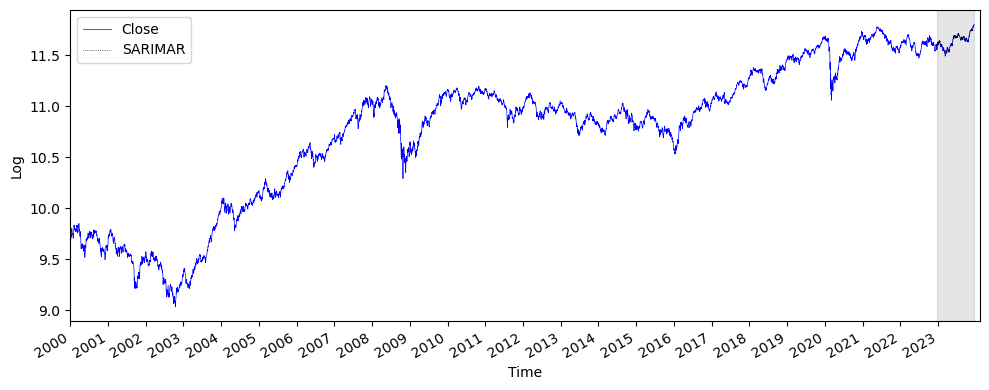

In [215]:
#===============================================================================================================================
# ROLLING SARIMA SEASONAL: LOG - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[:,'CloseLn']               , 'b-', label='Close', lw=0.5)
#ax.plot(dfln.loc[testini:,'pred_LastLn']    , 'r:', label='Last')
#ax.plot(dfln.loc[testini:,'pred_ARMALn']    , 'g-', label='ARMA roll')   
#ax.plot(dfln.loc[testini:,'pred_ARIMARLn']  , 'm-', label='ARIMAR')   
ax.plot(dfln.loc[testini:,'pred_SARIMARLn'] , 'k:', label='SARIMAR', lw=0.5)
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Log')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen-testlen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

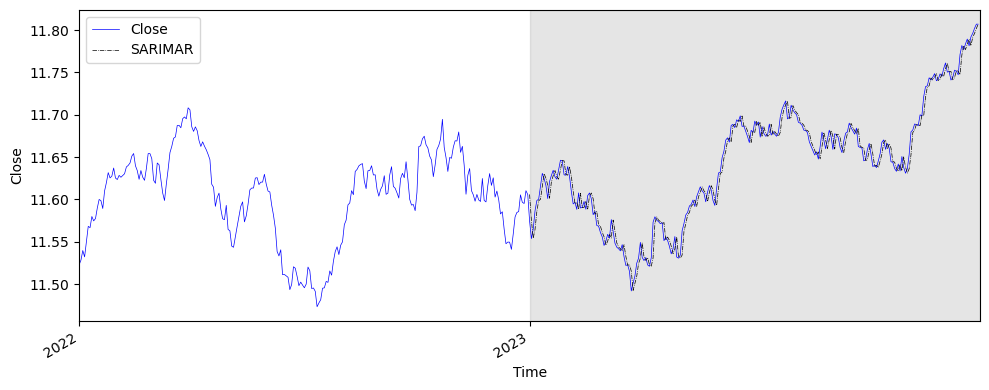

In [216]:
#===============================================================================================================================
# ROLLING SARIMA SEASONAL: LOG - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(dfln.loc[testini-testlen: ,'CloseLn']        , 'b-',  label='Close' , lw=0.5)    
#ax.plot(dfln.loc[testini:         ,'pred_LastLn']    , 'y:',  label='Last')    
#ax.plot(dfln.loc[testini:         ,'pred_ARMALn']    , 'm-.', label='ARMA')   
#ax.plot(dfln.loc[testini:         ,'pred_ARIMALn']   , 'm-.', label='ARIMA')   
#ax.plot(dfln.loc[testini:         ,'pred_ARIMARLn']  , 'r-.', label='ARIMAR')   
ax.plot(dfln.loc[testini:         ,'pred_SARIMARLn'] , 'k-.', label='SARIMAR', lw=0.5)   
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Close')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini-testlen, totallen) 
plt.xticks([ testini-testlen, testini ], [ 2022           , 2023])
fig.autofmt_xdate()
plt.tight_layout()

In [217]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: PRICE - RECOVER
#===============================================================================================================================
df['pred_SARIMAR'] = 0.0
df.loc[testini:,'pred_SARIMAR']= np.round(np.exp(dfln.loc[testini:,'pred_SARIMARLn']),2)

df[testini-1:]

,Date,Close,pred_Last,pred_Mean,pred_MA,pred_AR,pred_ARMA,pred_ARIMA,pred_ARIMAR,pred_SARIMAR
5694,2022-12-29,109734.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5695,2023-01-02,106376.02,109734.60,55564.15,109747.57,109749.29,109768.49,109766.21,109747.53,109747.53
5696,2023-01-03,104165.74,106376.02,55573.07,106470.77,106472.78,106342.62,106341.11,106470.44,106470.44
5697,2023-01-04,105334.46,104165.74,55581.60,104229.91,104228.91,104265.68,104264.58,104229.67,104229.67
5698,2023-01-05,107641.32,105334.46,55590.33,105303.06,105300.39,105423.17,105422.27,105303.17,105303.17
...,...,...,...,...,...,...,...,...,...,...
5938,2023-12-21,132182.01,130804.17,57947.47,130831.75,130833.02,130695.24,130693.12,130831.65,130831.65
5939,2023-12-22,132752.93,132182.01,57959.97,132145.31,132143.63,132056.66,132058.06,132145.45,132145.45
5940,2023-12-26,133532.92,132752.93,57972.56,132736.48,132737.09,132782.23,132782.38,132736.54,132736.54
5941,2023-12-27,134193.72,133532.92,57985.28,133511.35,133511.27,133451.11,133450.45,133511.44,133511.44


In [218]:
#===============================================================================================================================
# ROLLING SARIMAR SEASONAL: PRICE - RECOVER
#===============================================================================================================================
dfln.loc[testini:,'pred_SARIMARLn'].to_excel('Data/Output/Rolling-Ln-Daily-SARIMARLn.xlsx')


In [219]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: PRICE - PERFORMANCE
#===============================================================================================================================
mse_Last   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Last'   ])
mse_Mean   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_Mean'   ])
mse_MA     = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_MA'     ])
mse_AR     = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_AR'     ])
mse_ARMA   = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_ARMA'   ])
mse_ARIMA  = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_ARIMA'  ])
mse_ARIMAR = mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_ARIMAR' ])
mse_SARIMAR= mean_squared_error(df.loc[testini:,'Close'], df.loc[testini:,'pred_SARIMAR'])

data_metrics = [['Last'      , "{:,}".format(round(mse_Last,))   , "{:,}".format(round(sqrt(mse_Last)   ,2))] ,
                ['Mean'      , "{:,}".format(round(mse_Mean,))   , "{:,}".format(round(sqrt(mse_Mean)   ,2))] ,
                ['MA'        , "{:,}".format(round(mse_MA,  ))   , "{:,}".format(round(sqrt(mse_MA)     ,2))] ,
                ['AR'        , "{:,}".format(round(mse_AR,  ))   , "{:,}".format(round(sqrt(mse_AR)     ,2))] ,
                ['ARMA'      , "{:,}".format(round(mse_ARMA,))   , "{:,}".format(round(sqrt(mse_ARMA)   ,2))] ,
                ['ARIMA'     , "{:,}".format(round(mse_ARIMA,))  , "{:,}".format(round(sqrt(mse_ARIMA)  ,2))] ,
                ['ARIMAR'    , "{:,}".format(round(mse_ARIMAR,)) , "{:,}".format(round(sqrt(mse_ARIMAR) ,2))] ,
                ['SARIMAR'   , "{:,}".format(round(mse_SARIMAR,)), "{:,}".format(round(sqrt(mse_SARIMAR),2))] ]
 
df_metrics = pd.DataFrame(data_metrics, columns=['Price', 'MSE', 'RMSE'])
df_metrics

#-------------------------------------------------------------------------------------------------------------------------------
#    Price             MSE   RMSE
#--------------------------------
# 0  Last     1,476,001  1,214.91
# 1  Mean 3,357,125,693 57,940.71
# 2  MA       1,482,532  1,217.59
# 3  AR       1,483,149  1,217.85
# 4  ARMA     1,481,847  1,217.31
# 5  ARIMA    1,481,590  1,217.21
# 6  ARIMAR   1,482,795  1,218.70
# 7  SARIMAR  1,482,795  1,218.70
#-------------------------------------------------------------------------------------------------------------------------------

,Price,MSE,RMSE
0,Last,"1,476,001","1,214.91"
1,Mean,"3,357,125,693","57,940.71"
2,MA,"1,482,822","1,217.71"
3,AR,"1,483,149","1,217.85"
4,ARMA,"1,481,847","1,217.31"
5,ARIMA,"1,481,590","1,217.21"
6,ARIMAR,"1,482,795","1,217.7"
7,SARIMAR,"1,482,795","1,217.7"


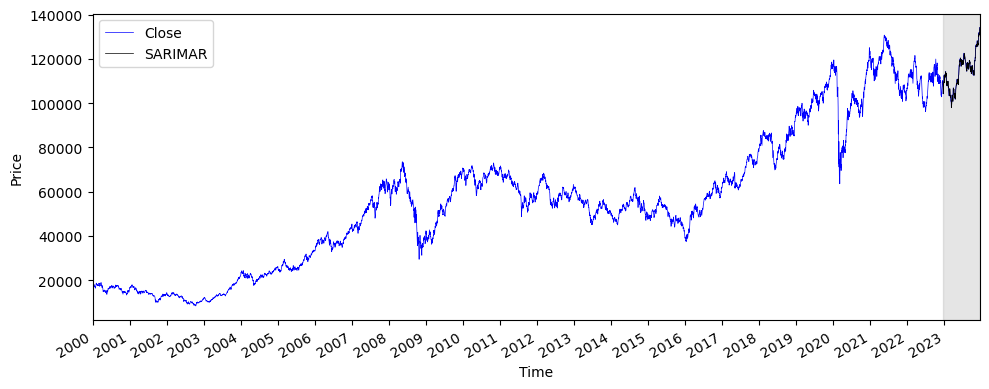

In [220]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: PRICE - PLOT
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df['Close'], 'b-', label='Close', lw=0.5)    
#ax.plot(df.loc[testini:,'pred_Last']     , 'r-' , label='Last'    )
#ax.plot(df.loc[testini:,'pred_Mean']     , 'm-.', label='Mean'    )
#ax.plot(df.loc[testini:,'pred_MA']       , 'y-' , label='MA'      )   
#ax.plot(df.loc[testini:,'pred_AR']       , 'g-.', label='AR'      )   
#ax.plot(df.loc[testini:,'pred_ARMA']     , 'w-' , label='ARMA'    )   
#ax.plot(df.loc[testini:,'pred_ARIMAR']   , 'g-' , label='ARIMAR'  )   
ax.plot(df.loc[testini:,'pred_SARIMAR']  , 'k-' , label='SARIMAR' , lw=0.5)
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
ax.set_xlim(testini, totallen)
plt.xticks(np.arange(0, totallen, testlen), np.arange(2000, 2024, 1))
fig.autofmt_xdate()
plt.tight_layout()

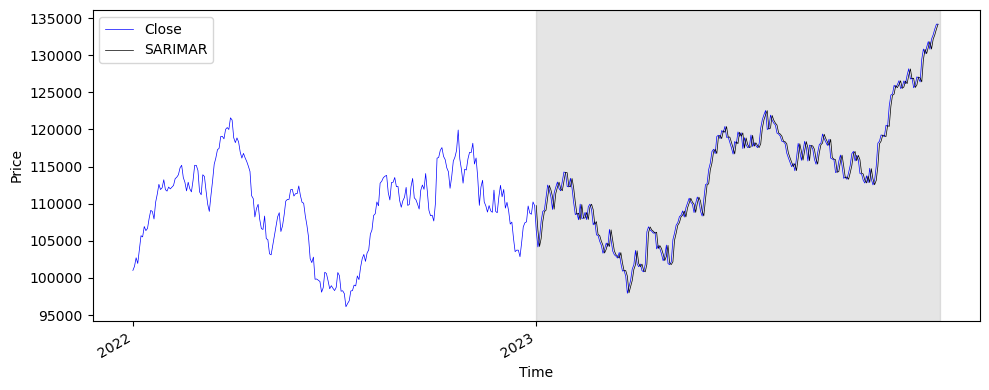

In [221]:
#===============================================================================================================================
# ROLLING ARIMA SEASONAL: PRICE - PLOT (zoom)
#===============================================================================================================================
fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(df.loc[testini-testlen:,'Close'] , 'b-' , label='Close' , lw=0.5)    
#ax.plot(df.loc[testini:,'pred_Last']     , 'r-' , label='Last')
#ax.plot(df.loc[testini:,'pred_Mean']     , 'm-.', label='Mean')
#ax.plot(df.loc[testini:,'pred_MA']       , 'y-' , label='MA')   
#ax.plot(df.loc[testini:,'pred_AR']       , 'g-.', label='AR')   
#ax.plot(df.loc[testini:,'pred_ARMA']     , 'w-' , label='ARMA')   
#ax.plot(df.loc[testini:,'pred_ARIMAR']   , 'g-' , label='ARIMAR')   
ax.plot(df.loc[testini:,'pred_SARIMAR']  , 'k-' , label='SARIMAR' , lw=0.5)
ax.legend(loc=2)
ax.set_xlabel('Time')
ax.set_ylabel('Price')
ax.axvspan(testini, totallen, color='#808080', alpha=0.2)
#ax.set_xlim(testini, totallen)
plt.xticks([ testini-testlen, testini],           ['2022'          , '2023'])
fig.autofmt_xdate()
plt.tight_layout()

